In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import random
import os

In [ ]:
# put all paths to all the images into a list
image_paths = sorted(glob.glob("/host/datasets/incubator/MKZ_data/lane_lines/**/*.jpg"))
print(len(image_paths))
fig, axs =plt.subplots(3,5,figsize=(50,30))
axs = axs.ravel()
num_examples = 5
for i in range(num_examples):
    index = random.randint(0,len(image_paths))
    image = cv2.imread(image_paths[index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    binary = np.zeros_like(image[:,:,0])
    for j in range(1,256):
        if (len(list(np.where((image == [j,0,0]).all(axis = 2))[0])) > 0):
            print("j: ", j)
        binary[np.where((image == [j,0,0]).all(axis = 2))] = 1
    axs[i].imshow(image)
    axs[i+num_examples].imshow(image[700:,:,:])
    axs[i+2*num_examples].imshow(binary)
    print()
    #birds_eye_image_binary[np.where((birds_eye_image == [0,255,0]).all(axis = 2))] = 1
    #birds_eye_image_binary[np.where((birds_eye_image == [0,0,255]).all(axis = 2))] = 1
    #birds_eye_image_binary[np.where((birds_eye_image == [255,255,0]).all(axis = 2))] = 1


In [ ]:
lst = ['test5','test6','test7','test8','test9']

for j,string in enumerate(lst):
    print("j: ",j)
    input_image_paths = sorted(glob.glob('/host/datasets/incubator/MKZ_data_20180726/%s/*.jpg' % string))
    for i in range(j,len(input_image_paths),5):
        input_path = input_image_paths[i]
        image = cv2.imread(input_path)
        save_path = '/host/datasets/incubator/MKZ_data/lane_lines/input_images/' + input_image_paths[i].split('/')[-1]
        print("i: ",i)
        print("input_path: ", input_path)
        print("save_path: ", save_path)
        cv2.imwrite(save_path, image)
    print()

In [ ]:
input_image_paths = sorted(glob.glob('/host/datasets/incubator/MKZ_data/lane_lines/input_images/*.jpg'))
label_image_paths = sorted(glob.glob('/host/datasets/incubator/MKZ_data/lane_lines/line_normal/*.jpg'))
print(len(input_image_paths))
print(len(label_image_paths))

for i,input_path in enumerate(input_image_paths):
    label_path = '/host/datasets/incubator/MKZ_data/lane_lines/line_normal/' + input_path.split('/')[-1]
    if label_path not in label_image_paths:
        print("label_path: ", label_path)
        print("input_path: ", input_path)
        print()
        os.remove(input_path)
        del input_image_paths[i]
print(len(input_image_paths))
print(len(label_image_paths))


In [ ]:

input_image_paths = sorted(glob.glob('/host/datasets/incubator/MKZ_data_20180726/traffic/*.jpg'))
count = 530
for i in range(0,len(input_image_paths),3):
    input_path = input_image_paths[i]
    image = cv2.imread(input_path)
    save_path = '/host/datasets/incubator/MKZ_data/lane_lines/input_images/frame%04d.jpg' % count 
    os.remove('/host/datasets/incubator/MKZ_data/lane_lines/input_images/%04d.jpg' % count )
    print("i: ", i)
    print("input_path: ", input_path)
    print('save_path:', save_path)
    print()
    
    cv2.imwrite(save_path, image)
    count += 1
label_image_paths = glob.glob('/host/datasets/incubator/MKZ_data/lane_lines/line_normal/*.jpg')
label_image_paths += glob.glob('/host/datasets/incubator/MKZ_data/lane_lines/line_shadow/*.jpg')
label_image_paths = sorted(label_image_paths)
input_image_paths = sorted(glob.glob('/host/datasets/incubator/MKZ_data/lane_lines/input_images/*.jpg'))

print(len(input_image_paths))
print(len(label_image_paths))

In [ ]:


#csv = np.genfromtxt ('/host/datasets/incubator/MKZ_data/lane_lines/lane_line.csv', delimiter=",")
#print(csv.shape)

In [ ]:
j = json.loads('{"points":[{"x":0,"y":962.52948},{"x":179.30688,"y":905.67936},{"x":351.72288,"y":848.82924},{"x":497.29344,"y":799.1568},{"x":617.1667199999999,"y":756.9504},{"x":726.70272,"y":720.34272},{"x":839.0553600000001,"y":682.5222},{"x":908.34816,"y":655.9110000000001},{"x":920.6169600000001,"y":647.4438}],"width":1920,"height":1080,"label":"1"},{"points":[{"x":528.384,"y":1080},{"x":651.6595199999999,"y":957.9978},{"x":849.0316799999999,"y":748.97892},{"x":909.64992,"y":684.28368},{"x":926.1312,"y":666.95616},{"x":941.32992,"y":650.55636},{"x":942.2303999999999,"y":649.15668}],"width":1920,"height":1080,"label":"2"},{"points":[{"x":1370.0064,"y":1080},{"x":1215.6383999999998,"y":917.47404},{"x":1074.24384,"y":775.50912},{"x":1032.10176,"y":730.19016},{"x":988.7731200000001,"y":687.31848},{"x":967.87392,"y":664.5186},{"x":958.67328,"y":654.61824},{"x":954.57408,"y":650.01744}],"width":1920,"height":1080,"label":"3"},{"points":[{"x":1920,"y":965.05236},{"x":1728.59904,"y":904.7980799999999},{"x":1592.544,"y":862.26552},{"x":1483.536,"y":826.6968},{"x":1355.664,"y":784.3608},{"x":1218.432,"y":739.0008},{"x":1105.392,"y":699.2568},{"x":1077.6000000000001,"y":689.89752},{"x":1007.184,"y":660.52152},{"x":997.62816,"y":656.6054399999999},{"x":989.28384,"y":652.78116}],"width":1920,"height":1080,"label":"4"}')





## Convert CULane to LaneNet Required Format

In [ ]:
"""
root_path should contain the following directories:
driver_100_30frame  driver_182_30frame  driver_23_30frame  laneseg_label_w16
driver_161_90frame  driver_193_90frame  driver_37_30frame  
"""

root_path = "/host/datasets/incubator/cuLane/data/CULane/"

# Directories which contain the input images for training
train_input_images_dirs = [root_path + "driver_23_30frame", root_path + "driver_182_30frame", root_path + "driver_161_90frame"]
#train_input_images_dirs = [root_path + "driver_161_90frame"]

# List of paths to all input images for training
input_image_paths = []
for path in train_input_images_dirs:
    print("path: ", path)
    input_image_paths += glob.glob(path + "/**/*.jpg", recursive=True)
    
input_image_paths = sorted(input_image_paths)
print(len(input_image_paths))

instance_image_paths = sorted(glob.glob(root_path + "laneseg_label_w16/**/*.png", recursive=True))
print(len(instance_image_paths))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

assert(len(input_image_paths) == len(instance_image_paths))

input_image_paths, instance_image_paths = shuffle(input_image_paths, instance_image_paths)

X_train, X_valid, y_train, y_valid = train_test_split(input_image_paths, instance_image_paths, 
                                                                test_size=0.0981685353, random_state=20)

train_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/train.txt'
valid_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/val.txt'
train_text_file = open(train_text_file_path, "w")
valid_text_file = open(valid_text_file_path, "w")

num_examples = 5
#fig, axs = plt.subplots(3,num_examples, figsize=(50,20))

input_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/image/'
instance_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/gt_image_instance/'
binary_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/gt_image_binary/'

#indicies = [val for val in range(0,len(input_image_paths))]


#axs=axs.ravel()
print("Creating Training Set")
for i in range(len(X_train)):
    input_image = plt.imread(X_train[i])
    #input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    instance_image = plt.imread(y_train[i])
    #axs[i].imshow(input_image)
    #axs[i+num_examples].imshow(instance_image)
    binary_image = np.zeros_like(instance_image)
    binary_image[instance_image!=0] = 255
    #axs[i+2*num_examples].imshow(binary_image)
    plt.imsave(input_path + "frame%06d.png" % (i), input_image)
    plt.imsave(binary_path + "frame%06d.png" % (i), binary_image)
    plt.imsave(instance_path + "frame%06d.png" % (i), instance_image)
    row = (input_path + "frame%06d.png " % (i) + binary_path + "frame%06d.png " % (i) + instance_path + "frame%06d.png\n" % (i))
    print(X_train[i])
    print(y_train[i])
    print('row: ', row)
    train_text_file.write(row)

train_text_file.close()

print("Creating Validation Set")
for i in range(len(X_train), len(X_valid)+len(X_train)):
    print("i: ", i)
    input_image = plt.imread(X_valid[i-len(X_train)])
    #input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    instance_image = plt.imread(y_valid[i-len(X_train)])
    #axs[i].imshow(input_image)
    #axs[i+num_examples].imshow(instance_image)
    binary_image = np.zeros_like(instance_image)
    binary_image[instance_image!=0] = 255
    #axs[i+2*num_examples].imshow(binary_image)
    plt.imsave(input_path + "frame%06d.png" % (i), input_image)
    plt.imsave(binary_path + "frame%06d.png" % (i), binary_image)
    plt.imsave(instance_path + "frame%06d.png" % (i), instance_image)
    row = (input_path + "frame%06d.png " % (i) + binary_path + "frame%06d.png " % (i) + instance_path + "frame%06d.png\n" % (i))
    print(X_valid[i-len(X_train)])
    print(y_valid[i-len(X_train)])
    print('row: ', row)
    print()
    valid_text_file.write(row)


valid_text_file.close()


    

## Validate that the training and validation sets were created correctly

num lines in train text file:  78767
num lines in valid text file:  8590
number of input images:  98555
number of instance images:  98555
number of binary images:  98555
min of instance_image:  0
max of instance_image:  215
instance_image.shape:  (590, 1640)
instance_image:  [ 81  81 110 ... 157 157 157]
min of instance_image:  0
max of instance_image:  215
instance_image.shape:  (590, 1640)
instance_image:  [110 157 157 ... 157 157 157]
min of instance_image:  0
max of instance_image:  215
instance_image.shape:  (590, 1640)
instance_image:  [110 110 157 ... 157 157 157]
min of instance_image:  0
max of instance_image:  215
instance_image.shape:  (590, 1640)
instance_image:  [ 81  81 110 ... 157 157 157]
min of instance_image:  0
max of instance_image:  215
instance_image.shape:  (590, 1640)
instance_image:  [ 91  91 215 ... 215 215 215]


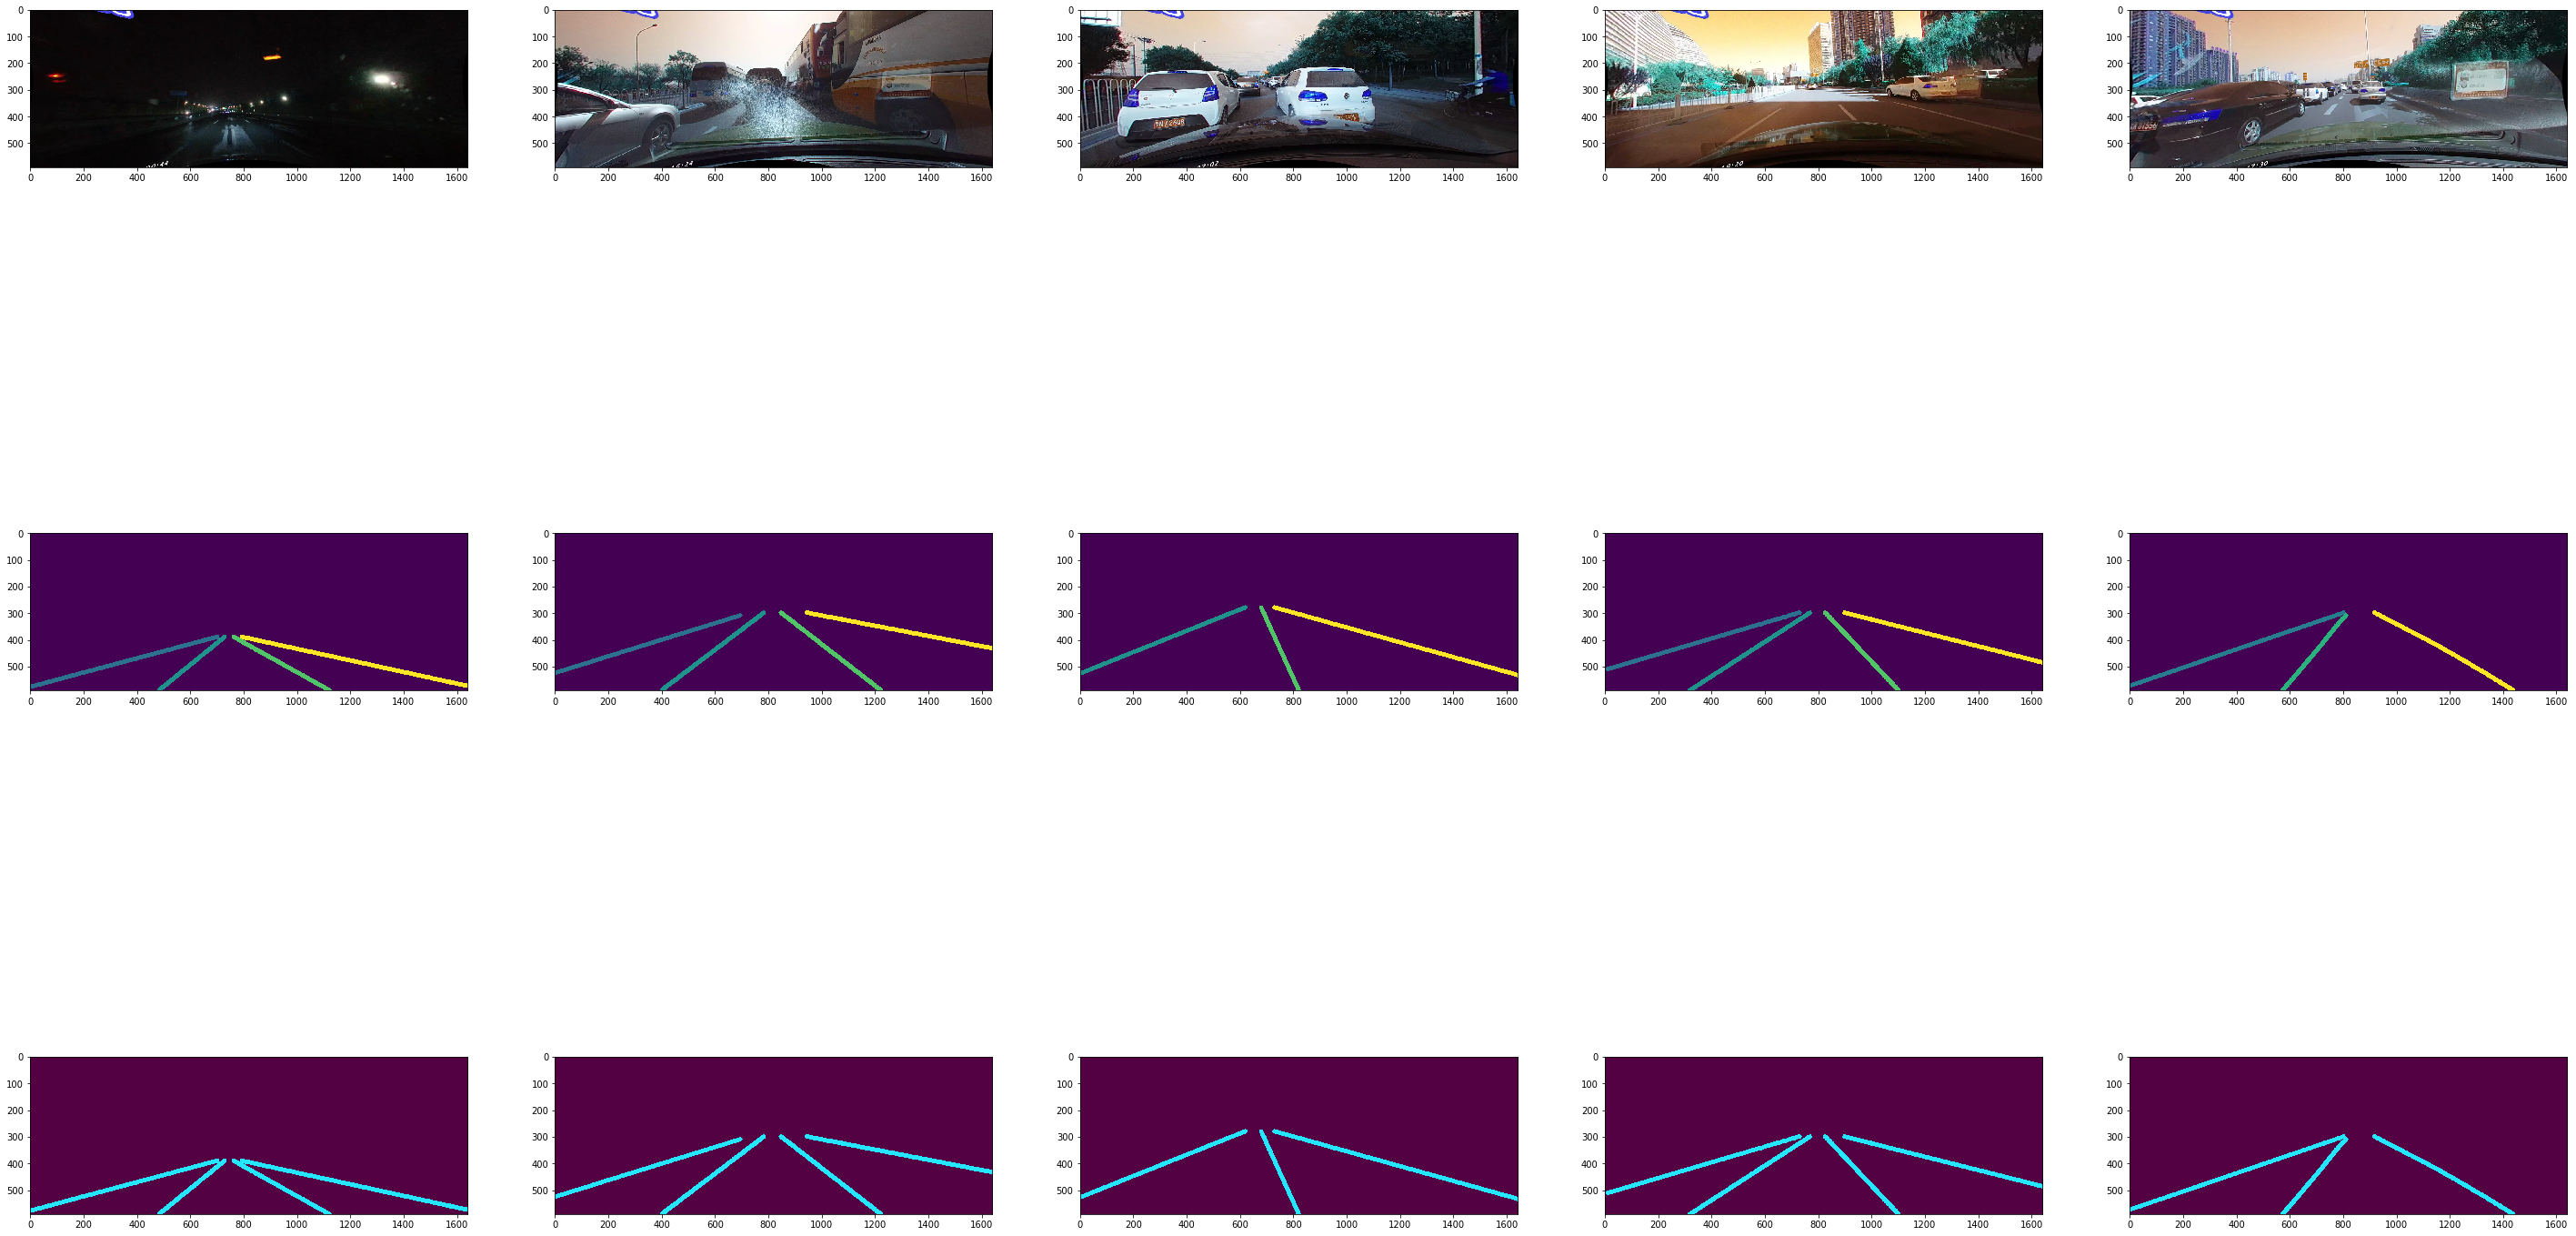

In [29]:
train_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/train.txt'
valid_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/val.txt'
input_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/image/'
instance_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/gt_image_instance/'
binary_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/gt_image_binary/'

with open(train_text_file_path) as f:
      print("num lines in train text file: ", len(f.readlines()))
        
with open(valid_text_file_path) as f:
      print("num lines in valid text file: ", len(f.readlines()))
        
input_paths = glob.glob(input_path + "*.png")
print("number of input images: ", len(input_paths))

instance_paths = glob.glob(instance_path + "*.png")
print("number of instance images: ", len(instance_paths))

binary_paths = glob.glob(binary_path + "*.png")
print("number of binary images: ", len(binary_paths))

assert(len(binary_paths) == len(instance_paths) == len(input_paths))
num_examples = 5
fig, axs = plt.subplots(3,num_examples,figsize=(50,30))
axs = axs.ravel()

for i in range(num_examples):
    index = random.randint(0,len(input_paths)-1)
    input_image = cv2.imread(input_paths[index], cv2.IMREAD_COLOR)
    
    # correct way to read in instance image
    instance_image = cv2.imread(instance_paths[index], cv2.IMREAD_UNCHANGED)
    instance_image = cv2.cvtColor(instance_image, cv2.COLOR_BGR2GRAY)
    instance_image[instance_image==np.min(instance_image)] = 0
    #instance_image[np.where((instance_image[:,:,:] == [84,1,68]).all(axis=2))] = [0,0,0]
    
    
    """
    # correct way to read in binary label_img
    label_img = plt.imread(binary_paths[index])*255
    label_img = label_img.astype(np.uint8)
    label_img = np.concatenate((label_img[:,:,0].reshape(label_img.shape[0],label_img.shape[1],1), label_img[:,:,2:4]), axis=2)
    label_binary = np.zeros_like(label_img[:,:,0])
    label_binary[np.where((label_img[:, :, :] == [68, 84, 255]).all(axis=2))] = 1
    label_binary = 1 - label_binary
    """
    
    label_img = cv2.imread(binary_paths[index])
    #print("max of label_binary: ", np.max(label_binary))
    #print("min of label_binary: ", np.min(label_binary))
    
    #binary_image = plt.imread(binary_paths[index])*255
    #binary_image = binary_image.astype(np.uint8)
    print("min of instance_image: ", np.min(instance_image))
    print("max of instance_image: ", np.max(instance_image))
    print("instance_image.shape: ", instance_image.shape)
    #print("input_image: ", input_image)
    print("instance_image: ", instance_image[instance_image!=0])
    axs[i].imshow(input_image)
    axs[i+num_examples].imshow(instance_image)
    axs[i+2*num_examples].imshow(label_img)

In [3]:


input_image_paths = sorted(glob.glob('/host/workspace/models/SemanticSegmentation/adam/lanenet-lane-detection/data/training_data_example/image/*.png'))
instance_image_paths = sorted(glob.glob('/host/workspace/models/SemanticSegmentation/adam/lanenet-lane-detection/data/training_data_example/gt_image_instance/*.png'))
binary_image_paths = sorted(glob.glob('/host/workspace/models/SemanticSegmentation/adam/lanenet-lane-detection/data/training_data_example/gt_image_binary/*.png'))
                           
fig, axs = plt.subplots(3,num_examples,figsize=(50,30))
axs = axs.ravel()

for i in range(num_examples):
    index = random.randint(0,len(input_image_paths)-1)
    input_image = cv2.imread(input_image_paths[index], cv2.IMREAD_COLOR)
    instance_image = cv2.imread(instance_image_paths[index], cv2.IMREAD_UNCHANGED)

    label_img = cv2.imread(binary_image_paths[index], cv2.IMREAD_COLOR)
    label_binary = np.zeros([label_img.shape[0], label_img.shape[1]], dtype=np.uint8)
    idx = np.where((label_img[:, :, :] != [0, 0, 0]).all(axis=2))
    label_binary[idx] = 1
    #print(label_img.shape)
    print("min of instance_image: ", np.min(instance_image))
    print("max of instance_image: ", np.max(instance_image))
    print("instance_image.shape: ", instance_image.shape)
    print("instance_image: ", instance_image)
    #print("input_image.shape: ", input_image.shape)
    #print("input_image: ", input_image)
    axs[i].imshow(input_image)
    axs[i+num_examples].imshow(instance_image)
    axs[i+2*num_examples].imshow(label_binary, cmap='gray')

NameError: name 'num_examples' is not defined

In [17]:
train_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/train.txt'
valid_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/val.txt'
new_train_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/new_train.txt'
new_valid_text_file_path = '/host/datasets/incubator/cuLane/data/CULane/LaneNet/new_val.txt'
new_train_text_file = open(new_train_text_file_path, "w")
new_valid_text_file = open(new_valid_text_file_path, "w")
instance_image_paths = sorted(glob.glob('/host/datasets/incubator/cuLane/data/CULane/LaneNet/gt_image_instance/'))


with open(train_text_file_path) as f:
    for i,row in enumerate(f.readlines()):
        instance_image_path = (row.split(' ')[-1])
        instance_image_path = instance_image_path[:-1]
        label_img = cv2.imread(instance_image_path)
        label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2GRAY)
        label_img[label_img==np.min(label_img)] = 0
        if (np.count_nonzero(label_img) == 0):
            label_img = 
            print("all zeros")
        else:
            new_train_text_file.write(row)
        print("i: ", i)
            
        
new_train_text_file.close() 

with open(valid_text_file_path) as f:
    for i,row in enumerate(f.readlines()):
        instance_image_path = (row.split(' ')[-1])
        instance_image_path = instance_image_path[:-1]
        label_img = cv2.imread(instance_image_path)
        label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2GRAY)
        label_img[label_img==np.min(label_img)] = 0
        if (np.count_nonzero(label_img) == 0):
            print("all zeros")
        else:
            new_valid_text_file.write(row)
            
        print("i: ", i)
new_valid_text_file.close() 



i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
all zeros
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
all zeros
i:  27
all zeros
i:  28
i:  29
i:  30
i:  31
all zeros
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
all zeros
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
i:  50
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
all zeros
i:  59
i:  60
i:  61
all zeros
i:  62
i:  63
i:  64
i:  65
i:  66
i:  67
i:  68
i:  69
i:  70
i:  71
i:  72
i:  73
i:  74
all zeros
i:  75
all zeros
i:  76
i:  77
i:  78
i:  79
all zeros
i:  80
i:  81
i:  82
all zeros
i:  83
i:  84
all zeros
i:  85
i:  86
all zeros
i:  87
i:  88
i:  89
i:  90
i:  91
all zeros
i:  92
i:  93
i:  94
i:  95
i:  96
i:  97
all zeros
i:  98
i:  99
i:  100
i:  101
i:  102
all zeros
i:  103
i:  104
all zeros
i:  105
i:  106
i:  107
i:  108
i:  109
i:  110
i:  111
i:  112
i:  113
i:  114
all zeros
i:  115
i:

i:  923
i:  924
all zeros
i:  925
i:  926
i:  927
i:  928
i:  929
i:  930
i:  931
i:  932
all zeros
i:  933
i:  934
i:  935
all zeros
i:  936
i:  937
i:  938
i:  939
i:  940
all zeros
i:  941
i:  942
i:  943
i:  944
i:  945
i:  946
i:  947
i:  948
i:  949
i:  950
i:  951
i:  952
i:  953
i:  954
i:  955
i:  956
i:  957
i:  958
i:  959
i:  960
i:  961
i:  962
i:  963
i:  964
i:  965
i:  966
i:  967
i:  968
i:  969
i:  970
i:  971
i:  972
i:  973
i:  974
i:  975
i:  976
all zeros
i:  977
i:  978
i:  979
i:  980
i:  981
i:  982
i:  983
i:  984
i:  985
i:  986
i:  987
i:  988
all zeros
i:  989
i:  990
all zeros
i:  991
i:  992
i:  993
i:  994
i:  995
i:  996
i:  997
i:  998
all zeros
i:  999
i:  1000
i:  1001
i:  1002
all zeros
i:  1003
i:  1004
i:  1005
all zeros
i:  1006
i:  1007
i:  1008
i:  1009
i:  1010
i:  1011
i:  1012
i:  1013
i:  1014
i:  1015
i:  1016
i:  1017
i:  1018
all zeros
i:  1019
i:  1020
i:  1021
all zeros
i:  1022
i:  1023
all zeros
i:  1024
all zeros
i:  1025
i:  1026
i

i:  1753
i:  1754
all zeros
i:  1755
i:  1756
i:  1757
i:  1758
i:  1759
i:  1760
i:  1761
i:  1762
i:  1763
i:  1764
i:  1765
i:  1766
i:  1767
i:  1768
i:  1769
i:  1770
i:  1771
i:  1772
i:  1773
i:  1774
i:  1775
i:  1776
i:  1777
i:  1778
i:  1779
i:  1780
i:  1781
i:  1782
i:  1783
all zeros
i:  1784
i:  1785
i:  1786
i:  1787
i:  1788
i:  1789
i:  1790
i:  1791
i:  1792
i:  1793
i:  1794
i:  1795
i:  1796
i:  1797
i:  1798
i:  1799
i:  1800
all zeros
i:  1801
i:  1802
i:  1803
i:  1804
i:  1805
i:  1806
i:  1807
i:  1808
i:  1809
i:  1810
i:  1811
i:  1812
i:  1813
i:  1814
i:  1815
i:  1816
all zeros
i:  1817
i:  1818
i:  1819
i:  1820
i:  1821
i:  1822
i:  1823
all zeros
i:  1824
i:  1825
i:  1826
i:  1827
all zeros
i:  1828
i:  1829
all zeros
i:  1830
i:  1831
i:  1832
i:  1833
i:  1834
i:  1835
i:  1836
i:  1837
i:  1838
i:  1839
i:  1840
i:  1841
i:  1842
all zeros
i:  1843
all zeros
i:  1844
i:  1845
i:  1846
i:  1847
i:  1848
i:  1849
all zeros
i:  1850
i:  1851
i:  1852


all zeros
i:  2561
i:  2562
i:  2563
i:  2564
i:  2565
i:  2566
i:  2567
i:  2568
i:  2569
i:  2570
i:  2571
i:  2572
i:  2573
all zeros
i:  2574
i:  2575
i:  2576
i:  2577
i:  2578
i:  2579
i:  2580
i:  2581
i:  2582
i:  2583
i:  2584
i:  2585
i:  2586
i:  2587
i:  2588
i:  2589
i:  2590
i:  2591
i:  2592
i:  2593
i:  2594
i:  2595
i:  2596
all zeros
i:  2597
i:  2598
i:  2599
i:  2600
i:  2601
i:  2602
i:  2603
all zeros
i:  2604
all zeros
i:  2605
i:  2606
all zeros
i:  2607
i:  2608
all zeros
i:  2609
i:  2610
i:  2611
i:  2612
i:  2613
all zeros
i:  2614
i:  2615
all zeros
i:  2616
i:  2617
i:  2618
i:  2619
i:  2620
i:  2621
i:  2622
i:  2623
i:  2624
i:  2625
all zeros
i:  2626
i:  2627
i:  2628
i:  2629
i:  2630
i:  2631
i:  2632
i:  2633
i:  2634
i:  2635
i:  2636
i:  2637
i:  2638
i:  2639
i:  2640
i:  2641
i:  2642
i:  2643
i:  2644
i:  2645
i:  2646
i:  2647
i:  2648
all zeros
i:  2649
all zeros
i:  2650
i:  2651
i:  2652
i:  2653
i:  2654
i:  2655
i:  2656
i:  2657
i:  265

all zeros
i:  3379
i:  3380
i:  3381
all zeros
i:  3382
i:  3383
i:  3384
i:  3385
i:  3386
all zeros
i:  3387
i:  3388
i:  3389
all zeros
i:  3390
i:  3391
i:  3392
i:  3393
i:  3394
i:  3395
i:  3396
i:  3397
i:  3398
i:  3399
i:  3400
i:  3401
i:  3402
i:  3403
i:  3404
i:  3405
i:  3406
all zeros
i:  3407
i:  3408
i:  3409
all zeros
i:  3410
i:  3411
i:  3412
i:  3413
i:  3414
i:  3415
i:  3416
all zeros
i:  3417
i:  3418
i:  3419
i:  3420
all zeros
i:  3421
all zeros
i:  3422
i:  3423
i:  3424
i:  3425
i:  3426
i:  3427
i:  3428
i:  3429
i:  3430
i:  3431
i:  3432
i:  3433
i:  3434
i:  3435
i:  3436
i:  3437
all zeros
i:  3438
i:  3439
i:  3440
i:  3441
i:  3442
i:  3443
all zeros
i:  3444
i:  3445
i:  3446
i:  3447
i:  3448
i:  3449
i:  3450
i:  3451
i:  3452
i:  3453
i:  3454
i:  3455
i:  3456
i:  3457
i:  3458
i:  3459
i:  3460
i:  3461
i:  3462
i:  3463
i:  3464
i:  3465
i:  3466
i:  3467
all zeros
i:  3468
i:  3469
i:  3470
i:  3471
i:  3472
i:  3473
i:  3474
i:  3475
i:  347

i:  4183
i:  4184
i:  4185
i:  4186
i:  4187
i:  4188
i:  4189
i:  4190
all zeros
i:  4191
i:  4192
i:  4193
i:  4194
i:  4195
i:  4196
i:  4197
i:  4198
i:  4199
i:  4200
i:  4201
i:  4202
i:  4203
i:  4204
i:  4205
all zeros
i:  4206
all zeros
i:  4207
i:  4208
i:  4209
i:  4210
i:  4211
i:  4212
i:  4213
i:  4214
all zeros
i:  4215
all zeros
i:  4216
i:  4217
i:  4218
i:  4219
i:  4220
i:  4221
i:  4222
i:  4223
i:  4224
i:  4225
i:  4226
i:  4227
i:  4228
i:  4229
i:  4230
i:  4231
i:  4232
all zeros
i:  4233
i:  4234
i:  4235
i:  4236
i:  4237
i:  4238
i:  4239
i:  4240
i:  4241
i:  4242
i:  4243
all zeros
i:  4244
i:  4245
i:  4246
i:  4247
i:  4248
i:  4249
i:  4250
i:  4251
i:  4252
i:  4253
i:  4254
i:  4255
i:  4256
i:  4257
i:  4258
all zeros
i:  4259
i:  4260
i:  4261
i:  4262
i:  4263
i:  4264
i:  4265
i:  4266
i:  4267
all zeros
i:  4268
all zeros
i:  4269
i:  4270
i:  4271
i:  4272
i:  4273
i:  4274
i:  4275
i:  4276
i:  4277
i:  4278
i:  4279
i:  4280
i:  4281
i:  4282


i:  4993
i:  4994
all zeros
i:  4995
i:  4996
i:  4997
i:  4998
i:  4999
i:  5000
i:  5001
i:  5002
i:  5003
i:  5004
i:  5005
i:  5006
i:  5007
i:  5008
i:  5009
i:  5010
i:  5011
i:  5012
i:  5013
i:  5014
i:  5015
i:  5016
i:  5017
i:  5018
i:  5019
i:  5020
i:  5021
i:  5022
all zeros
i:  5023
i:  5024
i:  5025
i:  5026
i:  5027
i:  5028
i:  5029
all zeros
i:  5030
i:  5031
i:  5032
i:  5033
i:  5034
i:  5035
i:  5036
i:  5037
i:  5038
i:  5039
i:  5040
i:  5041
i:  5042
i:  5043
i:  5044
i:  5045
i:  5046
i:  5047
all zeros
i:  5048
i:  5049
i:  5050
i:  5051
all zeros
i:  5052
i:  5053
i:  5054
i:  5055
i:  5056
i:  5057
all zeros
i:  5058
i:  5059
i:  5060
i:  5061
i:  5062
i:  5063
i:  5064
i:  5065
i:  5066
i:  5067
i:  5068
i:  5069
i:  5070
i:  5071
i:  5072
i:  5073
i:  5074
i:  5075
all zeros
i:  5076
i:  5077
i:  5078
i:  5079
i:  5080
i:  5081
i:  5082
i:  5083
i:  5084
i:  5085
i:  5086
i:  5087
i:  5088
all zeros
i:  5089
i:  5090
i:  5091
i:  5092
i:  5093
i:  5094
i:

i:  5803
i:  5804
i:  5805
i:  5806
i:  5807
i:  5808
i:  5809
i:  5810
i:  5811
i:  5812
i:  5813
i:  5814
i:  5815
i:  5816
all zeros
i:  5817
i:  5818
i:  5819
i:  5820
i:  5821
i:  5822
i:  5823
all zeros
i:  5824
i:  5825
i:  5826
i:  5827
i:  5828
i:  5829
i:  5830
all zeros
i:  5831
i:  5832
i:  5833
i:  5834
i:  5835
i:  5836
i:  5837
i:  5838
i:  5839
all zeros
i:  5840
i:  5841
i:  5842
i:  5843
i:  5844
i:  5845
i:  5846
i:  5847
i:  5848
i:  5849
i:  5850
i:  5851
i:  5852
i:  5853
all zeros
i:  5854
i:  5855
i:  5856
i:  5857
i:  5858
i:  5859
i:  5860
all zeros
i:  5861
i:  5862
all zeros
i:  5863
i:  5864
i:  5865
i:  5866
i:  5867
i:  5868
i:  5869
all zeros
i:  5870
i:  5871
i:  5872
i:  5873
i:  5874
all zeros
i:  5875
all zeros
i:  5876
i:  5877
i:  5878
all zeros
i:  5879
i:  5880
i:  5881
i:  5882
i:  5883
i:  5884
i:  5885
i:  5886
i:  5887
i:  5888
i:  5889
i:  5890
i:  5891
i:  5892
i:  5893
i:  5894
i:  5895
i:  5896
all zeros
i:  5897
i:  5898
i:  5899
i:  590

i:  6626
all zeros
i:  6627
i:  6628
i:  6629
i:  6630
i:  6631
i:  6632
i:  6633
i:  6634
i:  6635
i:  6636
all zeros
i:  6637
all zeros
i:  6638
i:  6639
i:  6640
i:  6641
i:  6642
i:  6643
i:  6644
all zeros
i:  6645
i:  6646
i:  6647
i:  6648
i:  6649
i:  6650
i:  6651
all zeros
i:  6652
i:  6653
i:  6654
i:  6655
all zeros
i:  6656
i:  6657
i:  6658
i:  6659
i:  6660
i:  6661
i:  6662
i:  6663
i:  6664
i:  6665
i:  6666
i:  6667
all zeros
i:  6668
i:  6669
i:  6670
i:  6671
i:  6672
i:  6673
i:  6674
i:  6675
i:  6676
i:  6677
i:  6678
i:  6679
i:  6680
i:  6681
i:  6682
i:  6683
i:  6684
i:  6685
all zeros
i:  6686
i:  6687
i:  6688
i:  6689
i:  6690
i:  6691
i:  6692
all zeros
i:  6693
i:  6694
i:  6695
i:  6696
i:  6697
i:  6698
i:  6699
i:  6700
i:  6701
i:  6702
i:  6703
i:  6704
i:  6705
i:  6706
i:  6707
i:  6708
i:  6709
i:  6710
i:  6711
all zeros
i:  6712
i:  6713
i:  6714
i:  6715
i:  6716
i:  6717
i:  6718
i:  6719
i:  6720
i:  6721
i:  6722
i:  6723
i:  6724
i:  6725


i:  7447
all zeros
i:  7448
all zeros
i:  7449
i:  7450
i:  7451
i:  7452
i:  7453
i:  7454
i:  7455
i:  7456
i:  7457
all zeros
i:  7458
all zeros
i:  7459
i:  7460
i:  7461
i:  7462
i:  7463
i:  7464
i:  7465
i:  7466
i:  7467
i:  7468
i:  7469
i:  7470
i:  7471
i:  7472
i:  7473
i:  7474
i:  7475
i:  7476
i:  7477
i:  7478
i:  7479
i:  7480
i:  7481
i:  7482
i:  7483
i:  7484
i:  7485
i:  7486
all zeros
i:  7487
i:  7488
i:  7489
i:  7490
i:  7491
i:  7492
i:  7493
i:  7494
i:  7495
i:  7496
i:  7497
all zeros
i:  7498
i:  7499
i:  7500
i:  7501
i:  7502
all zeros
i:  7503
i:  7504
i:  7505
i:  7506
i:  7507
i:  7508
i:  7509
i:  7510
i:  7511
i:  7512
i:  7513
all zeros
i:  7514
i:  7515
i:  7516
i:  7517
i:  7518
i:  7519
i:  7520
i:  7521
i:  7522
i:  7523
i:  7524
i:  7525
i:  7526
i:  7527
i:  7528
all zeros
i:  7529
i:  7530
i:  7531
all zeros
i:  7532
i:  7533
i:  7534
i:  7535
i:  7536
i:  7537
i:  7538
i:  7539
i:  7540
i:  7541
i:  7542
i:  7543
i:  7544
i:  7545
i:  7546


i:  8254
all zeros
i:  8255
i:  8256
i:  8257
i:  8258
i:  8259
i:  8260
i:  8261
i:  8262
all zeros
i:  8263
i:  8264
i:  8265
i:  8266
i:  8267
i:  8268
i:  8269
i:  8270
i:  8271
i:  8272
i:  8273
i:  8274
i:  8275
i:  8276
all zeros
i:  8277
i:  8278
i:  8279
i:  8280
i:  8281
i:  8282
i:  8283
i:  8284
i:  8285
i:  8286
i:  8287
i:  8288
i:  8289
all zeros
i:  8290
i:  8291
i:  8292
i:  8293
i:  8294
i:  8295
i:  8296
i:  8297
all zeros
i:  8298
i:  8299
i:  8300
i:  8301
i:  8302
i:  8303
all zeros
i:  8304
all zeros
i:  8305
i:  8306
i:  8307
i:  8308
i:  8309
i:  8310
i:  8311
i:  8312
i:  8313
i:  8314
i:  8315
i:  8316
i:  8317
i:  8318
i:  8319
i:  8320
i:  8321
i:  8322
i:  8323
i:  8324
all zeros
i:  8325
i:  8326
i:  8327
i:  8328
i:  8329
i:  8330
i:  8331
all zeros
i:  8332
i:  8333
i:  8334
all zeros
i:  8335
i:  8336
i:  8337
i:  8338
i:  8339
i:  8340
i:  8341
i:  8342
i:  8343
i:  8344
i:  8345
i:  8346
i:  8347
i:  8348
i:  8349
i:  8350
i:  8351
i:  8352
i:  8353


all zeros
i:  9070
i:  9071
all zeros
i:  9072
i:  9073
i:  9074
i:  9075
all zeros
i:  9076
i:  9077
i:  9078
i:  9079
i:  9080
i:  9081
i:  9082
all zeros
i:  9083
i:  9084
i:  9085
i:  9086
i:  9087
i:  9088
i:  9089
i:  9090
i:  9091
i:  9092
all zeros
i:  9093
i:  9094
i:  9095
i:  9096
i:  9097
i:  9098
all zeros
i:  9099
i:  9100
i:  9101
i:  9102
i:  9103
i:  9104
i:  9105
i:  9106
i:  9107
i:  9108
i:  9109
i:  9110
i:  9111
i:  9112
i:  9113
i:  9114
i:  9115
i:  9116
i:  9117
i:  9118
i:  9119
i:  9120
all zeros
i:  9121
i:  9122
i:  9123
i:  9124
i:  9125
all zeros
i:  9126
i:  9127
i:  9128
i:  9129
i:  9130
i:  9131
i:  9132
i:  9133
i:  9134
i:  9135
i:  9136
i:  9137
i:  9138
i:  9139
i:  9140
i:  9141
i:  9142
all zeros
i:  9143
i:  9144
i:  9145
i:  9146
i:  9147
i:  9148
all zeros
i:  9149
i:  9150
i:  9151
i:  9152
i:  9153
all zeros
i:  9154
i:  9155
i:  9156
i:  9157
i:  9158
i:  9159
i:  9160
i:  9161
i:  9162
i:  9163
i:  9164
i:  9165
i:  9166
i:  9167
i:  9168

i:  9891
all zeros
i:  9892
i:  9893
i:  9894
i:  9895
i:  9896
i:  9897
i:  9898
i:  9899
i:  9900
i:  9901
i:  9902
i:  9903
i:  9904
i:  9905
i:  9906
i:  9907
i:  9908
i:  9909
i:  9910
i:  9911
i:  9912
i:  9913
i:  9914
i:  9915
i:  9916
i:  9917
i:  9918
i:  9919
i:  9920
i:  9921
i:  9922
i:  9923
i:  9924
i:  9925
i:  9926
i:  9927
i:  9928
i:  9929
i:  9930
i:  9931
i:  9932
i:  9933
i:  9934
i:  9935
i:  9936
i:  9937
i:  9938
i:  9939
i:  9940
i:  9941
i:  9942
i:  9943
all zeros
i:  9944
i:  9945
i:  9946
all zeros
i:  9947
i:  9948
i:  9949
i:  9950
i:  9951
i:  9952
i:  9953
i:  9954
i:  9955
i:  9956
i:  9957
i:  9958
i:  9959
i:  9960
i:  9961
i:  9962
i:  9963
all zeros
i:  9964
i:  9965
i:  9966
i:  9967
i:  9968
i:  9969
i:  9970
i:  9971
i:  9972
i:  9973
i:  9974
i:  9975
i:  9976
i:  9977
i:  9978
i:  9979
i:  9980
i:  9981
i:  9982
i:  9983
i:  9984
i:  9985
i:  9986
i:  9987
i:  9988
all zeros
i:  9989
i:  9990
all zeros
i:  9991
i:  9992
i:  9993
i:  9994
i:  

i:  10648
i:  10649
all zeros
i:  10650
i:  10651
i:  10652
i:  10653
i:  10654
i:  10655
all zeros
i:  10656
i:  10657
i:  10658
i:  10659
i:  10660
i:  10661
i:  10662
i:  10663
i:  10664
i:  10665
all zeros
i:  10666
i:  10667
i:  10668
i:  10669
i:  10670
i:  10671
i:  10672
i:  10673
i:  10674
i:  10675
i:  10676
i:  10677
i:  10678
i:  10679
i:  10680
i:  10681
i:  10682
i:  10683
i:  10684
i:  10685
i:  10686
i:  10687
i:  10688
i:  10689
i:  10690
i:  10691
i:  10692
i:  10693
i:  10694
i:  10695
i:  10696
i:  10697
i:  10698
i:  10699
i:  10700
i:  10701
i:  10702
i:  10703
i:  10704
i:  10705
i:  10706
i:  10707
all zeros
i:  10708
i:  10709
i:  10710
i:  10711
all zeros
i:  10712
i:  10713
all zeros
i:  10714
all zeros
i:  10715
i:  10716
i:  10717
i:  10718
i:  10719
i:  10720
i:  10721
i:  10722
i:  10723
i:  10724
i:  10725
i:  10726
all zeros
i:  10727
all zeros
i:  10728
i:  10729
i:  10730
i:  10731
i:  10732
i:  10733
i:  10734
i:  10735
i:  10736
i:  10737
i:  10738


i:  11379
i:  11380
i:  11381
i:  11382
i:  11383
i:  11384
i:  11385
all zeros
i:  11386
i:  11387
all zeros
i:  11388
i:  11389
i:  11390
i:  11391
i:  11392
i:  11393
i:  11394
i:  11395
i:  11396
i:  11397
i:  11398
i:  11399
i:  11400
i:  11401
i:  11402
i:  11403
i:  11404
i:  11405
i:  11406
i:  11407
i:  11408
i:  11409
i:  11410
i:  11411
i:  11412
all zeros
i:  11413
i:  11414
i:  11415
i:  11416
all zeros
i:  11417
i:  11418
i:  11419
i:  11420
i:  11421
i:  11422
all zeros
i:  11423
i:  11424
i:  11425
i:  11426
i:  11427
i:  11428
i:  11429
i:  11430
i:  11431
i:  11432
i:  11433
i:  11434
i:  11435
i:  11436
i:  11437
i:  11438
i:  11439
i:  11440
all zeros
i:  11441
i:  11442
i:  11443
i:  11444
i:  11445
i:  11446
i:  11447
i:  11448
i:  11449
i:  11450
i:  11451
i:  11452
all zeros
i:  11453
i:  11454
i:  11455
i:  11456
i:  11457
i:  11458
i:  11459
i:  11460
i:  11461
all zeros
i:  11462
i:  11463
i:  11464
all zeros
i:  11465
i:  11466
i:  11467
all zeros
i:  11468


i:  12104
i:  12105
i:  12106
i:  12107
all zeros
i:  12108
i:  12109
i:  12110
i:  12111
i:  12112
i:  12113
i:  12114
i:  12115
i:  12116
i:  12117
i:  12118
i:  12119
i:  12120
i:  12121
i:  12122
all zeros
i:  12123
i:  12124
i:  12125
all zeros
i:  12126
i:  12127
i:  12128
all zeros
i:  12129
i:  12130
i:  12131
i:  12132
i:  12133
i:  12134
i:  12135
i:  12136
i:  12137
i:  12138
i:  12139
all zeros
i:  12140
i:  12141
all zeros
i:  12142
i:  12143
i:  12144
i:  12145
i:  12146
i:  12147
i:  12148
i:  12149
i:  12150
i:  12151
i:  12152
i:  12153
i:  12154
i:  12155
i:  12156
i:  12157
all zeros
i:  12158
all zeros
i:  12159
i:  12160
all zeros
i:  12161
i:  12162
i:  12163
i:  12164
i:  12165
i:  12166
all zeros
i:  12167
i:  12168
i:  12169
i:  12170
i:  12171
i:  12172
i:  12173
i:  12174
i:  12175
i:  12176
i:  12177
i:  12178
i:  12179
i:  12180
i:  12181
i:  12182
i:  12183
i:  12184
i:  12185
all zeros
i:  12186
all zeros
i:  12187
i:  12188
i:  12189
i:  12190
i:  12191


i:  12824
i:  12825
i:  12826
all zeros
i:  12827
all zeros
i:  12828
all zeros
i:  12829
i:  12830
i:  12831
i:  12832
i:  12833
i:  12834
i:  12835
i:  12836
i:  12837
i:  12838
i:  12839
i:  12840
all zeros
i:  12841
i:  12842
i:  12843
i:  12844
i:  12845
i:  12846
i:  12847
i:  12848
i:  12849
i:  12850
i:  12851
i:  12852
i:  12853
i:  12854
i:  12855
all zeros
i:  12856
i:  12857
i:  12858
i:  12859
i:  12860
i:  12861
i:  12862
i:  12863
i:  12864
i:  12865
i:  12866
i:  12867
i:  12868
i:  12869
i:  12870
i:  12871
i:  12872
i:  12873
i:  12874
all zeros
i:  12875
all zeros
i:  12876
i:  12877
all zeros
i:  12878
all zeros
i:  12879
i:  12880
i:  12881
all zeros
i:  12882
i:  12883
i:  12884
i:  12885
i:  12886
i:  12887
i:  12888
i:  12889
i:  12890
i:  12891
i:  12892
i:  12893
i:  12894
all zeros
i:  12895
i:  12896
i:  12897
i:  12898
all zeros
i:  12899
i:  12900
i:  12901
all zeros
i:  12902
i:  12903
all zeros
i:  12904
i:  12905
all zeros
i:  12906
i:  12907
i:  12908


i:  13563
i:  13564
i:  13565
i:  13566
i:  13567
i:  13568
i:  13569
i:  13570
i:  13571
i:  13572
i:  13573
i:  13574
i:  13575
i:  13576
i:  13577
all zeros
i:  13578
i:  13579
i:  13580
i:  13581
i:  13582
i:  13583
i:  13584
i:  13585
i:  13586
all zeros
i:  13587
i:  13588
i:  13589
i:  13590
all zeros
i:  13591
i:  13592
i:  13593
i:  13594
i:  13595
i:  13596
i:  13597
i:  13598
i:  13599
i:  13600
i:  13601
i:  13602
i:  13603
i:  13604
i:  13605
i:  13606
i:  13607
i:  13608
i:  13609
i:  13610
i:  13611
i:  13612
i:  13613
i:  13614
i:  13615
i:  13616
i:  13617
i:  13618
i:  13619
all zeros
i:  13620
i:  13621
all zeros
i:  13622
i:  13623
i:  13624
i:  13625
i:  13626
i:  13627
i:  13628
i:  13629
i:  13630
i:  13631
i:  13632
i:  13633
i:  13634
i:  13635
i:  13636
i:  13637
i:  13638
all zeros
i:  13639
i:  13640
i:  13641
i:  13642
i:  13643
i:  13644
i:  13645
all zeros
i:  13646
i:  13647
i:  13648
i:  13649
i:  13650
i:  13651
i:  13652
i:  13653
i:  13654
i:  13655


i:  14296
i:  14297
i:  14298
i:  14299
all zeros
i:  14300
all zeros
i:  14301
i:  14302
i:  14303
all zeros
i:  14304
i:  14305
i:  14306
all zeros
i:  14307
i:  14308
i:  14309
all zeros
i:  14310
all zeros
i:  14311
all zeros
i:  14312
i:  14313
i:  14314
i:  14315
i:  14316
i:  14317
i:  14318
i:  14319
i:  14320
i:  14321
i:  14322
i:  14323
i:  14324
i:  14325
i:  14326
all zeros
i:  14327
i:  14328
i:  14329
i:  14330
i:  14331
i:  14332
i:  14333
i:  14334
i:  14335
i:  14336
i:  14337
i:  14338
i:  14339
i:  14340
i:  14341
i:  14342
i:  14343
i:  14344
i:  14345
i:  14346
all zeros
i:  14347
i:  14348
i:  14349
i:  14350
i:  14351
i:  14352
i:  14353
all zeros
i:  14354
i:  14355
all zeros
i:  14356
i:  14357
i:  14358
i:  14359
i:  14360
i:  14361
i:  14362
i:  14363
i:  14364
i:  14365
i:  14366
i:  14367
i:  14368
i:  14369
i:  14370
i:  14371
i:  14372
i:  14373
i:  14374
i:  14375
i:  14376
i:  14377
i:  14378
i:  14379
i:  14380
i:  14381
i:  14382
i:  14383
i:  14384


i:  15032
i:  15033
i:  15034
i:  15035
i:  15036
all zeros
i:  15037
i:  15038
i:  15039
i:  15040
i:  15041
i:  15042
i:  15043
i:  15044
i:  15045
i:  15046
i:  15047
i:  15048
i:  15049
i:  15050
i:  15051
i:  15052
i:  15053
i:  15054
i:  15055
all zeros
i:  15056
i:  15057
all zeros
i:  15058
i:  15059
i:  15060
i:  15061
all zeros
i:  15062
i:  15063
i:  15064
i:  15065
i:  15066
i:  15067
i:  15068
i:  15069
i:  15070
i:  15071
i:  15072
i:  15073
i:  15074
i:  15075
i:  15076
i:  15077
all zeros
i:  15078
i:  15079
i:  15080
i:  15081
i:  15082
i:  15083
i:  15084
i:  15085
i:  15086
i:  15087
i:  15088
i:  15089
all zeros
i:  15090
i:  15091
i:  15092
i:  15093
i:  15094
i:  15095
i:  15096
all zeros
i:  15097
i:  15098
i:  15099
i:  15100
i:  15101
i:  15102
i:  15103
i:  15104
all zeros
i:  15105
i:  15106
i:  15107
i:  15108
i:  15109
i:  15110
i:  15111
i:  15112
i:  15113
i:  15114
i:  15115
i:  15116
i:  15117
i:  15118
i:  15119
i:  15120
i:  15121
i:  15122
i:  15123


i:  15777
i:  15778
i:  15779
i:  15780
i:  15781
i:  15782
i:  15783
i:  15784
i:  15785
i:  15786
all zeros
i:  15787
i:  15788
i:  15789
all zeros
i:  15790
all zeros
i:  15791
i:  15792
all zeros
i:  15793
i:  15794
i:  15795
all zeros
i:  15796
i:  15797
i:  15798
i:  15799
i:  15800
i:  15801
i:  15802
all zeros
i:  15803
i:  15804
i:  15805
i:  15806
i:  15807
i:  15808
i:  15809
i:  15810
i:  15811
i:  15812
i:  15813
all zeros
i:  15814
i:  15815
i:  15816
i:  15817
all zeros
i:  15818
all zeros
i:  15819
i:  15820
i:  15821
i:  15822
all zeros
i:  15823
i:  15824
i:  15825
i:  15826
i:  15827
i:  15828
i:  15829
i:  15830
i:  15831
i:  15832
i:  15833
i:  15834
i:  15835
i:  15836
i:  15837
all zeros
i:  15838
i:  15839
i:  15840
i:  15841
i:  15842
i:  15843
i:  15844
i:  15845
i:  15846
i:  15847
i:  15848
i:  15849
i:  15850
i:  15851
i:  15852
i:  15853
i:  15854
i:  15855
all zeros
i:  15856
i:  15857
i:  15858
i:  15859
i:  15860
i:  15861
all zeros
i:  15862
i:  15863


i:  16513
i:  16514
i:  16515
i:  16516
i:  16517
i:  16518
i:  16519
all zeros
i:  16520
i:  16521
all zeros
i:  16522
i:  16523
i:  16524
i:  16525
i:  16526
i:  16527
i:  16528
i:  16529
i:  16530
i:  16531
i:  16532
i:  16533
i:  16534
i:  16535
i:  16536
i:  16537
i:  16538
i:  16539
i:  16540
i:  16541
i:  16542
i:  16543
i:  16544
i:  16545
i:  16546
i:  16547
i:  16548
i:  16549
i:  16550
i:  16551
i:  16552
i:  16553
i:  16554
i:  16555
i:  16556
all zeros
i:  16557
i:  16558
i:  16559
i:  16560
i:  16561
i:  16562
all zeros
i:  16563
i:  16564
i:  16565
all zeros
i:  16566
i:  16567
i:  16568
all zeros
i:  16569
i:  16570
i:  16571
all zeros
i:  16572
all zeros
i:  16573
all zeros
i:  16574
i:  16575
i:  16576
all zeros
i:  16577
i:  16578
all zeros
i:  16579
i:  16580
i:  16581
i:  16582
i:  16583
i:  16584
i:  16585
i:  16586
all zeros
i:  16587
i:  16588
i:  16589
i:  16590
all zeros
i:  16591
i:  16592
i:  16593
i:  16594
i:  16595
i:  16596
i:  16597
i:  16598
i:  16599


i:  17249
i:  17250
i:  17251
all zeros
i:  17252
i:  17253
i:  17254
i:  17255
all zeros
i:  17256
i:  17257
i:  17258
i:  17259
i:  17260
all zeros
i:  17261
i:  17262
i:  17263
i:  17264
i:  17265
all zeros
i:  17266
i:  17267
i:  17268
i:  17269
i:  17270
i:  17271
i:  17272
i:  17273
all zeros
i:  17274
i:  17275
i:  17276
i:  17277
i:  17278
i:  17279
i:  17280
i:  17281
i:  17282
i:  17283
i:  17284
i:  17285
i:  17286
i:  17287
i:  17288
i:  17289
i:  17290
i:  17291
i:  17292
i:  17293
all zeros
i:  17294
all zeros
i:  17295
i:  17296
all zeros
i:  17297
i:  17298
i:  17299
i:  17300
all zeros
i:  17301
i:  17302
i:  17303
i:  17304
i:  17305
i:  17306
i:  17307
i:  17308
i:  17309
i:  17310
i:  17311
i:  17312
i:  17313
i:  17314
i:  17315
all zeros
i:  17316
i:  17317
i:  17318
i:  17319
i:  17320
i:  17321
i:  17322
i:  17323
i:  17324
i:  17325
i:  17326
all zeros
i:  17327
all zeros
i:  17328
i:  17329
i:  17330
all zeros
i:  17331
i:  17332
i:  17333
i:  17334
i:  17335


i:  17977
i:  17978
i:  17979
i:  17980
all zeros
i:  17981
i:  17982
i:  17983
i:  17984
i:  17985
i:  17986
i:  17987
i:  17988
i:  17989
i:  17990
i:  17991
i:  17992
i:  17993
i:  17994
i:  17995
i:  17996
i:  17997
i:  17998
i:  17999
all zeros
i:  18000
i:  18001
all zeros
i:  18002
i:  18003
i:  18004
i:  18005
i:  18006
i:  18007
all zeros
i:  18008
i:  18009
i:  18010
i:  18011
i:  18012
i:  18013
all zeros
i:  18014
i:  18015
i:  18016
i:  18017
i:  18018
i:  18019
i:  18020
i:  18021
i:  18022
i:  18023
i:  18024
i:  18025
i:  18026
i:  18027
i:  18028
i:  18029
i:  18030
i:  18031
i:  18032
i:  18033
all zeros
i:  18034
i:  18035
i:  18036
i:  18037
i:  18038
i:  18039
i:  18040
i:  18041
all zeros
i:  18042
i:  18043
all zeros
i:  18044
i:  18045
i:  18046
i:  18047
i:  18048
i:  18049
i:  18050
i:  18051
i:  18052
i:  18053
i:  18054
i:  18055
i:  18056
i:  18057
all zeros
i:  18058
i:  18059
i:  18060
i:  18061
i:  18062
i:  18063
i:  18064
i:  18065
i:  18066
i:  18067


i:  18722
i:  18723
i:  18724
i:  18725
i:  18726
i:  18727
i:  18728
i:  18729
all zeros
i:  18730
i:  18731
i:  18732
i:  18733
i:  18734
i:  18735
i:  18736
i:  18737
i:  18738
i:  18739
i:  18740
i:  18741
all zeros
i:  18742
i:  18743
i:  18744
i:  18745
i:  18746
i:  18747
i:  18748
i:  18749
i:  18750
i:  18751
i:  18752
i:  18753
i:  18754
i:  18755
i:  18756
i:  18757
i:  18758
all zeros
i:  18759
all zeros
i:  18760
i:  18761
i:  18762
i:  18763
i:  18764
i:  18765
i:  18766
all zeros
i:  18767
i:  18768
i:  18769
all zeros
i:  18770
i:  18771
i:  18772
i:  18773
i:  18774
i:  18775
i:  18776
i:  18777
i:  18778
i:  18779
all zeros
i:  18780
i:  18781
i:  18782
i:  18783
i:  18784
all zeros
i:  18785
i:  18786
i:  18787
i:  18788
i:  18789
i:  18790
i:  18791
i:  18792
i:  18793
i:  18794
i:  18795
all zeros
i:  18796
i:  18797
i:  18798
i:  18799
i:  18800
i:  18801
i:  18802
i:  18803
i:  18804
i:  18805
i:  18806
all zeros
i:  18807
i:  18808
i:  18809
i:  18810
all zeros


i:  19455
i:  19456
i:  19457
i:  19458
i:  19459
i:  19460
i:  19461
i:  19462
i:  19463
i:  19464
i:  19465
i:  19466
i:  19467
i:  19468
i:  19469
i:  19470
all zeros
i:  19471
i:  19472
i:  19473
i:  19474
i:  19475
i:  19476
i:  19477
i:  19478
i:  19479
i:  19480
all zeros
i:  19481
i:  19482
i:  19483
i:  19484
all zeros
i:  19485
i:  19486
i:  19487
i:  19488
i:  19489
i:  19490
i:  19491
i:  19492
i:  19493
all zeros
i:  19494
i:  19495
i:  19496
i:  19497
i:  19498
i:  19499
all zeros
i:  19500
i:  19501
i:  19502
i:  19503
i:  19504
i:  19505
i:  19506
i:  19507
i:  19508
i:  19509
i:  19510
all zeros
i:  19511
i:  19512
i:  19513
i:  19514
i:  19515
i:  19516
i:  19517
i:  19518
i:  19519
i:  19520
i:  19521
i:  19522
i:  19523
i:  19524
i:  19525
i:  19526
i:  19527
i:  19528
i:  19529
i:  19530
i:  19531
i:  19532
all zeros
i:  19533
i:  19534
i:  19535
i:  19536
i:  19537
i:  19538
i:  19539
i:  19540
i:  19541
i:  19542
i:  19543
i:  19544
i:  19545
i:  19546
i:  19547


i:  20187
i:  20188
i:  20189
i:  20190
all zeros
i:  20191
i:  20192
i:  20193
i:  20194
i:  20195
all zeros
i:  20196
i:  20197
i:  20198
i:  20199
i:  20200
all zeros
i:  20201
i:  20202
all zeros
i:  20203
i:  20204
i:  20205
i:  20206
i:  20207
all zeros
i:  20208
i:  20209
i:  20210
i:  20211
i:  20212
i:  20213
i:  20214
all zeros
i:  20215
i:  20216
i:  20217
all zeros
i:  20218
i:  20219
i:  20220
i:  20221
i:  20222
i:  20223
i:  20224
i:  20225
all zeros
i:  20226
i:  20227
i:  20228
i:  20229
all zeros
i:  20230
all zeros
i:  20231
i:  20232
all zeros
i:  20233
i:  20234
i:  20235
i:  20236
all zeros
i:  20237
i:  20238
i:  20239
i:  20240
i:  20241
i:  20242
i:  20243
i:  20244
i:  20245
i:  20246
i:  20247
i:  20248
i:  20249
i:  20250
i:  20251
i:  20252
i:  20253
i:  20254
i:  20255
i:  20256
i:  20257
all zeros
i:  20258
i:  20259
i:  20260
all zeros
i:  20261
i:  20262
i:  20263
i:  20264
i:  20265
i:  20266
all zeros
i:  20267
i:  20268
i:  20269
i:  20270
i:  20271


i:  20925
i:  20926
i:  20927
i:  20928
all zeros
i:  20929
i:  20930
i:  20931
i:  20932
i:  20933
all zeros
i:  20934
i:  20935
i:  20936
i:  20937
all zeros
i:  20938
i:  20939
i:  20940
i:  20941
i:  20942
i:  20943
i:  20944
i:  20945
i:  20946
i:  20947
i:  20948
i:  20949
i:  20950
i:  20951
i:  20952
i:  20953
all zeros
i:  20954
i:  20955
i:  20956
i:  20957
i:  20958
i:  20959
i:  20960
i:  20961
all zeros
i:  20962
i:  20963
i:  20964
i:  20965
all zeros
i:  20966
i:  20967
i:  20968
i:  20969
i:  20970
i:  20971
i:  20972
i:  20973
i:  20974
all zeros
i:  20975
i:  20976
all zeros
i:  20977
i:  20978
i:  20979
all zeros
i:  20980
i:  20981
i:  20982
i:  20983
all zeros
i:  20984
i:  20985
i:  20986
i:  20987
i:  20988
i:  20989
all zeros
i:  20990
i:  20991
i:  20992
i:  20993
i:  20994
i:  20995
i:  20996
i:  20997
i:  20998
all zeros
i:  20999
i:  21000
i:  21001
i:  21002
all zeros
i:  21003
i:  21004
i:  21005
all zeros
i:  21006
i:  21007
i:  21008
all zeros
i:  21009


i:  21661
i:  21662
i:  21663
i:  21664
i:  21665
i:  21666
i:  21667
i:  21668
i:  21669
all zeros
i:  21670
i:  21671
i:  21672
i:  21673
i:  21674
i:  21675
i:  21676
i:  21677
i:  21678
i:  21679
all zeros
i:  21680
i:  21681
all zeros
i:  21682
i:  21683
i:  21684
all zeros
i:  21685
i:  21686
i:  21687
i:  21688
i:  21689
i:  21690
i:  21691
i:  21692
i:  21693
i:  21694
i:  21695
i:  21696
i:  21697
i:  21698
i:  21699
i:  21700
i:  21701
i:  21702
i:  21703
i:  21704
all zeros
i:  21705
i:  21706
i:  21707
i:  21708
i:  21709
i:  21710
i:  21711
i:  21712
i:  21713
all zeros
i:  21714
i:  21715
i:  21716
all zeros
i:  21717
i:  21718
i:  21719
i:  21720
i:  21721
i:  21722
i:  21723
i:  21724
i:  21725
i:  21726
i:  21727
i:  21728
i:  21729
all zeros
i:  21730
all zeros
i:  21731
all zeros
i:  21732
i:  21733
i:  21734
i:  21735
i:  21736
i:  21737
i:  21738
i:  21739
i:  21740
i:  21741
all zeros
i:  21742
i:  21743
i:  21744
i:  21745
i:  21746
i:  21747
i:  21748
i:  21749


i:  22397
i:  22398
i:  22399
i:  22400
all zeros
i:  22401
i:  22402
i:  22403
i:  22404
i:  22405
i:  22406
i:  22407
all zeros
i:  22408
all zeros
i:  22409
i:  22410
i:  22411
i:  22412
i:  22413
all zeros
i:  22414
i:  22415
i:  22416
i:  22417
i:  22418
i:  22419
i:  22420
all zeros
i:  22421
i:  22422
i:  22423
all zeros
i:  22424
i:  22425
i:  22426
i:  22427
i:  22428
i:  22429
i:  22430
i:  22431
i:  22432
i:  22433
i:  22434
i:  22435
i:  22436
i:  22437
all zeros
i:  22438
i:  22439
i:  22440
i:  22441
i:  22442
i:  22443
i:  22444
i:  22445
i:  22446
i:  22447
i:  22448
i:  22449
all zeros
i:  22450
i:  22451
all zeros
i:  22452
i:  22453
i:  22454
i:  22455
i:  22456
i:  22457
i:  22458
i:  22459
i:  22460
i:  22461
i:  22462
i:  22463
i:  22464
i:  22465
i:  22466
i:  22467
i:  22468
i:  22469
i:  22470
i:  22471
all zeros
i:  22472
all zeros
i:  22473
i:  22474
all zeros
i:  22475
i:  22476
i:  22477
i:  22478
i:  22479
i:  22480
i:  22481
i:  22482
all zeros
i:  22483


i:  23138
i:  23139
i:  23140
all zeros
i:  23141
i:  23142
all zeros
i:  23143
i:  23144
i:  23145
all zeros
i:  23146
i:  23147
i:  23148
i:  23149
i:  23150
i:  23151
i:  23152
i:  23153
i:  23154
i:  23155
i:  23156
i:  23157
i:  23158
i:  23159
i:  23160
i:  23161
i:  23162
i:  23163
i:  23164
i:  23165
i:  23166
i:  23167
i:  23168
i:  23169
i:  23170
i:  23171
i:  23172
i:  23173
i:  23174
i:  23175
i:  23176
all zeros
i:  23177
i:  23178
i:  23179
i:  23180
i:  23181
i:  23182
i:  23183
i:  23184
i:  23185
all zeros
i:  23186
i:  23187
i:  23188
i:  23189
i:  23190
i:  23191
i:  23192
i:  23193
i:  23194
i:  23195
i:  23196
i:  23197
i:  23198
i:  23199
all zeros
i:  23200
i:  23201
i:  23202
i:  23203
i:  23204
all zeros
i:  23205
i:  23206
i:  23207
i:  23208
i:  23209
i:  23210
i:  23211
i:  23212
i:  23213
i:  23214
i:  23215
i:  23216
i:  23217
i:  23218
i:  23219
i:  23220
i:  23221
i:  23222
i:  23223
i:  23224
i:  23225
i:  23226
i:  23227
i:  23228
i:  23229
i:  23230


i:  23873
i:  23874
i:  23875
i:  23876
i:  23877
i:  23878
i:  23879
i:  23880
i:  23881
all zeros
i:  23882
i:  23883
i:  23884
all zeros
i:  23885
i:  23886
i:  23887
i:  23888
i:  23889
i:  23890
i:  23891
all zeros
i:  23892
i:  23893
i:  23894
i:  23895
i:  23896
all zeros
i:  23897
i:  23898
i:  23899
all zeros
i:  23900
i:  23901
i:  23902
i:  23903
i:  23904
i:  23905
i:  23906
i:  23907
i:  23908
i:  23909
i:  23910
i:  23911
i:  23912
i:  23913
i:  23914
i:  23915
i:  23916
all zeros
i:  23917
i:  23918
i:  23919
i:  23920
i:  23921
i:  23922
i:  23923
i:  23924
i:  23925
i:  23926
i:  23927
i:  23928
all zeros
i:  23929
i:  23930
all zeros
i:  23931
i:  23932
i:  23933
i:  23934
i:  23935
i:  23936
i:  23937
i:  23938
i:  23939
i:  23940
i:  23941
i:  23942
i:  23943
i:  23944
all zeros
i:  23945
i:  23946
i:  23947
i:  23948
i:  23949
all zeros
i:  23950
i:  23951
i:  23952
i:  23953
i:  23954
i:  23955
i:  23956
all zeros
i:  23957
all zeros
i:  23958
all zeros
i:  23959


i:  24611
i:  24612
i:  24613
all zeros
i:  24614
i:  24615
i:  24616
i:  24617
i:  24618
i:  24619
i:  24620
i:  24621
i:  24622
i:  24623
i:  24624
i:  24625
i:  24626
i:  24627
i:  24628
all zeros
i:  24629
i:  24630
i:  24631
i:  24632
i:  24633
i:  24634
i:  24635
i:  24636
i:  24637
i:  24638
i:  24639
i:  24640
i:  24641
i:  24642
all zeros
i:  24643
i:  24644
i:  24645
i:  24646
i:  24647
i:  24648
i:  24649
i:  24650
all zeros
i:  24651
i:  24652
all zeros
i:  24653
i:  24654
i:  24655
i:  24656
i:  24657
i:  24658
i:  24659
i:  24660
i:  24661
i:  24662
i:  24663
i:  24664
i:  24665
all zeros
i:  24666
i:  24667
all zeros
i:  24668
i:  24669
i:  24670
i:  24671
all zeros
i:  24672
i:  24673
i:  24674
i:  24675
i:  24676
i:  24677
i:  24678
i:  24679
i:  24680
all zeros
i:  24681
i:  24682
all zeros
i:  24683
i:  24684
i:  24685
i:  24686
i:  24687
i:  24688
i:  24689
all zeros
i:  24690
i:  24691
i:  24692
i:  24693
i:  24694
i:  24695
i:  24696
all zeros
i:  24697
i:  24698


i:  25331
i:  25332
i:  25333
i:  25334
i:  25335
all zeros
i:  25336
all zeros
i:  25337
i:  25338
i:  25339
i:  25340
i:  25341
all zeros
i:  25342
all zeros
i:  25343
i:  25344
i:  25345
i:  25346
i:  25347
i:  25348
all zeros
i:  25349
i:  25350
i:  25351
i:  25352
i:  25353
all zeros
i:  25354
i:  25355
i:  25356
i:  25357
i:  25358
i:  25359
i:  25360
all zeros
i:  25361
i:  25362
i:  25363
all zeros
i:  25364
i:  25365
all zeros
i:  25366
i:  25367
i:  25368
i:  25369
i:  25370
i:  25371
i:  25372
i:  25373
i:  25374
i:  25375
i:  25376
i:  25377
all zeros
i:  25378
i:  25379
i:  25380
i:  25381
all zeros
i:  25382
i:  25383
i:  25384
i:  25385
i:  25386
i:  25387
all zeros
i:  25388
i:  25389
all zeros
i:  25390
all zeros
i:  25391
i:  25392
i:  25393
i:  25394
i:  25395
i:  25396
i:  25397
i:  25398
i:  25399
i:  25400
i:  25401
i:  25402
i:  25403
i:  25404
all zeros
i:  25405
i:  25406
i:  25407
i:  25408
i:  25409
i:  25410
i:  25411
i:  25412
i:  25413
i:  25414
i:  25415


i:  26076
all zeros
i:  26077
i:  26078
i:  26079
i:  26080
i:  26081
i:  26082
i:  26083
all zeros
i:  26084
i:  26085
i:  26086
i:  26087
all zeros
i:  26088
all zeros
i:  26089
all zeros
i:  26090
i:  26091
i:  26092
i:  26093
i:  26094
i:  26095
all zeros
i:  26096
i:  26097
i:  26098
i:  26099
i:  26100
i:  26101
i:  26102
i:  26103
i:  26104
i:  26105
i:  26106
i:  26107
i:  26108
i:  26109
i:  26110
i:  26111
i:  26112
all zeros
i:  26113
i:  26114
i:  26115
i:  26116
i:  26117
i:  26118
i:  26119
i:  26120
i:  26121
i:  26122
i:  26123
i:  26124
i:  26125
i:  26126
i:  26127
i:  26128
i:  26129
i:  26130
i:  26131
i:  26132
i:  26133
i:  26134
i:  26135
i:  26136
i:  26137
i:  26138
i:  26139
i:  26140
i:  26141
all zeros
i:  26142
i:  26143
i:  26144
i:  26145
i:  26146
i:  26147
i:  26148
i:  26149
i:  26150
i:  26151
i:  26152
i:  26153
i:  26154
i:  26155
i:  26156
i:  26157
all zeros
i:  26158
i:  26159
i:  26160
i:  26161
i:  26162
i:  26163
i:  26164
i:  26165
i:  26166


i:  26826
i:  26827
i:  26828
i:  26829
all zeros
i:  26830
i:  26831
i:  26832
i:  26833
i:  26834
i:  26835
i:  26836
i:  26837
i:  26838
i:  26839
i:  26840
all zeros
i:  26841
i:  26842
i:  26843
i:  26844
i:  26845
i:  26846
all zeros
i:  26847
i:  26848
i:  26849
i:  26850
i:  26851
i:  26852
i:  26853
i:  26854
i:  26855
i:  26856
i:  26857
i:  26858
i:  26859
i:  26860
all zeros
i:  26861
i:  26862
i:  26863
i:  26864
i:  26865
i:  26866
i:  26867
i:  26868
i:  26869
i:  26870
i:  26871
i:  26872
all zeros
i:  26873
i:  26874
i:  26875
i:  26876
i:  26877
i:  26878
i:  26879
i:  26880
i:  26881
i:  26882
i:  26883
i:  26884
i:  26885
i:  26886
all zeros
i:  26887
i:  26888
i:  26889
i:  26890
i:  26891
i:  26892
all zeros
i:  26893
i:  26894
i:  26895
i:  26896
i:  26897
i:  26898
i:  26899
i:  26900
i:  26901
i:  26902
i:  26903
i:  26904
all zeros
i:  26905
i:  26906
i:  26907
i:  26908
i:  26909
all zeros
i:  26910
i:  26911
i:  26912
all zeros
i:  26913
i:  26914
i:  26915


all zeros
i:  27555
i:  27556
i:  27557
i:  27558
i:  27559
i:  27560
i:  27561
i:  27562
i:  27563
i:  27564
i:  27565
i:  27566
i:  27567
i:  27568
i:  27569
i:  27570
i:  27571
i:  27572
i:  27573
i:  27574
i:  27575
i:  27576
i:  27577
all zeros
i:  27578
i:  27579
all zeros
i:  27580
all zeros
i:  27581
i:  27582
i:  27583
i:  27584
i:  27585
i:  27586
all zeros
i:  27587
i:  27588
i:  27589
i:  27590
all zeros
i:  27591
i:  27592
i:  27593
i:  27594
i:  27595
i:  27596
i:  27597
i:  27598
i:  27599
i:  27600
i:  27601
i:  27602
i:  27603
i:  27604
i:  27605
all zeros
i:  27606
all zeros
i:  27607
i:  27608
all zeros
i:  27609
i:  27610
i:  27611
all zeros
i:  27612
i:  27613
i:  27614
i:  27615
i:  27616
i:  27617
i:  27618
all zeros
i:  27619
i:  27620
i:  27621
i:  27622
i:  27623
i:  27624
i:  27625
i:  27626
i:  27627
i:  27628
i:  27629
i:  27630
i:  27631
i:  27632
i:  27633
i:  27634
i:  27635
all zeros
i:  27636
i:  27637
i:  27638
i:  27639
i:  27640
i:  27641
i:  27642


all zeros
i:  28279
i:  28280
i:  28281
i:  28282
i:  28283
i:  28284
i:  28285
i:  28286
i:  28287
i:  28288
all zeros
i:  28289
all zeros
i:  28290
i:  28291
i:  28292
i:  28293
i:  28294
i:  28295
i:  28296
i:  28297
i:  28298
i:  28299
i:  28300
i:  28301
i:  28302
i:  28303
i:  28304
all zeros
i:  28305
i:  28306
i:  28307
i:  28308
i:  28309
i:  28310
i:  28311
i:  28312
all zeros
i:  28313
i:  28314
i:  28315
i:  28316
all zeros
i:  28317
i:  28318
i:  28319
i:  28320
i:  28321
i:  28322
i:  28323
i:  28324
i:  28325
all zeros
i:  28326
i:  28327
i:  28328
all zeros
i:  28329
i:  28330
i:  28331
i:  28332
i:  28333
i:  28334
all zeros
i:  28335
i:  28336
i:  28337
i:  28338
all zeros
i:  28339
i:  28340
i:  28341
i:  28342
i:  28343
i:  28344
i:  28345
all zeros
i:  28346
i:  28347
i:  28348
i:  28349
i:  28350
i:  28351
i:  28352
i:  28353
i:  28354
i:  28355
i:  28356
i:  28357
all zeros
i:  28358
i:  28359
i:  28360
i:  28361
i:  28362
i:  28363
i:  28364
i:  28365
i:  28366


i:  29023
i:  29024
i:  29025
i:  29026
i:  29027
all zeros
i:  29028
i:  29029
i:  29030
i:  29031
i:  29032
all zeros
i:  29033
i:  29034
i:  29035
i:  29036
i:  29037
i:  29038
i:  29039
i:  29040
i:  29041
i:  29042
i:  29043
i:  29044
i:  29045
i:  29046
i:  29047
i:  29048
i:  29049
all zeros
i:  29050
all zeros
i:  29051
i:  29052
i:  29053
i:  29054
i:  29055
i:  29056
i:  29057
i:  29058
i:  29059
i:  29060
i:  29061
i:  29062
i:  29063
i:  29064
i:  29065
i:  29066
i:  29067
i:  29068
i:  29069
i:  29070
i:  29071
i:  29072
i:  29073
i:  29074
i:  29075
i:  29076
all zeros
i:  29077
i:  29078
i:  29079
all zeros
i:  29080
i:  29081
i:  29082
i:  29083
i:  29084
i:  29085
all zeros
i:  29086
all zeros
i:  29087
i:  29088
i:  29089
i:  29090
i:  29091
all zeros
i:  29092
i:  29093
i:  29094
all zeros
i:  29095
i:  29096
i:  29097
i:  29098
i:  29099
i:  29100
i:  29101
i:  29102
i:  29103
i:  29104
i:  29105
i:  29106
i:  29107
all zeros
i:  29108
i:  29109
all zeros
i:  29110


all zeros
i:  29771
i:  29772
i:  29773
i:  29774
i:  29775
i:  29776
i:  29777
i:  29778
i:  29779
i:  29780
i:  29781
i:  29782
i:  29783
i:  29784
i:  29785
i:  29786
i:  29787
i:  29788
i:  29789
i:  29790
i:  29791
i:  29792
i:  29793
i:  29794
i:  29795
i:  29796
i:  29797
i:  29798
i:  29799
i:  29800
i:  29801
i:  29802
i:  29803
i:  29804
i:  29805
i:  29806
i:  29807
i:  29808
all zeros
i:  29809
i:  29810
i:  29811
i:  29812
i:  29813
i:  29814
i:  29815
i:  29816
i:  29817
i:  29818
i:  29819
i:  29820
i:  29821
i:  29822
all zeros
i:  29823
i:  29824
i:  29825
i:  29826
i:  29827
i:  29828
i:  29829
i:  29830
i:  29831
i:  29832
i:  29833
i:  29834
i:  29835
i:  29836
i:  29837
i:  29838
i:  29839
i:  29840
i:  29841
i:  29842
i:  29843
i:  29844
i:  29845
i:  29846
i:  29847
i:  29848
i:  29849
i:  29850
i:  29851
i:  29852
i:  29853
i:  29854
i:  29855
all zeros
i:  29856
i:  29857
i:  29858
i:  29859
i:  29860
all zeros
i:  29861
i:  29862
all zeros
i:  29863
i:  29864


i:  30510
i:  30511
i:  30512
i:  30513
all zeros
i:  30514
i:  30515
i:  30516
i:  30517
i:  30518
i:  30519
i:  30520
i:  30521
i:  30522
i:  30523
i:  30524
all zeros
i:  30525
i:  30526
i:  30527
i:  30528
i:  30529
i:  30530
i:  30531
i:  30532
i:  30533
i:  30534
i:  30535
i:  30536
i:  30537
all zeros
i:  30538
i:  30539
i:  30540
i:  30541
i:  30542
i:  30543
i:  30544
i:  30545
i:  30546
i:  30547
i:  30548
i:  30549
i:  30550
i:  30551
i:  30552
i:  30553
i:  30554
i:  30555
i:  30556
all zeros
i:  30557
i:  30558
i:  30559
i:  30560
i:  30561
i:  30562
i:  30563
i:  30564
i:  30565
i:  30566
i:  30567
all zeros
i:  30568
i:  30569
i:  30570
i:  30571
i:  30572
all zeros
i:  30573
i:  30574
i:  30575
i:  30576
i:  30577
i:  30578
i:  30579
i:  30580
i:  30581
i:  30582
i:  30583
i:  30584
i:  30585
i:  30586
i:  30587
i:  30588
i:  30589
i:  30590
i:  30591
i:  30592
i:  30593
i:  30594
i:  30595
i:  30596
i:  30597
i:  30598
i:  30599
i:  30600
i:  30601
i:  30602
i:  30603


i:  31248
i:  31249
i:  31250
i:  31251
i:  31252
i:  31253
i:  31254
i:  31255
i:  31256
i:  31257
i:  31258
i:  31259
i:  31260
i:  31261
all zeros
i:  31262
i:  31263
i:  31264
i:  31265
i:  31266
i:  31267
i:  31268
i:  31269
i:  31270
i:  31271
i:  31272
i:  31273
i:  31274
i:  31275
i:  31276
i:  31277
i:  31278
all zeros
i:  31279
i:  31280
i:  31281
i:  31282
all zeros
i:  31283
i:  31284
i:  31285
all zeros
i:  31286
i:  31287
i:  31288
i:  31289
i:  31290
i:  31291
i:  31292
i:  31293
i:  31294
i:  31295
i:  31296
i:  31297
i:  31298
i:  31299
i:  31300
i:  31301
i:  31302
i:  31303
i:  31304
i:  31305
i:  31306
i:  31307
i:  31308
i:  31309
i:  31310
i:  31311
i:  31312
i:  31313
i:  31314
all zeros
i:  31315
i:  31316
i:  31317
i:  31318
i:  31319
i:  31320
i:  31321
i:  31322
i:  31323
i:  31324
i:  31325
i:  31326
all zeros
i:  31327
i:  31328
i:  31329
i:  31330
i:  31331
i:  31332
i:  31333
i:  31334
i:  31335
i:  31336
all zeros
i:  31337
i:  31338
i:  31339
i:  31340


i:  31998
i:  31999
i:  32000
i:  32001
all zeros
i:  32002
i:  32003
i:  32004
i:  32005
all zeros
i:  32006
i:  32007
i:  32008
i:  32009
i:  32010
i:  32011
i:  32012
i:  32013
i:  32014
i:  32015
i:  32016
i:  32017
i:  32018
i:  32019
i:  32020
i:  32021
i:  32022
all zeros
i:  32023
all zeros
i:  32024
i:  32025
i:  32026
i:  32027
i:  32028
i:  32029
i:  32030
i:  32031
i:  32032
i:  32033
i:  32034
i:  32035
all zeros
i:  32036
i:  32037
all zeros
i:  32038
i:  32039
i:  32040
i:  32041
i:  32042
i:  32043
i:  32044
i:  32045
all zeros
i:  32046
i:  32047
all zeros
i:  32048
i:  32049
i:  32050
all zeros
i:  32051
i:  32052
i:  32053
i:  32054
all zeros
i:  32055
all zeros
i:  32056
i:  32057
i:  32058
i:  32059
i:  32060
all zeros
i:  32061
i:  32062
i:  32063
i:  32064
all zeros
i:  32065
i:  32066
i:  32067
i:  32068
i:  32069
i:  32070
i:  32071
all zeros
i:  32072
i:  32073
i:  32074
i:  32075
i:  32076
i:  32077
i:  32078
i:  32079
i:  32080
i:  32081
i:  32082
all zeros


i:  32727
all zeros
i:  32728
i:  32729
all zeros
i:  32730
i:  32731
i:  32732
i:  32733
i:  32734
all zeros
i:  32735
i:  32736
i:  32737
i:  32738
i:  32739
i:  32740
i:  32741
all zeros
i:  32742
i:  32743
i:  32744
i:  32745
i:  32746
i:  32747
all zeros
i:  32748
i:  32749
i:  32750
i:  32751
i:  32752
i:  32753
i:  32754
all zeros
i:  32755
i:  32756
i:  32757
i:  32758
i:  32759
i:  32760
i:  32761
i:  32762
i:  32763
i:  32764
all zeros
i:  32765
i:  32766
i:  32767
i:  32768
i:  32769
i:  32770
all zeros
i:  32771
i:  32772
i:  32773
i:  32774
all zeros
i:  32775
i:  32776
i:  32777
i:  32778
i:  32779
all zeros
i:  32780
i:  32781
i:  32782
i:  32783
i:  32784
i:  32785
i:  32786
i:  32787
i:  32788
i:  32789
i:  32790
i:  32791
i:  32792
i:  32793
i:  32794
i:  32795
i:  32796
i:  32797
all zeros
i:  32798
i:  32799
all zeros
i:  32800
i:  32801
i:  32802
i:  32803
i:  32804
i:  32805
i:  32806
i:  32807
i:  32808
i:  32809
i:  32810
i:  32811
i:  32812
i:  32813
i:  32814


i:  33461
i:  33462
i:  33463
i:  33464
i:  33465
i:  33466
all zeros
i:  33467
i:  33468
i:  33469
i:  33470
i:  33471
i:  33472
i:  33473
i:  33474
i:  33475
i:  33476
i:  33477
i:  33478
i:  33479
i:  33480
i:  33481
i:  33482
all zeros
i:  33483
i:  33484
i:  33485
i:  33486
i:  33487
i:  33488
i:  33489
i:  33490
i:  33491
all zeros
i:  33492
i:  33493
i:  33494
i:  33495
i:  33496
i:  33497
i:  33498
i:  33499
i:  33500
i:  33501
all zeros
i:  33502
i:  33503
i:  33504
all zeros
i:  33505
i:  33506
i:  33507
i:  33508
i:  33509
i:  33510
i:  33511
i:  33512
i:  33513
i:  33514
i:  33515
i:  33516
i:  33517
i:  33518
i:  33519
i:  33520
i:  33521
i:  33522
i:  33523
i:  33524
i:  33525
i:  33526
i:  33527
i:  33528
i:  33529
i:  33530
i:  33531
i:  33532
i:  33533
i:  33534
all zeros
i:  33535
i:  33536
i:  33537
all zeros
i:  33538
i:  33539
i:  33540
i:  33541
i:  33542
i:  33543
all zeros
i:  33544
i:  33545
i:  33546
i:  33547
i:  33548
i:  33549
i:  33550
i:  33551
i:  33552


all zeros
i:  34208
i:  34209
i:  34210
i:  34211
i:  34212
i:  34213
i:  34214
i:  34215
i:  34216
i:  34217
i:  34218
i:  34219
i:  34220
i:  34221
i:  34222
i:  34223
i:  34224
i:  34225
i:  34226
i:  34227
i:  34228
i:  34229
i:  34230
i:  34231
i:  34232
i:  34233
i:  34234
i:  34235
i:  34236
i:  34237
i:  34238
i:  34239
i:  34240
i:  34241
i:  34242
i:  34243
i:  34244
i:  34245
i:  34246
i:  34247
i:  34248
i:  34249
i:  34250
i:  34251
i:  34252
i:  34253
all zeros
i:  34254
i:  34255
i:  34256
i:  34257
i:  34258
i:  34259
i:  34260
i:  34261
i:  34262
i:  34263
i:  34264
i:  34265
i:  34266
i:  34267
i:  34268
i:  34269
i:  34270
i:  34271
i:  34272
i:  34273
i:  34274
i:  34275
i:  34276
i:  34277
i:  34278
i:  34279
i:  34280
i:  34281
i:  34282
i:  34283
i:  34284
i:  34285
i:  34286
i:  34287
all zeros
i:  34288
i:  34289
i:  34290
i:  34291
i:  34292
i:  34293
all zeros
i:  34294
i:  34295
i:  34296
i:  34297
all zeros
i:  34298
i:  34299
i:  34300
i:  34301
i:  34302


i:  34942
i:  34943
all zeros
i:  34944
i:  34945
i:  34946
i:  34947
all zeros
i:  34948
i:  34949
all zeros
i:  34950
i:  34951
i:  34952
i:  34953
i:  34954
all zeros
i:  34955
i:  34956
i:  34957
i:  34958
i:  34959
i:  34960
i:  34961
i:  34962
i:  34963
i:  34964
all zeros
i:  34965
i:  34966
i:  34967
i:  34968
i:  34969
i:  34970
i:  34971
i:  34972
i:  34973
i:  34974
i:  34975
i:  34976
i:  34977
i:  34978
i:  34979
i:  34980
i:  34981
i:  34982
i:  34983
i:  34984
i:  34985
all zeros
i:  34986
i:  34987
i:  34988
i:  34989
i:  34990
i:  34991
i:  34992
i:  34993
i:  34994
i:  34995
i:  34996
i:  34997
i:  34998
i:  34999
i:  35000
all zeros
i:  35001
i:  35002
i:  35003
i:  35004
i:  35005
i:  35006
i:  35007
i:  35008
i:  35009
i:  35010
i:  35011
i:  35012
i:  35013
i:  35014
i:  35015
i:  35016
i:  35017
i:  35018
i:  35019
i:  35020
i:  35021
i:  35022
i:  35023
i:  35024
i:  35025
i:  35026
i:  35027
i:  35028
i:  35029
i:  35030
i:  35031
i:  35032
i:  35033
i:  35034


i:  35692
i:  35693
i:  35694
i:  35695
i:  35696
i:  35697
i:  35698
i:  35699
i:  35700
i:  35701
i:  35702
i:  35703
i:  35704
i:  35705
i:  35706
i:  35707
i:  35708
i:  35709
i:  35710
i:  35711
i:  35712
i:  35713
i:  35714
i:  35715
i:  35716
i:  35717
i:  35718
i:  35719
i:  35720
i:  35721
i:  35722
i:  35723
i:  35724
i:  35725
i:  35726
i:  35727
i:  35728
all zeros
i:  35729
i:  35730
i:  35731
i:  35732
i:  35733
i:  35734
i:  35735
all zeros
i:  35736
i:  35737
i:  35738
i:  35739
i:  35740
i:  35741
i:  35742
i:  35743
i:  35744
i:  35745
i:  35746
i:  35747
i:  35748
all zeros
i:  35749
i:  35750
i:  35751
i:  35752
i:  35753
i:  35754
i:  35755
i:  35756
all zeros
i:  35757
i:  35758
i:  35759
i:  35760
i:  35761
i:  35762
i:  35763
i:  35764
i:  35765
i:  35766
i:  35767
i:  35768
i:  35769
i:  35770
i:  35771
all zeros
i:  35772
all zeros
i:  35773
i:  35774
i:  35775
i:  35776
i:  35777
i:  35778
i:  35779
i:  35780
i:  35781
i:  35782
i:  35783
i:  35784
i:  35785


i:  36437
i:  36438
i:  36439
i:  36440
i:  36441
i:  36442
i:  36443
i:  36444
i:  36445
i:  36446
all zeros
i:  36447
all zeros
i:  36448
i:  36449
i:  36450
i:  36451
all zeros
i:  36452
i:  36453
all zeros
i:  36454
all zeros
i:  36455
i:  36456
i:  36457
i:  36458
i:  36459
i:  36460
i:  36461
i:  36462
i:  36463
i:  36464
i:  36465
i:  36466
all zeros
i:  36467
all zeros
i:  36468
i:  36469
i:  36470
all zeros
i:  36471
i:  36472
i:  36473
i:  36474
i:  36475
i:  36476
i:  36477
i:  36478
i:  36479
i:  36480
i:  36481
all zeros
i:  36482
i:  36483
i:  36484
i:  36485
i:  36486
i:  36487
i:  36488
i:  36489
i:  36490
i:  36491
i:  36492
i:  36493
i:  36494
i:  36495
i:  36496
i:  36497
i:  36498
i:  36499
i:  36500
all zeros
i:  36501
i:  36502
i:  36503
i:  36504
i:  36505
i:  36506
all zeros
i:  36507
i:  36508
i:  36509
all zeros
i:  36510
i:  36511
i:  36512
i:  36513
i:  36514
i:  36515
i:  36516
i:  36517
i:  36518
i:  36519
i:  36520
i:  36521
i:  36522
i:  36523
i:  36524


all zeros
i:  37176
i:  37177
i:  37178
i:  37179
i:  37180
i:  37181
all zeros
i:  37182
i:  37183
i:  37184
i:  37185
i:  37186
i:  37187
i:  37188
i:  37189
i:  37190
i:  37191
i:  37192
i:  37193
i:  37194
i:  37195
i:  37196
i:  37197
i:  37198
i:  37199
all zeros
i:  37200
i:  37201
i:  37202
i:  37203
all zeros
i:  37204
all zeros
i:  37205
i:  37206
i:  37207
all zeros
i:  37208
i:  37209
i:  37210
i:  37211
i:  37212
i:  37213
i:  37214
i:  37215
i:  37216
i:  37217
i:  37218
all zeros
i:  37219
i:  37220
all zeros
i:  37221
i:  37222
i:  37223
i:  37224
i:  37225
i:  37226
i:  37227
i:  37228
i:  37229
i:  37230
i:  37231
i:  37232
i:  37233
i:  37234
i:  37235
all zeros
i:  37236
i:  37237
i:  37238
i:  37239
i:  37240
i:  37241
i:  37242
i:  37243
i:  37244
i:  37245
i:  37246
i:  37247
i:  37248
i:  37249
i:  37250
i:  37251
i:  37252
all zeros
i:  37253
i:  37254
all zeros
i:  37255
i:  37256
i:  37257
i:  37258
i:  37259
i:  37260
i:  37261
i:  37262
i:  37263
i:  37264


i:  37923
i:  37924
i:  37925
i:  37926
i:  37927
i:  37928
i:  37929
all zeros
i:  37930
i:  37931
i:  37932
i:  37933
i:  37934
i:  37935
i:  37936
i:  37937
i:  37938
i:  37939
i:  37940
i:  37941
i:  37942
i:  37943
i:  37944
i:  37945
i:  37946
i:  37947
i:  37948
i:  37949
all zeros
i:  37950
i:  37951
i:  37952
i:  37953
i:  37954
all zeros
i:  37955
i:  37956
i:  37957
i:  37958
i:  37959
i:  37960
i:  37961
i:  37962
i:  37963
i:  37964
i:  37965
i:  37966
i:  37967
i:  37968
i:  37969
i:  37970
i:  37971
i:  37972
i:  37973
i:  37974
i:  37975
all zeros
i:  37976
i:  37977
i:  37978
i:  37979
i:  37980
i:  37981
i:  37982
i:  37983
i:  37984
i:  37985
i:  37986
i:  37987
i:  37988
i:  37989
i:  37990
i:  37991
i:  37992
i:  37993
i:  37994
i:  37995
i:  37996
i:  37997
i:  37998
i:  37999
i:  38000
i:  38001
i:  38002
i:  38003
i:  38004
i:  38005
i:  38006
i:  38007
i:  38008
i:  38009
i:  38010
i:  38011
i:  38012
i:  38013
i:  38014
i:  38015
i:  38016
i:  38017
i:  38018


i:  38665
i:  38666
i:  38667
i:  38668
i:  38669
i:  38670
i:  38671
i:  38672
i:  38673
i:  38674
i:  38675
all zeros
i:  38676
i:  38677
i:  38678
i:  38679
i:  38680
i:  38681
i:  38682
i:  38683
i:  38684
i:  38685
i:  38686
all zeros
i:  38687
i:  38688
i:  38689
i:  38690
i:  38691
all zeros
i:  38692
all zeros
i:  38693
i:  38694
i:  38695
i:  38696
all zeros
i:  38697
i:  38698
i:  38699
i:  38700
i:  38701
all zeros
i:  38702
i:  38703
i:  38704
i:  38705
i:  38706
i:  38707
i:  38708
i:  38709
i:  38710
i:  38711
all zeros
i:  38712
all zeros
i:  38713
i:  38714
i:  38715
i:  38716
i:  38717
i:  38718
i:  38719
all zeros
i:  38720
i:  38721
i:  38722
i:  38723
i:  38724
i:  38725
i:  38726
i:  38727
i:  38728
i:  38729
i:  38730
i:  38731
all zeros
i:  38732
i:  38733
all zeros
i:  38734
i:  38735
i:  38736
i:  38737
i:  38738
i:  38739
all zeros
i:  38740
i:  38741
i:  38742
i:  38743
i:  38744
i:  38745
i:  38746
i:  38747
i:  38748
i:  38749
i:  38750
i:  38751
i:  38752


i:  39401
i:  39402
i:  39403
i:  39404
i:  39405
i:  39406
all zeros
i:  39407
i:  39408
i:  39409
i:  39410
i:  39411
i:  39412
i:  39413
i:  39414
all zeros
i:  39415
i:  39416
i:  39417
all zeros
i:  39418
i:  39419
i:  39420
i:  39421
i:  39422
i:  39423
i:  39424
all zeros
i:  39425
i:  39426
i:  39427
i:  39428
i:  39429
i:  39430
i:  39431
i:  39432
i:  39433
i:  39434
i:  39435
i:  39436
i:  39437
i:  39438
i:  39439
i:  39440
i:  39441
i:  39442
i:  39443
i:  39444
all zeros
i:  39445
i:  39446
all zeros
i:  39447
i:  39448
i:  39449
i:  39450
i:  39451
i:  39452
i:  39453
i:  39454
i:  39455
i:  39456
i:  39457
i:  39458
i:  39459
i:  39460
i:  39461
i:  39462
i:  39463
i:  39464
i:  39465
i:  39466
i:  39467
i:  39468
i:  39469
i:  39470
i:  39471
i:  39472
i:  39473
i:  39474
i:  39475
i:  39476
i:  39477
i:  39478
i:  39479
i:  39480
i:  39481
i:  39482
i:  39483
i:  39484
i:  39485
i:  39486
i:  39487
i:  39488
i:  39489
i:  39490
i:  39491
all zeros
i:  39492
i:  39493


i:  40148
i:  40149
all zeros
i:  40150
i:  40151
i:  40152
all zeros
i:  40153
i:  40154
i:  40155
i:  40156
all zeros
i:  40157
i:  40158
i:  40159
i:  40160
i:  40161
i:  40162
i:  40163
i:  40164
i:  40165
all zeros
i:  40166
i:  40167
i:  40168
i:  40169
all zeros
i:  40170
i:  40171
i:  40172
i:  40173
i:  40174
i:  40175
i:  40176
i:  40177
i:  40178
i:  40179
i:  40180
i:  40181
i:  40182
i:  40183
i:  40184
i:  40185
all zeros
i:  40186
i:  40187
i:  40188
i:  40189
i:  40190
i:  40191
all zeros
i:  40192
i:  40193
i:  40194
i:  40195
i:  40196
i:  40197
i:  40198
i:  40199
i:  40200
i:  40201
i:  40202
i:  40203
all zeros
i:  40204
i:  40205
i:  40206
i:  40207
i:  40208
i:  40209
i:  40210
all zeros
i:  40211
i:  40212
i:  40213
i:  40214
i:  40215
i:  40216
i:  40217
i:  40218
i:  40219
all zeros
i:  40220
all zeros
i:  40221
i:  40222
i:  40223
all zeros
i:  40224
i:  40225
all zeros
i:  40226
i:  40227
i:  40228
i:  40229
i:  40230
i:  40231
all zeros
i:  40232
i:  40233


i:  40891
i:  40892
all zeros
i:  40893
i:  40894
i:  40895
i:  40896
i:  40897
i:  40898
i:  40899
i:  40900
i:  40901
i:  40902
i:  40903
all zeros
i:  40904
i:  40905
i:  40906
i:  40907
i:  40908
i:  40909
i:  40910
i:  40911
i:  40912
i:  40913
i:  40914
i:  40915
all zeros
i:  40916
i:  40917
i:  40918
i:  40919
i:  40920
i:  40921
all zeros
i:  40922
i:  40923
i:  40924
i:  40925
i:  40926
i:  40927
i:  40928
i:  40929
i:  40930
i:  40931
i:  40932
i:  40933
i:  40934
i:  40935
i:  40936
i:  40937
i:  40938
i:  40939
i:  40940
i:  40941
i:  40942
i:  40943
all zeros
i:  40944
i:  40945
i:  40946
i:  40947
i:  40948
i:  40949
i:  40950
i:  40951
i:  40952
i:  40953
i:  40954
i:  40955
i:  40956
i:  40957
i:  40958
i:  40959
i:  40960
i:  40961
i:  40962
i:  40963
all zeros
i:  40964
i:  40965
i:  40966
i:  40967
i:  40968
i:  40969
i:  40970
i:  40971
i:  40972
i:  40973
i:  40974
i:  40975
i:  40976
i:  40977
i:  40978
i:  40979
i:  40980
i:  40981
i:  40982
i:  40983
i:  40984


i:  41632
i:  41633
i:  41634
i:  41635
i:  41636
all zeros
i:  41637
i:  41638
i:  41639
i:  41640
i:  41641
i:  41642
i:  41643
i:  41644
all zeros
i:  41645
i:  41646
all zeros
i:  41647
i:  41648
i:  41649
i:  41650
i:  41651
all zeros
i:  41652
i:  41653
i:  41654
i:  41655
i:  41656
i:  41657
i:  41658
i:  41659
i:  41660
i:  41661
all zeros
i:  41662
i:  41663
i:  41664
i:  41665
i:  41666
i:  41667
i:  41668
i:  41669
i:  41670
i:  41671
i:  41672
all zeros
i:  41673
i:  41674
i:  41675
i:  41676
i:  41677
i:  41678
i:  41679
i:  41680
i:  41681
i:  41682
i:  41683
all zeros
i:  41684
all zeros
i:  41685
i:  41686
i:  41687
i:  41688
i:  41689
i:  41690
i:  41691
i:  41692
i:  41693
i:  41694
i:  41695
i:  41696
i:  41697
i:  41698
i:  41699
i:  41700
i:  41701
i:  41702
i:  41703
i:  41704
all zeros
i:  41705
i:  41706
i:  41707
i:  41708
i:  41709
i:  41710
i:  41711
i:  41712
i:  41713
i:  41714
i:  41715
i:  41716
all zeros
i:  41717
i:  41718
i:  41719
i:  41720
i:  41721


all zeros
i:  42361
i:  42362
i:  42363
i:  42364
i:  42365
i:  42366
i:  42367
i:  42368
i:  42369
i:  42370
i:  42371
i:  42372
i:  42373
i:  42374
all zeros
i:  42375
i:  42376
i:  42377
i:  42378
i:  42379
i:  42380
all zeros
i:  42381
all zeros
i:  42382
all zeros
i:  42383
i:  42384
i:  42385
all zeros
i:  42386
i:  42387
i:  42388
i:  42389
i:  42390
i:  42391
i:  42392
i:  42393
i:  42394
i:  42395
i:  42396
i:  42397
i:  42398
i:  42399
i:  42400
i:  42401
i:  42402
i:  42403
i:  42404
all zeros
i:  42405
i:  42406
all zeros
i:  42407
i:  42408
i:  42409
i:  42410
all zeros
i:  42411
i:  42412
i:  42413
i:  42414
i:  42415
i:  42416
all zeros
i:  42417
i:  42418
i:  42419
i:  42420
i:  42421
all zeros
i:  42422
i:  42423
all zeros
i:  42424
i:  42425
i:  42426
all zeros
i:  42427
i:  42428
i:  42429
i:  42430
i:  42431
i:  42432
i:  42433
all zeros
i:  42434
i:  42435
i:  42436
i:  42437
i:  42438
all zeros
i:  42439
i:  42440
i:  42441
i:  42442
i:  42443
i:  42444
i:  42445


i:  43089
i:  43090
all zeros
i:  43091
all zeros
i:  43092
i:  43093
i:  43094
i:  43095
i:  43096
i:  43097
i:  43098
i:  43099
all zeros
i:  43100
i:  43101
i:  43102
i:  43103
i:  43104
i:  43105
i:  43106
all zeros
i:  43107
i:  43108
i:  43109
i:  43110
i:  43111
all zeros
i:  43112
i:  43113
i:  43114
i:  43115
i:  43116
all zeros
i:  43117
i:  43118
i:  43119
i:  43120
i:  43121
i:  43122
i:  43123
i:  43124
i:  43125
i:  43126
i:  43127
i:  43128
i:  43129
i:  43130
i:  43131
i:  43132
i:  43133
i:  43134
i:  43135
i:  43136
all zeros
i:  43137
i:  43138
all zeros
i:  43139
i:  43140
i:  43141
i:  43142
i:  43143
i:  43144
i:  43145
i:  43146
i:  43147
i:  43148
i:  43149
i:  43150
i:  43151
i:  43152
i:  43153
i:  43154
all zeros
i:  43155
i:  43156
i:  43157
i:  43158
i:  43159
i:  43160
i:  43161
all zeros
i:  43162
i:  43163
i:  43164
i:  43165
i:  43166
i:  43167
i:  43168
i:  43169
i:  43170
i:  43171
i:  43172
i:  43173
i:  43174
i:  43175
all zeros
i:  43176
i:  43177


i:  43815
i:  43816
i:  43817
all zeros
i:  43818
i:  43819
i:  43820
i:  43821
i:  43822
i:  43823
i:  43824
i:  43825
i:  43826
i:  43827
i:  43828
all zeros
i:  43829
i:  43830
i:  43831
all zeros
i:  43832
all zeros
i:  43833
i:  43834
i:  43835
i:  43836
i:  43837
all zeros
i:  43838
i:  43839
i:  43840
all zeros
i:  43841
i:  43842
i:  43843
i:  43844
i:  43845
i:  43846
all zeros
i:  43847
i:  43848
i:  43849
i:  43850
all zeros
i:  43851
i:  43852
i:  43853
i:  43854
i:  43855
all zeros
i:  43856
i:  43857
i:  43858
i:  43859
i:  43860
i:  43861
all zeros
i:  43862
i:  43863
i:  43864
i:  43865
i:  43866
i:  43867
i:  43868
i:  43869
all zeros
i:  43870
all zeros
i:  43871
i:  43872
i:  43873
i:  43874
i:  43875
i:  43876
i:  43877
i:  43878
i:  43879
all zeros
i:  43880
i:  43881
i:  43882
i:  43883
i:  43884
i:  43885
i:  43886
all zeros
i:  43887
i:  43888
i:  43889
i:  43890
i:  43891
i:  43892
i:  43893
i:  43894
i:  43895
i:  43896
all zeros
i:  43897
i:  43898
i:  43899


i:  44545
i:  44546
i:  44547
i:  44548
i:  44549
i:  44550
i:  44551
i:  44552
i:  44553
i:  44554
i:  44555
i:  44556
i:  44557
i:  44558
i:  44559
i:  44560
i:  44561
i:  44562
all zeros
i:  44563
i:  44564
i:  44565
i:  44566
i:  44567
i:  44568
all zeros
i:  44569
i:  44570
i:  44571
i:  44572
i:  44573
i:  44574
i:  44575
i:  44576
i:  44577
i:  44578
i:  44579
i:  44580
i:  44581
i:  44582
all zeros
i:  44583
i:  44584
i:  44585
i:  44586
i:  44587
i:  44588
i:  44589
i:  44590
i:  44591
i:  44592
i:  44593
i:  44594
i:  44595
i:  44596
i:  44597
i:  44598
i:  44599
i:  44600
i:  44601
i:  44602
all zeros
i:  44603
i:  44604
i:  44605
i:  44606
i:  44607
i:  44608
i:  44609
i:  44610
all zeros
i:  44611
i:  44612
i:  44613
i:  44614
i:  44615
i:  44616
i:  44617
i:  44618
i:  44619
i:  44620
i:  44621
i:  44622
i:  44623
i:  44624
i:  44625
all zeros
i:  44626
i:  44627
i:  44628
i:  44629
i:  44630
i:  44631
i:  44632
i:  44633
all zeros
i:  44634
all zeros
i:  44635
i:  44636


all zeros
i:  45296
i:  45297
all zeros
i:  45298
i:  45299
i:  45300
i:  45301
i:  45302
i:  45303
i:  45304
i:  45305
i:  45306
i:  45307
i:  45308
i:  45309
i:  45310
all zeros
i:  45311
i:  45312
all zeros
i:  45313
i:  45314
i:  45315
i:  45316
i:  45317
i:  45318
i:  45319
i:  45320
i:  45321
i:  45322
i:  45323
i:  45324
i:  45325
all zeros
i:  45326
i:  45327
i:  45328
i:  45329
i:  45330
i:  45331
i:  45332
i:  45333
i:  45334
i:  45335
i:  45336
all zeros
i:  45337
i:  45338
i:  45339
i:  45340
i:  45341
all zeros
i:  45342
i:  45343
i:  45344
i:  45345
i:  45346
i:  45347
i:  45348
i:  45349
i:  45350
i:  45351
i:  45352
i:  45353
i:  45354
i:  45355
i:  45356
i:  45357
i:  45358
i:  45359
i:  45360
i:  45361
i:  45362
i:  45363
i:  45364
i:  45365
i:  45366
i:  45367
i:  45368
i:  45369
i:  45370
i:  45371
i:  45372
i:  45373
i:  45374
i:  45375
i:  45376
all zeros
i:  45377
i:  45378
all zeros
i:  45379
i:  45380
i:  45381
all zeros
i:  45382
i:  45383
i:  45384
i:  45385


i:  46030
i:  46031
i:  46032
i:  46033
i:  46034
i:  46035
i:  46036
i:  46037
i:  46038
i:  46039
all zeros
i:  46040
i:  46041
i:  46042
i:  46043
i:  46044
i:  46045
i:  46046
all zeros
i:  46047
i:  46048
i:  46049
i:  46050
i:  46051
i:  46052
i:  46053
i:  46054
i:  46055
i:  46056
all zeros
i:  46057
all zeros
i:  46058
i:  46059
i:  46060
i:  46061
i:  46062
i:  46063
all zeros
i:  46064
i:  46065
i:  46066
i:  46067
i:  46068
i:  46069
i:  46070
i:  46071
i:  46072
i:  46073
i:  46074
i:  46075
i:  46076
i:  46077
i:  46078
i:  46079
i:  46080
i:  46081
i:  46082
i:  46083
i:  46084
i:  46085
all zeros
i:  46086
i:  46087
all zeros
i:  46088
i:  46089
i:  46090
i:  46091
i:  46092
all zeros
i:  46093
i:  46094
i:  46095
i:  46096
i:  46097
i:  46098
i:  46099
i:  46100
i:  46101
all zeros
i:  46102
i:  46103
i:  46104
i:  46105
i:  46106
i:  46107
i:  46108
i:  46109
i:  46110
i:  46111
i:  46112
i:  46113
all zeros
i:  46114
i:  46115
i:  46116
i:  46117
i:  46118
i:  46119


i:  46769
i:  46770
i:  46771
i:  46772
i:  46773
i:  46774
i:  46775
i:  46776
i:  46777
all zeros
i:  46778
i:  46779
i:  46780
i:  46781
i:  46782
i:  46783
i:  46784
i:  46785
i:  46786
i:  46787
i:  46788
all zeros
i:  46789
all zeros
i:  46790
i:  46791
i:  46792
i:  46793
i:  46794
i:  46795
i:  46796
i:  46797
i:  46798
i:  46799
i:  46800
i:  46801
i:  46802
i:  46803
all zeros
i:  46804
i:  46805
all zeros
i:  46806
i:  46807
i:  46808
i:  46809
i:  46810
i:  46811
i:  46812
all zeros
i:  46813
all zeros
i:  46814
i:  46815
all zeros
i:  46816
i:  46817
i:  46818
i:  46819
i:  46820
i:  46821
i:  46822
i:  46823
i:  46824
i:  46825
i:  46826
i:  46827
i:  46828
i:  46829
i:  46830
i:  46831
i:  46832
i:  46833
i:  46834
i:  46835
i:  46836
i:  46837
i:  46838
i:  46839
i:  46840
i:  46841
i:  46842
i:  46843
i:  46844
i:  46845
all zeros
i:  46846
i:  46847
i:  46848
i:  46849
i:  46850
i:  46851
i:  46852
i:  46853
i:  46854
i:  46855
i:  46856
i:  46857
i:  46858
i:  46859


i:  47506
i:  47507
i:  47508
i:  47509
i:  47510
i:  47511
i:  47512
i:  47513
i:  47514
i:  47515
i:  47516
i:  47517
i:  47518
i:  47519
i:  47520
i:  47521
i:  47522
i:  47523
i:  47524
i:  47525
i:  47526
i:  47527
i:  47528
i:  47529
i:  47530
all zeros
i:  47531
i:  47532
all zeros
i:  47533
i:  47534
i:  47535
i:  47536
i:  47537
i:  47538
all zeros
i:  47539
i:  47540
i:  47541
i:  47542
i:  47543
i:  47544
all zeros
i:  47545
i:  47546
i:  47547
i:  47548
i:  47549
i:  47550
i:  47551
all zeros
i:  47552
i:  47553
i:  47554
i:  47555
i:  47556
i:  47557
i:  47558
i:  47559
i:  47560
all zeros
i:  47561
i:  47562
i:  47563
i:  47564
i:  47565
all zeros
i:  47566
i:  47567
i:  47568
i:  47569
i:  47570
i:  47571
i:  47572
i:  47573
i:  47574
i:  47575
i:  47576
i:  47577
i:  47578
i:  47579
i:  47580
i:  47581
i:  47582
i:  47583
i:  47584
i:  47585
i:  47586
i:  47587
i:  47588
i:  47589
i:  47590
i:  47591
i:  47592
i:  47593
i:  47594
i:  47595
i:  47596
i:  47597
i:  47598


i:  48231
i:  48232
i:  48233
i:  48234
i:  48235
i:  48236
i:  48237
i:  48238
i:  48239
i:  48240
all zeros
i:  48241
i:  48242
i:  48243
i:  48244
all zeros
i:  48245
i:  48246
i:  48247
i:  48248
i:  48249
i:  48250
i:  48251
all zeros
i:  48252
i:  48253
i:  48254
i:  48255
i:  48256
i:  48257
i:  48258
i:  48259
i:  48260
all zeros
i:  48261
i:  48262
i:  48263
i:  48264
i:  48265
i:  48266
i:  48267
i:  48268
i:  48269
i:  48270
i:  48271
i:  48272
i:  48273
i:  48274
i:  48275
i:  48276
all zeros
i:  48277
all zeros
i:  48278
i:  48279
i:  48280
i:  48281
i:  48282
i:  48283
i:  48284
i:  48285
i:  48286
i:  48287
all zeros
i:  48288
i:  48289
i:  48290
i:  48291
i:  48292
all zeros
i:  48293
i:  48294
all zeros
i:  48295
i:  48296
i:  48297
i:  48298
i:  48299
i:  48300
i:  48301
i:  48302
i:  48303
i:  48304
i:  48305
i:  48306
i:  48307
i:  48308
all zeros
i:  48309
i:  48310
i:  48311
i:  48312
i:  48313
i:  48314
all zeros
i:  48315
i:  48316
i:  48317
i:  48318
all zeros


i:  48964
i:  48965
i:  48966
i:  48967
i:  48968
i:  48969
i:  48970
i:  48971
i:  48972
all zeros
i:  48973
i:  48974
i:  48975
i:  48976
i:  48977
i:  48978
all zeros
i:  48979
i:  48980
i:  48981
i:  48982
all zeros
i:  48983
all zeros
i:  48984
i:  48985
i:  48986
i:  48987
i:  48988
all zeros
i:  48989
i:  48990
i:  48991
all zeros
i:  48992
i:  48993
i:  48994
i:  48995
all zeros
i:  48996
all zeros
i:  48997
i:  48998
i:  48999
all zeros
i:  49000
i:  49001
i:  49002
i:  49003
i:  49004
i:  49005
i:  49006
i:  49007
i:  49008
i:  49009
all zeros
i:  49010
i:  49011
i:  49012
i:  49013
i:  49014
i:  49015
all zeros
i:  49016
i:  49017
i:  49018
all zeros
i:  49019
i:  49020
i:  49021
i:  49022
i:  49023
i:  49024
i:  49025
i:  49026
i:  49027
i:  49028
all zeros
i:  49029
i:  49030
i:  49031
i:  49032
i:  49033
i:  49034
i:  49035
i:  49036
i:  49037
i:  49038
i:  49039
i:  49040
i:  49041
i:  49042
i:  49043
i:  49044
i:  49045
i:  49046
i:  49047
i:  49048
i:  49049
i:  49050


all zeros
i:  49702
i:  49703
i:  49704
i:  49705
i:  49706
i:  49707
i:  49708
i:  49709
i:  49710
i:  49711
i:  49712
i:  49713
i:  49714
i:  49715
i:  49716
i:  49717
all zeros
i:  49718
i:  49719
i:  49720
i:  49721
i:  49722
i:  49723
i:  49724
all zeros
i:  49725
i:  49726
all zeros
i:  49727
i:  49728
i:  49729
i:  49730
i:  49731
i:  49732
i:  49733
i:  49734
i:  49735
i:  49736
i:  49737
i:  49738
i:  49739
i:  49740
i:  49741
i:  49742
i:  49743
all zeros
i:  49744
i:  49745
all zeros
i:  49746
i:  49747
i:  49748
i:  49749
i:  49750
i:  49751
i:  49752
i:  49753
i:  49754
i:  49755
i:  49756
i:  49757
i:  49758
i:  49759
all zeros
i:  49760
i:  49761
all zeros
i:  49762
i:  49763
i:  49764
i:  49765
i:  49766
i:  49767
i:  49768
i:  49769
i:  49770
i:  49771
i:  49772
i:  49773
i:  49774
i:  49775
i:  49776
i:  49777
i:  49778
i:  49779
all zeros
i:  49780
i:  49781
i:  49782
i:  49783
i:  49784
i:  49785
i:  49786
i:  49787
i:  49788
i:  49789
i:  49790
i:  49791
i:  49792


i:  50443
all zeros
i:  50444
i:  50445
all zeros
i:  50446
i:  50447
i:  50448
i:  50449
i:  50450
i:  50451
i:  50452
i:  50453
i:  50454
all zeros
i:  50455
i:  50456
all zeros
i:  50457
i:  50458
i:  50459
i:  50460
i:  50461
i:  50462
i:  50463
i:  50464
i:  50465
i:  50466
i:  50467
i:  50468
i:  50469
i:  50470
i:  50471
i:  50472
i:  50473
i:  50474
i:  50475
i:  50476
all zeros
i:  50477
i:  50478
all zeros
i:  50479
i:  50480
i:  50481
i:  50482
i:  50483
i:  50484
all zeros
i:  50485
all zeros
i:  50486
i:  50487
i:  50488
i:  50489
i:  50490
i:  50491
all zeros
i:  50492
i:  50493
i:  50494
i:  50495
i:  50496
i:  50497
i:  50498
i:  50499
i:  50500
all zeros
i:  50501
i:  50502
i:  50503
i:  50504
all zeros
i:  50505
i:  50506
i:  50507
all zeros
i:  50508
i:  50509
all zeros
i:  50510
i:  50511
i:  50512
i:  50513
i:  50514
i:  50515
all zeros
i:  50516
i:  50517
i:  50518
all zeros
i:  50519
i:  50520
i:  50521
i:  50522
i:  50523
i:  50524
i:  50525
i:  50526
i:  50527


i:  51185
i:  51186
i:  51187
i:  51188
i:  51189
all zeros
i:  51190
i:  51191
i:  51192
i:  51193
i:  51194
i:  51195
i:  51196
i:  51197
i:  51198
i:  51199
i:  51200
i:  51201
i:  51202
i:  51203
i:  51204
i:  51205
i:  51206
i:  51207
i:  51208
i:  51209
all zeros
i:  51210
i:  51211
i:  51212
i:  51213
i:  51214
i:  51215
i:  51216
i:  51217
i:  51218
i:  51219
i:  51220
i:  51221
i:  51222
i:  51223
i:  51224
all zeros
i:  51225
i:  51226
i:  51227
i:  51228
i:  51229
i:  51230
all zeros
i:  51231
i:  51232
all zeros
i:  51233
i:  51234
i:  51235
i:  51236
i:  51237
i:  51238
i:  51239
all zeros
i:  51240
i:  51241
i:  51242
all zeros
i:  51243
i:  51244
i:  51245
i:  51246
i:  51247
i:  51248
i:  51249
i:  51250
i:  51251
i:  51252
all zeros
i:  51253
i:  51254
i:  51255
i:  51256
i:  51257
all zeros
i:  51258
i:  51259
i:  51260
i:  51261
i:  51262
i:  51263
all zeros
i:  51264
i:  51265
i:  51266
i:  51267
i:  51268
i:  51269
i:  51270
i:  51271
i:  51272
i:  51273
i:  51274


all zeros
i:  51928
i:  51929
i:  51930
i:  51931
i:  51932
i:  51933
i:  51934
i:  51935
i:  51936
all zeros
i:  51937
i:  51938
i:  51939
i:  51940
all zeros
i:  51941
i:  51942
i:  51943
i:  51944
i:  51945
i:  51946
i:  51947
i:  51948
i:  51949
all zeros
i:  51950
i:  51951
i:  51952
i:  51953
i:  51954
i:  51955
i:  51956
i:  51957
i:  51958
i:  51959
i:  51960
i:  51961
i:  51962
i:  51963
i:  51964
i:  51965
i:  51966
i:  51967
i:  51968
i:  51969
i:  51970
i:  51971
i:  51972
all zeros
i:  51973
i:  51974
all zeros
i:  51975
i:  51976
all zeros
i:  51977
i:  51978
i:  51979
i:  51980
i:  51981
all zeros
i:  51982
i:  51983
i:  51984
all zeros
i:  51985
i:  51986
all zeros
i:  51987
i:  51988
i:  51989
i:  51990
i:  51991
i:  51992
i:  51993
i:  51994
i:  51995
i:  51996
i:  51997
i:  51998
i:  51999
i:  52000
i:  52001
i:  52002
i:  52003
i:  52004
all zeros
i:  52005
i:  52006
i:  52007
i:  52008
i:  52009
i:  52010
all zeros
i:  52011
i:  52012
i:  52013
i:  52014
i:  52015


all zeros
i:  52665
i:  52666
all zeros
i:  52667
i:  52668
i:  52669
i:  52670
i:  52671
i:  52672
i:  52673
all zeros
i:  52674
i:  52675
i:  52676
i:  52677
i:  52678
i:  52679
i:  52680
i:  52681
i:  52682
i:  52683
all zeros
i:  52684
i:  52685
i:  52686
i:  52687
i:  52688
i:  52689
i:  52690
i:  52691
all zeros
i:  52692
i:  52693
i:  52694
i:  52695
i:  52696
all zeros
i:  52697
i:  52698
i:  52699
i:  52700
i:  52701
i:  52702
i:  52703
i:  52704
i:  52705
i:  52706
i:  52707
all zeros
i:  52708
i:  52709
all zeros
i:  52710
i:  52711
i:  52712
all zeros
i:  52713
all zeros
i:  52714
i:  52715
i:  52716
i:  52717
i:  52718
i:  52719
i:  52720
all zeros
i:  52721
i:  52722
i:  52723
i:  52724
i:  52725
i:  52726
i:  52727
i:  52728
i:  52729
i:  52730
i:  52731
i:  52732
i:  52733
i:  52734
i:  52735
i:  52736
i:  52737
i:  52738
i:  52739
i:  52740
i:  52741
i:  52742
all zeros
i:  52743
i:  52744
i:  52745
i:  52746
i:  52747
i:  52748
i:  52749
i:  52750
i:  52751
i:  52752


i:  53399
i:  53400
i:  53401
i:  53402
i:  53403
i:  53404
i:  53405
i:  53406
i:  53407
i:  53408
i:  53409
i:  53410
i:  53411
i:  53412
i:  53413
i:  53414
i:  53415
i:  53416
i:  53417
i:  53418
i:  53419
i:  53420
all zeros
i:  53421
i:  53422
i:  53423
i:  53424
i:  53425
all zeros
i:  53426
i:  53427
i:  53428
i:  53429
i:  53430
i:  53431
all zeros
i:  53432
all zeros
i:  53433
i:  53434
all zeros
i:  53435
i:  53436
i:  53437
i:  53438
i:  53439
i:  53440
i:  53441
i:  53442
i:  53443
i:  53444
i:  53445
i:  53446
i:  53447
i:  53448
i:  53449
i:  53450
i:  53451
i:  53452
i:  53453
i:  53454
all zeros
i:  53455
i:  53456
all zeros
i:  53457
i:  53458
i:  53459
i:  53460
i:  53461
i:  53462
all zeros
i:  53463
i:  53464
i:  53465
all zeros
i:  53466
i:  53467
i:  53468
i:  53469
all zeros
i:  53470
i:  53471
i:  53472
i:  53473
i:  53474
i:  53475
i:  53476
i:  53477
i:  53478
i:  53479
i:  53480
all zeros
i:  53481
i:  53482
i:  53483
i:  53484
i:  53485
i:  53486
i:  53487


i:  54134
i:  54135
i:  54136
i:  54137
all zeros
i:  54138
i:  54139
i:  54140
i:  54141
all zeros
i:  54142
i:  54143
i:  54144
i:  54145
i:  54146
i:  54147
i:  54148
i:  54149
i:  54150
i:  54151
i:  54152
i:  54153
i:  54154
i:  54155
i:  54156
all zeros
i:  54157
all zeros
i:  54158
i:  54159
i:  54160
i:  54161
all zeros
i:  54162
i:  54163
i:  54164
i:  54165
i:  54166
i:  54167
i:  54168
i:  54169
i:  54170
i:  54171
i:  54172
i:  54173
i:  54174
i:  54175
i:  54176
i:  54177
i:  54178
i:  54179
i:  54180
i:  54181
i:  54182
i:  54183
i:  54184
i:  54185
i:  54186
i:  54187
all zeros
i:  54188
all zeros
i:  54189
i:  54190
i:  54191
all zeros
i:  54192
i:  54193
all zeros
i:  54194
all zeros
i:  54195
i:  54196
i:  54197
i:  54198
i:  54199
all zeros
i:  54200
i:  54201
i:  54202
i:  54203
i:  54204
i:  54205
i:  54206
i:  54207
i:  54208
i:  54209
i:  54210
i:  54211
i:  54212
i:  54213
i:  54214
i:  54215
all zeros
i:  54216
i:  54217
i:  54218
i:  54219
i:  54220
i:  54221


i:  54875
all zeros
i:  54876
i:  54877
i:  54878
all zeros
i:  54879
i:  54880
i:  54881
i:  54882
i:  54883
i:  54884
i:  54885
i:  54886
all zeros
i:  54887
i:  54888
i:  54889
all zeros
i:  54890
i:  54891
i:  54892
all zeros
i:  54893
i:  54894
i:  54895
i:  54896
i:  54897
i:  54898
all zeros
i:  54899
all zeros
i:  54900
i:  54901
i:  54902
i:  54903
i:  54904
all zeros
i:  54905
i:  54906
i:  54907
i:  54908
i:  54909
i:  54910
i:  54911
i:  54912
i:  54913
i:  54914
i:  54915
i:  54916
i:  54917
i:  54918
i:  54919
i:  54920
i:  54921
all zeros
i:  54922
i:  54923
i:  54924
i:  54925
i:  54926
i:  54927
i:  54928
i:  54929
i:  54930
i:  54931
i:  54932
i:  54933
i:  54934
i:  54935
i:  54936
i:  54937
i:  54938
i:  54939
i:  54940
i:  54941
i:  54942
i:  54943
all zeros
i:  54944
all zeros
i:  54945
i:  54946
i:  54947
i:  54948
i:  54949
i:  54950
i:  54951
i:  54952
i:  54953
i:  54954
i:  54955
i:  54956
i:  54957
i:  54958
i:  54959
i:  54960
i:  54961
i:  54962
i:  54963


i:  55607
i:  55608
i:  55609
i:  55610
all zeros
i:  55611
i:  55612
all zeros
i:  55613
i:  55614
i:  55615
i:  55616
i:  55617
i:  55618
i:  55619
i:  55620
i:  55621
i:  55622
i:  55623
all zeros
i:  55624
all zeros
i:  55625
i:  55626
i:  55627
all zeros
i:  55628
i:  55629
i:  55630
i:  55631
i:  55632
i:  55633
all zeros
i:  55634
i:  55635
i:  55636
i:  55637
i:  55638
i:  55639
i:  55640
i:  55641
i:  55642
i:  55643
i:  55644
i:  55645
i:  55646
i:  55647
i:  55648
i:  55649
i:  55650
i:  55651
i:  55652
i:  55653
i:  55654
i:  55655
i:  55656
i:  55657
i:  55658
i:  55659
i:  55660
i:  55661
all zeros
i:  55662
i:  55663
i:  55664
i:  55665
all zeros
i:  55666
i:  55667
i:  55668
i:  55669
i:  55670
i:  55671
all zeros
i:  55672
i:  55673
i:  55674
i:  55675
i:  55676
i:  55677
i:  55678
i:  55679
i:  55680
i:  55681
i:  55682
i:  55683
i:  55684
i:  55685
all zeros
i:  55686
i:  55687
i:  55688
i:  55689
i:  55690
i:  55691
i:  55692
i:  55693
all zeros
i:  55694
i:  55695


i:  56336
i:  56337
i:  56338
i:  56339
i:  56340
i:  56341
i:  56342
i:  56343
i:  56344
i:  56345
i:  56346
all zeros
i:  56347
i:  56348
i:  56349
i:  56350
i:  56351
i:  56352
i:  56353
all zeros
i:  56354
i:  56355
all zeros
i:  56356
i:  56357
i:  56358
i:  56359
i:  56360
all zeros
i:  56361
i:  56362
i:  56363
i:  56364
i:  56365
i:  56366
i:  56367
i:  56368
i:  56369
all zeros
i:  56370
all zeros
i:  56371
i:  56372
i:  56373
i:  56374
i:  56375
i:  56376
i:  56377
i:  56378
i:  56379
all zeros
i:  56380
i:  56381
all zeros
i:  56382
all zeros
i:  56383
i:  56384
i:  56385
i:  56386
all zeros
i:  56387
i:  56388
i:  56389
i:  56390
i:  56391
i:  56392
i:  56393
i:  56394
i:  56395
all zeros
i:  56396
i:  56397
i:  56398
i:  56399
i:  56400
i:  56401
i:  56402
i:  56403
i:  56404
i:  56405
i:  56406
i:  56407
i:  56408
i:  56409
i:  56410
i:  56411
i:  56412
i:  56413
i:  56414
i:  56415
i:  56416
i:  56417
i:  56418
i:  56419
i:  56420
i:  56421
i:  56422
i:  56423
i:  56424


i:  57065
all zeros
i:  57066
i:  57067
i:  57068
i:  57069
i:  57070
i:  57071
i:  57072
i:  57073
i:  57074
i:  57075
all zeros
i:  57076
i:  57077
i:  57078
i:  57079
i:  57080
all zeros
i:  57081
all zeros
i:  57082
all zeros
i:  57083
i:  57084
i:  57085
i:  57086
i:  57087
i:  57088
i:  57089
all zeros
i:  57090
i:  57091
i:  57092
i:  57093
i:  57094
i:  57095
i:  57096
i:  57097
i:  57098
i:  57099
i:  57100
i:  57101
i:  57102
i:  57103
i:  57104
i:  57105
i:  57106
i:  57107
i:  57108
i:  57109
i:  57110
i:  57111
i:  57112
i:  57113
i:  57114
all zeros
i:  57115
i:  57116
i:  57117
i:  57118
all zeros
i:  57119
i:  57120
i:  57121
i:  57122
i:  57123
i:  57124
i:  57125
i:  57126
i:  57127
all zeros
i:  57128
i:  57129
i:  57130
all zeros
i:  57131
i:  57132
i:  57133
i:  57134
i:  57135
i:  57136
all zeros
i:  57137
all zeros
i:  57138
i:  57139
i:  57140
i:  57141
i:  57142
i:  57143
i:  57144
i:  57145
i:  57146
i:  57147
i:  57148
i:  57149
i:  57150
all zeros
i:  57151


i:  57796
i:  57797
i:  57798
i:  57799
i:  57800
i:  57801
i:  57802
i:  57803
all zeros
i:  57804
i:  57805
i:  57806
i:  57807
i:  57808
i:  57809
i:  57810
i:  57811
i:  57812
i:  57813
all zeros
i:  57814
i:  57815
i:  57816
i:  57817
i:  57818
all zeros
i:  57819
i:  57820
i:  57821
i:  57822
i:  57823
i:  57824
i:  57825
i:  57826
i:  57827
i:  57828
i:  57829
all zeros
i:  57830
i:  57831
i:  57832
i:  57833
all zeros
i:  57834
i:  57835
i:  57836
all zeros
i:  57837
all zeros
i:  57838
i:  57839
i:  57840
i:  57841
i:  57842
i:  57843
i:  57844
i:  57845
all zeros
i:  57846
i:  57847
i:  57848
i:  57849
i:  57850
i:  57851
all zeros
i:  57852
all zeros
i:  57853
i:  57854
i:  57855
i:  57856
i:  57857
all zeros
i:  57858
i:  57859
i:  57860
i:  57861
i:  57862
i:  57863
i:  57864
i:  57865
i:  57866
all zeros
i:  57867
i:  57868
all zeros
i:  57869
all zeros
i:  57870
i:  57871
i:  57872
i:  57873
i:  57874
i:  57875
i:  57876
i:  57877
i:  57878
i:  57879
i:  57880
i:  57881


i:  58528
i:  58529
i:  58530
i:  58531
i:  58532
i:  58533
i:  58534
i:  58535
i:  58536
i:  58537
i:  58538
all zeros
i:  58539
i:  58540
i:  58541
i:  58542
all zeros
i:  58543
i:  58544
i:  58545
i:  58546
i:  58547
i:  58548
i:  58549
i:  58550
i:  58551
i:  58552
all zeros
i:  58553
i:  58554
i:  58555
i:  58556
i:  58557
i:  58558
i:  58559
i:  58560
i:  58561
i:  58562
i:  58563
i:  58564
i:  58565
i:  58566
i:  58567
all zeros
i:  58568
i:  58569
all zeros
i:  58570
i:  58571
i:  58572
i:  58573
i:  58574
i:  58575
i:  58576
i:  58577
i:  58578
i:  58579
i:  58580
i:  58581
i:  58582
i:  58583
i:  58584
i:  58585
i:  58586
i:  58587
i:  58588
i:  58589
i:  58590
i:  58591
i:  58592
i:  58593
i:  58594
i:  58595
i:  58596
i:  58597
i:  58598
i:  58599
i:  58600
i:  58601
i:  58602
i:  58603
i:  58604
i:  58605
all zeros
i:  58606
i:  58607
i:  58608
i:  58609
i:  58610
i:  58611
i:  58612
i:  58613
i:  58614
i:  58615
i:  58616
i:  58617
all zeros
i:  58618
i:  58619
all zeros


i:  59272
i:  59273
i:  59274
i:  59275
i:  59276
i:  59277
i:  59278
i:  59279
i:  59280
i:  59281
i:  59282
i:  59283
i:  59284
i:  59285
i:  59286
i:  59287
i:  59288
i:  59289
i:  59290
all zeros
i:  59291
i:  59292
i:  59293
i:  59294
i:  59295
i:  59296
i:  59297
i:  59298
i:  59299
i:  59300
i:  59301
i:  59302
i:  59303
i:  59304
i:  59305
i:  59306
i:  59307
i:  59308
i:  59309
i:  59310
i:  59311
all zeros
i:  59312
i:  59313
i:  59314
i:  59315
i:  59316
all zeros
i:  59317
i:  59318
i:  59319
i:  59320
all zeros
i:  59321
i:  59322
all zeros
i:  59323
i:  59324
i:  59325
i:  59326
i:  59327
i:  59328
i:  59329
i:  59330
i:  59331
i:  59332
all zeros
i:  59333
i:  59334
i:  59335
i:  59336
i:  59337
i:  59338
i:  59339
i:  59340
i:  59341
i:  59342
i:  59343
i:  59344
i:  59345
i:  59346
i:  59347
all zeros
i:  59348
i:  59349
i:  59350
i:  59351
i:  59352
i:  59353
i:  59354
i:  59355
i:  59356
i:  59357
i:  59358
i:  59359
i:  59360
i:  59361
i:  59362
i:  59363
i:  59364


all zeros
i:  60006
all zeros
i:  60007
i:  60008
i:  60009
i:  60010
i:  60011
i:  60012
i:  60013
i:  60014
i:  60015
i:  60016
i:  60017
i:  60018
i:  60019
i:  60020
i:  60021
i:  60022
i:  60023
i:  60024
i:  60025
i:  60026
i:  60027
i:  60028
i:  60029
i:  60030
i:  60031
i:  60032
i:  60033
i:  60034
i:  60035
i:  60036
i:  60037
i:  60038
i:  60039
i:  60040
i:  60041
i:  60042
i:  60043
i:  60044
i:  60045
i:  60046
all zeros
i:  60047
i:  60048
i:  60049
i:  60050
all zeros
i:  60051
i:  60052
i:  60053
i:  60054
i:  60055
i:  60056
i:  60057
i:  60058
i:  60059
i:  60060
i:  60061
all zeros
i:  60062
i:  60063
i:  60064
i:  60065
i:  60066
i:  60067
i:  60068
i:  60069
i:  60070
i:  60071
i:  60072
all zeros
i:  60073
i:  60074
i:  60075
i:  60076
i:  60077
i:  60078
i:  60079
i:  60080
i:  60081
i:  60082
i:  60083
i:  60084
i:  60085
i:  60086
i:  60087
i:  60088
i:  60089
i:  60090
all zeros
i:  60091
i:  60092
i:  60093
all zeros
i:  60094
i:  60095
i:  60096
i:  60097


i:  60750
i:  60751
i:  60752
i:  60753
i:  60754
i:  60755
i:  60756
i:  60757
i:  60758
i:  60759
i:  60760
i:  60761
i:  60762
i:  60763
all zeros
i:  60764
i:  60765
i:  60766
i:  60767
i:  60768
all zeros
i:  60769
i:  60770
i:  60771
i:  60772
i:  60773
i:  60774
i:  60775
all zeros
i:  60776
i:  60777
i:  60778
i:  60779
i:  60780
all zeros
i:  60781
i:  60782
i:  60783
i:  60784
all zeros
i:  60785
i:  60786
i:  60787
i:  60788
i:  60789
i:  60790
i:  60791
i:  60792
i:  60793
i:  60794
i:  60795
all zeros
i:  60796
i:  60797
i:  60798
all zeros
i:  60799
i:  60800
all zeros
i:  60801
i:  60802
i:  60803
all zeros
i:  60804
i:  60805
i:  60806
i:  60807
i:  60808
i:  60809
i:  60810
all zeros
i:  60811
i:  60812
i:  60813
all zeros
i:  60814
i:  60815
i:  60816
i:  60817
i:  60818
i:  60819
i:  60820
i:  60821
all zeros
i:  60822
i:  60823
i:  60824
all zeros
i:  60825
i:  60826
i:  60827
i:  60828
i:  60829
i:  60830
all zeros
i:  60831
i:  60832
i:  60833
i:  60834
i:  60835


i:  61480
i:  61481
i:  61482
i:  61483
i:  61484
i:  61485
i:  61486
i:  61487
i:  61488
i:  61489
i:  61490
i:  61491
i:  61492
i:  61493
i:  61494
i:  61495
i:  61496
i:  61497
i:  61498
i:  61499
i:  61500
i:  61501
i:  61502
i:  61503
i:  61504
i:  61505
i:  61506
i:  61507
i:  61508
i:  61509
i:  61510
all zeros
i:  61511
i:  61512
i:  61513
i:  61514
i:  61515
i:  61516
i:  61517
i:  61518
i:  61519
i:  61520
i:  61521
i:  61522
i:  61523
all zeros
i:  61524
i:  61525
i:  61526
i:  61527
i:  61528
i:  61529
i:  61530
i:  61531
all zeros
i:  61532
i:  61533
i:  61534
i:  61535
i:  61536
i:  61537
i:  61538
i:  61539
i:  61540
i:  61541
i:  61542
i:  61543
all zeros
i:  61544
i:  61545
i:  61546
i:  61547
i:  61548
all zeros
i:  61549
i:  61550
i:  61551
i:  61552
i:  61553
i:  61554
i:  61555
i:  61556
i:  61557
i:  61558
i:  61559
i:  61560
i:  61561
i:  61562
i:  61563
i:  61564
i:  61565
i:  61566
i:  61567
i:  61568
i:  61569
i:  61570
i:  61571
i:  61572
i:  61573
i:  61574


all zeros
i:  62226
i:  62227
i:  62228
i:  62229
i:  62230
i:  62231
i:  62232
i:  62233
all zeros
i:  62234
i:  62235
i:  62236
i:  62237
all zeros
i:  62238
i:  62239
i:  62240
i:  62241
i:  62242
all zeros
i:  62243
i:  62244
i:  62245
i:  62246
all zeros
i:  62247
i:  62248
i:  62249
i:  62250
i:  62251
i:  62252
i:  62253
i:  62254
i:  62255
all zeros
i:  62256
i:  62257
i:  62258
i:  62259
i:  62260
i:  62261
i:  62262
i:  62263
i:  62264
i:  62265
i:  62266
i:  62267
i:  62268
i:  62269
i:  62270
i:  62271
i:  62272
i:  62273
i:  62274
i:  62275
i:  62276
i:  62277
i:  62278
i:  62279
i:  62280
i:  62281
i:  62282
i:  62283
i:  62284
i:  62285
i:  62286
i:  62287
i:  62288
i:  62289
i:  62290
i:  62291
i:  62292
i:  62293
i:  62294
i:  62295
i:  62296
i:  62297
i:  62298
i:  62299
i:  62300
i:  62301
i:  62302
i:  62303
all zeros
i:  62304
all zeros
i:  62305
i:  62306
i:  62307
i:  62308
i:  62309
i:  62310
i:  62311
i:  62312
i:  62313
i:  62314
i:  62315
i:  62316
i:  62317


i:  62977
i:  62978
i:  62979
all zeros
i:  62980
i:  62981
i:  62982
i:  62983
i:  62984
i:  62985
i:  62986
i:  62987
i:  62988
i:  62989
i:  62990
i:  62991
i:  62992
i:  62993
i:  62994
i:  62995
i:  62996
i:  62997
i:  62998
i:  62999
i:  63000
i:  63001
i:  63002
i:  63003
i:  63004
i:  63005
i:  63006
i:  63007
i:  63008
i:  63009
i:  63010
i:  63011
i:  63012
i:  63013
all zeros
i:  63014
i:  63015
i:  63016
i:  63017
i:  63018
i:  63019
i:  63020
i:  63021
i:  63022
i:  63023
i:  63024
i:  63025
i:  63026
i:  63027
i:  63028
i:  63029
i:  63030
i:  63031
i:  63032
i:  63033
i:  63034
i:  63035
i:  63036
i:  63037
i:  63038
i:  63039
i:  63040
all zeros
i:  63041
i:  63042
i:  63043
i:  63044
i:  63045
i:  63046
i:  63047
i:  63048
i:  63049
i:  63050
all zeros
i:  63051
i:  63052
i:  63053
i:  63054
i:  63055
i:  63056
all zeros
i:  63057
i:  63058
all zeros
i:  63059
i:  63060
i:  63061
i:  63062
i:  63063
i:  63064
i:  63065
i:  63066
i:  63067
all zeros
i:  63068
all zeros


i:  63709
i:  63710
i:  63711
i:  63712
i:  63713
i:  63714
i:  63715
i:  63716
i:  63717
i:  63718
i:  63719
i:  63720
i:  63721
i:  63722
i:  63723
i:  63724
i:  63725
i:  63726
i:  63727
i:  63728
i:  63729
i:  63730
i:  63731
i:  63732
i:  63733
i:  63734
i:  63735
i:  63736
i:  63737
all zeros
i:  63738
i:  63739
i:  63740
i:  63741
i:  63742
all zeros
i:  63743
i:  63744
i:  63745
i:  63746
i:  63747
i:  63748
i:  63749
i:  63750
i:  63751
i:  63752
i:  63753
i:  63754
i:  63755
i:  63756
i:  63757
i:  63758
i:  63759
i:  63760
i:  63761
i:  63762
i:  63763
i:  63764
i:  63765
i:  63766
i:  63767
i:  63768
i:  63769
i:  63770
i:  63771
i:  63772
i:  63773
i:  63774
i:  63775
i:  63776
i:  63777
i:  63778
all zeros
i:  63779
i:  63780
i:  63781
i:  63782
all zeros
i:  63783
i:  63784
i:  63785
i:  63786
i:  63787
i:  63788
i:  63789
i:  63790
all zeros
i:  63791
i:  63792
i:  63793
i:  63794
i:  63795
all zeros
i:  63796
i:  63797
i:  63798
i:  63799
i:  63800
i:  63801
all zeros


i:  64440
i:  64441
i:  64442
i:  64443
i:  64444
i:  64445
i:  64446
i:  64447
i:  64448
i:  64449
i:  64450
i:  64451
i:  64452
all zeros
i:  64453
i:  64454
i:  64455
i:  64456
i:  64457
i:  64458
i:  64459
i:  64460
i:  64461
all zeros
i:  64462
i:  64463
i:  64464
i:  64465
i:  64466
i:  64467
i:  64468
i:  64469
all zeros
i:  64470
i:  64471
i:  64472
i:  64473
i:  64474
i:  64475
i:  64476
i:  64477
i:  64478
i:  64479
i:  64480
i:  64481
i:  64482
all zeros
i:  64483
i:  64484
i:  64485
all zeros
i:  64486
i:  64487
i:  64488
all zeros
i:  64489
i:  64490
i:  64491
i:  64492
i:  64493
i:  64494
i:  64495
i:  64496
i:  64497
i:  64498
i:  64499
i:  64500
i:  64501
i:  64502
all zeros
i:  64503
i:  64504
i:  64505
i:  64506
i:  64507
i:  64508
i:  64509
i:  64510
i:  64511
i:  64512
i:  64513
all zeros
i:  64514
i:  64515
i:  64516
i:  64517
i:  64518
all zeros
i:  64519
i:  64520
i:  64521
all zeros
i:  64522
i:  64523
i:  64524
i:  64525
i:  64526
i:  64527
i:  64528
i:  64529


all zeros
i:  65170
i:  65171
i:  65172
all zeros
i:  65173
i:  65174
i:  65175
i:  65176
i:  65177
i:  65178
i:  65179
i:  65180
i:  65181
i:  65182
i:  65183
i:  65184
i:  65185
i:  65186
i:  65187
i:  65188
i:  65189
i:  65190
i:  65191
i:  65192
i:  65193
i:  65194
i:  65195
i:  65196
i:  65197
i:  65198
i:  65199
i:  65200
i:  65201
i:  65202
i:  65203
i:  65204
i:  65205
i:  65206
i:  65207
i:  65208
i:  65209
i:  65210
i:  65211
i:  65212
all zeros
i:  65213
i:  65214
i:  65215
i:  65216
i:  65217
i:  65218
i:  65219
i:  65220
all zeros
i:  65221
i:  65222
i:  65223
i:  65224
i:  65225
i:  65226
i:  65227
all zeros
i:  65228
i:  65229
i:  65230
i:  65231
i:  65232
i:  65233
all zeros
i:  65234
i:  65235
i:  65236
i:  65237
i:  65238
all zeros
i:  65239
i:  65240
i:  65241
i:  65242
all zeros
i:  65243
i:  65244
i:  65245
i:  65246
i:  65247
i:  65248
i:  65249
i:  65250
i:  65251
i:  65252
i:  65253
all zeros
i:  65254
all zeros
i:  65255
i:  65256
i:  65257
i:  65258
i:  65259


i:  65907
i:  65908
i:  65909
i:  65910
i:  65911
i:  65912
i:  65913
i:  65914
i:  65915
i:  65916
i:  65917
i:  65918
i:  65919
i:  65920
i:  65921
i:  65922
all zeros
i:  65923
i:  65924
i:  65925
i:  65926
i:  65927
i:  65928
i:  65929
i:  65930
i:  65931
i:  65932
i:  65933
i:  65934
i:  65935
i:  65936
i:  65937
i:  65938
i:  65939
i:  65940
i:  65941
i:  65942
i:  65943
all zeros
i:  65944
i:  65945
i:  65946
i:  65947
i:  65948
i:  65949
i:  65950
i:  65951
i:  65952
i:  65953
i:  65954
i:  65955
i:  65956
i:  65957
i:  65958
i:  65959
i:  65960
i:  65961
i:  65962
i:  65963
i:  65964
i:  65965
i:  65966
all zeros
i:  65967
i:  65968
i:  65969
i:  65970
all zeros
i:  65971
i:  65972
i:  65973
i:  65974
i:  65975
i:  65976
all zeros
i:  65977
all zeros
i:  65978
i:  65979
i:  65980
i:  65981
i:  65982
i:  65983
i:  65984
i:  65985
i:  65986
i:  65987
all zeros
i:  65988
i:  65989
i:  65990
i:  65991
i:  65992
all zeros
i:  65993
all zeros
i:  65994
i:  65995
all zeros
i:  65996


i:  66638
i:  66639
i:  66640
i:  66641
i:  66642
i:  66643
i:  66644
i:  66645
i:  66646
all zeros
i:  66647
i:  66648
i:  66649
i:  66650
i:  66651
all zeros
i:  66652
i:  66653
i:  66654
i:  66655
i:  66656
i:  66657
i:  66658
i:  66659
i:  66660
i:  66661
i:  66662
i:  66663
all zeros
i:  66664
i:  66665
i:  66666
i:  66667
i:  66668
i:  66669
i:  66670
i:  66671
i:  66672
i:  66673
i:  66674
i:  66675
all zeros
i:  66676
i:  66677
i:  66678
i:  66679
i:  66680
i:  66681
all zeros
i:  66682
i:  66683
i:  66684
i:  66685
i:  66686
i:  66687
i:  66688
i:  66689
i:  66690
i:  66691
i:  66692
i:  66693
i:  66694
i:  66695
i:  66696
i:  66697
i:  66698
i:  66699
i:  66700
i:  66701
i:  66702
i:  66703
i:  66704
i:  66705
i:  66706
i:  66707
i:  66708
i:  66709
i:  66710
i:  66711
i:  66712
i:  66713
i:  66714
i:  66715
i:  66716
i:  66717
all zeros
i:  66718
i:  66719
i:  66720
i:  66721
i:  66722
i:  66723
i:  66724
all zeros
i:  66725
i:  66726
i:  66727
i:  66728
i:  66729
i:  66730


i:  67369
i:  67370
i:  67371
i:  67372
i:  67373
i:  67374
i:  67375
i:  67376
i:  67377
i:  67378
i:  67379
i:  67380
i:  67381
i:  67382
i:  67383
i:  67384
i:  67385
i:  67386
i:  67387
i:  67388
i:  67389
i:  67390
i:  67391
i:  67392
i:  67393
i:  67394
i:  67395
i:  67396
i:  67397
i:  67398
i:  67399
i:  67400
i:  67401
i:  67402
i:  67403
i:  67404
i:  67405
i:  67406
i:  67407
i:  67408
i:  67409
i:  67410
i:  67411
i:  67412
i:  67413
i:  67414
i:  67415
i:  67416
i:  67417
i:  67418
all zeros
i:  67419
i:  67420
i:  67421
i:  67422
all zeros
i:  67423
i:  67424
all zeros
i:  67425
i:  67426
i:  67427
i:  67428
i:  67429
all zeros
i:  67430
i:  67431
i:  67432
i:  67433
i:  67434
i:  67435
i:  67436
i:  67437
i:  67438
i:  67439
i:  67440
i:  67441
i:  67442
i:  67443
i:  67444
i:  67445
i:  67446
i:  67447
i:  67448
all zeros
i:  67449
i:  67450
i:  67451
i:  67452
i:  67453
i:  67454
i:  67455
all zeros
i:  67456
i:  67457
i:  67458
i:  67459
i:  67460
i:  67461
all zeros


i:  68114
i:  68115
i:  68116
i:  68117
i:  68118
i:  68119
i:  68120
i:  68121
i:  68122
i:  68123
i:  68124
i:  68125
i:  68126
i:  68127
i:  68128
i:  68129
i:  68130
i:  68131
i:  68132
i:  68133
i:  68134
i:  68135
i:  68136
i:  68137
i:  68138
i:  68139
i:  68140
i:  68141
i:  68142
i:  68143
i:  68144
i:  68145
i:  68146
i:  68147
i:  68148
i:  68149
i:  68150
i:  68151
i:  68152
i:  68153
i:  68154
i:  68155
i:  68156
i:  68157
i:  68158
i:  68159
i:  68160
i:  68161
i:  68162
all zeros
i:  68163
i:  68164
i:  68165
i:  68166
i:  68167
i:  68168
i:  68169
i:  68170
i:  68171
i:  68172
i:  68173
i:  68174
i:  68175
all zeros
i:  68176
i:  68177
all zeros
i:  68178
i:  68179
i:  68180
i:  68181
all zeros
i:  68182
i:  68183
i:  68184
i:  68185
i:  68186
i:  68187
i:  68188
i:  68189
i:  68190
i:  68191
i:  68192
i:  68193
i:  68194
all zeros
i:  68195
i:  68196
i:  68197
i:  68198
i:  68199
i:  68200
i:  68201
all zeros
i:  68202
i:  68203
i:  68204
i:  68205
i:  68206
i:  68207


i:  68858
i:  68859
i:  68860
i:  68861
i:  68862
i:  68863
i:  68864
i:  68865
i:  68866
i:  68867
i:  68868
i:  68869
i:  68870
i:  68871
all zeros
i:  68872
i:  68873
i:  68874
i:  68875
i:  68876
i:  68877
i:  68878
i:  68879
i:  68880
i:  68881
i:  68882
i:  68883
i:  68884
i:  68885
i:  68886
i:  68887
all zeros
i:  68888
i:  68889
i:  68890
i:  68891
i:  68892
i:  68893
all zeros
i:  68894
i:  68895
i:  68896
i:  68897
all zeros
i:  68898
i:  68899
all zeros
i:  68900
i:  68901
i:  68902
i:  68903
i:  68904
i:  68905
i:  68906
i:  68907
i:  68908
i:  68909
i:  68910
i:  68911
i:  68912
i:  68913
i:  68914
i:  68915
i:  68916
i:  68917
i:  68918
all zeros
i:  68919
i:  68920
all zeros
i:  68921
i:  68922
all zeros
i:  68923
all zeros
i:  68924
i:  68925
i:  68926
i:  68927
i:  68928
i:  68929
i:  68930
i:  68931
all zeros
i:  68932
i:  68933
i:  68934
i:  68935
i:  68936
i:  68937
i:  68938
i:  68939
all zeros
i:  68940
i:  68941
i:  68942
i:  68943
i:  68944
i:  68945
all zeros


i:  69589
all zeros
i:  69590
i:  69591
i:  69592
i:  69593
i:  69594
i:  69595
i:  69596
i:  69597
i:  69598
i:  69599
i:  69600
i:  69601
i:  69602
i:  69603
i:  69604
i:  69605
i:  69606
i:  69607
i:  69608
all zeros
i:  69609
i:  69610
i:  69611
i:  69612
i:  69613
i:  69614
i:  69615
i:  69616
i:  69617
all zeros
i:  69618
i:  69619
i:  69620
i:  69621
i:  69622
i:  69623
i:  69624
all zeros
i:  69625
i:  69626
i:  69627
i:  69628
i:  69629
i:  69630
i:  69631
i:  69632
i:  69633
i:  69634
i:  69635
all zeros
i:  69636
i:  69637
i:  69638
all zeros
i:  69639
i:  69640
all zeros
i:  69641
i:  69642
i:  69643
i:  69644
i:  69645
i:  69646
i:  69647
i:  69648
i:  69649
i:  69650
i:  69651
i:  69652
i:  69653
all zeros
i:  69654
i:  69655
i:  69656
i:  69657
i:  69658
all zeros
i:  69659
all zeros
i:  69660
i:  69661
i:  69662
i:  69663
all zeros
i:  69664
i:  69665
i:  69666
i:  69667
i:  69668
i:  69669
i:  69670
i:  69671
i:  69672
i:  69673
i:  69674
i:  69675
all zeros
i:  69676


i:  70341
i:  70342
i:  70343
i:  70344
i:  70345
i:  70346
i:  70347
i:  70348
i:  70349
i:  70350
i:  70351
i:  70352
i:  70353
i:  70354
i:  70355
i:  70356
i:  70357
i:  70358
i:  70359
i:  70360
i:  70361
i:  70362
i:  70363
i:  70364
i:  70365
i:  70366
i:  70367
i:  70368
i:  70369
i:  70370
i:  70371
i:  70372
all zeros
i:  70373
i:  70374
i:  70375
i:  70376
all zeros
i:  70377
i:  70378
i:  70379
i:  70380
all zeros
i:  70381
i:  70382
i:  70383
i:  70384
i:  70385
i:  70386
i:  70387
i:  70388
i:  70389
i:  70390
i:  70391
i:  70392
i:  70393
i:  70394
i:  70395
i:  70396
i:  70397
i:  70398
i:  70399
i:  70400
i:  70401
i:  70402
i:  70403
i:  70404
i:  70405
all zeros
i:  70406
i:  70407
i:  70408
i:  70409
i:  70410
i:  70411
i:  70412
i:  70413
all zeros
i:  70414
i:  70415
i:  70416
i:  70417
i:  70418
i:  70419
i:  70420
i:  70421
i:  70422
all zeros
i:  70423
i:  70424
i:  70425
i:  70426
i:  70427
i:  70428
i:  70429
i:  70430
i:  70431
all zeros
i:  70432
i:  70433


i:  71088
i:  71089
i:  71090
all zeros
i:  71091
i:  71092
i:  71093
i:  71094
i:  71095
i:  71096
i:  71097
i:  71098
i:  71099
all zeros
i:  71100
i:  71101
i:  71102
i:  71103
i:  71104
i:  71105
i:  71106
i:  71107
i:  71108
all zeros
i:  71109
i:  71110
all zeros
i:  71111
i:  71112
i:  71113
i:  71114
all zeros
i:  71115
i:  71116
i:  71117
i:  71118
i:  71119
i:  71120
i:  71121
i:  71122
i:  71123
i:  71124
i:  71125
i:  71126
i:  71127
i:  71128
i:  71129
i:  71130
i:  71131
i:  71132
i:  71133
i:  71134
i:  71135
i:  71136
i:  71137
i:  71138
i:  71139
i:  71140
all zeros
i:  71141
all zeros
i:  71142
i:  71143
i:  71144
i:  71145
i:  71146
i:  71147
i:  71148
i:  71149
i:  71150
all zeros
i:  71151
i:  71152
i:  71153
all zeros
i:  71154
i:  71155
i:  71156
i:  71157
i:  71158
i:  71159
i:  71160
i:  71161
i:  71162
i:  71163
i:  71164
i:  71165
all zeros
i:  71166
i:  71167
i:  71168
all zeros
i:  71169
i:  71170
i:  71171
i:  71172
i:  71173
i:  71174
i:  71175
i:  71176


i:  71830
i:  71831
i:  71832
i:  71833
i:  71834
all zeros
i:  71835
i:  71836
all zeros
i:  71837
i:  71838
i:  71839
all zeros
i:  71840
all zeros
i:  71841
i:  71842
i:  71843
i:  71844
i:  71845
all zeros
i:  71846
i:  71847
i:  71848
all zeros
i:  71849
i:  71850
i:  71851
all zeros
i:  71852
i:  71853
i:  71854
i:  71855
i:  71856
i:  71857
i:  71858
i:  71859
i:  71860
i:  71861
i:  71862
i:  71863
i:  71864
i:  71865
i:  71866
i:  71867
i:  71868
i:  71869
all zeros
i:  71870
i:  71871
all zeros
i:  71872
i:  71873
i:  71874
i:  71875
i:  71876
i:  71877
i:  71878
i:  71879
all zeros
i:  71880
i:  71881
i:  71882
i:  71883
i:  71884
i:  71885
all zeros
i:  71886
i:  71887
i:  71888
i:  71889
i:  71890
i:  71891
i:  71892
i:  71893
i:  71894
i:  71895
i:  71896
i:  71897
i:  71898
i:  71899
all zeros
i:  71900
i:  71901
all zeros
i:  71902
i:  71903
i:  71904
i:  71905
i:  71906
i:  71907
i:  71908
i:  71909
i:  71910
i:  71911
i:  71912
i:  71913
all zeros
i:  71914
i:  71915


i:  72557
i:  72558
i:  72559
i:  72560
i:  72561
i:  72562
i:  72563
i:  72564
i:  72565
i:  72566
i:  72567
i:  72568
all zeros
i:  72569
i:  72570
i:  72571
i:  72572
i:  72573
i:  72574
i:  72575
i:  72576
all zeros
i:  72577
i:  72578
i:  72579
i:  72580
i:  72581
i:  72582
i:  72583
all zeros
i:  72584
i:  72585
i:  72586
i:  72587
i:  72588
i:  72589
i:  72590
all zeros
i:  72591
i:  72592
i:  72593
i:  72594
i:  72595
i:  72596
i:  72597
i:  72598
i:  72599
i:  72600
all zeros
i:  72601
i:  72602
i:  72603
i:  72604
i:  72605
i:  72606
i:  72607
i:  72608
i:  72609
i:  72610
i:  72611
i:  72612
i:  72613
all zeros
i:  72614
i:  72615
i:  72616
i:  72617
i:  72618
i:  72619
all zeros
i:  72620
i:  72621
i:  72622
i:  72623
i:  72624
i:  72625
i:  72626
i:  72627
i:  72628
i:  72629
i:  72630
all zeros
i:  72631
i:  72632
i:  72633
i:  72634
i:  72635
i:  72636
i:  72637
i:  72638
i:  72639
i:  72640
i:  72641
i:  72642
i:  72643
i:  72644
all zeros
i:  72645
i:  72646
i:  72647


i:  73299
i:  73300
all zeros
i:  73301
i:  73302
i:  73303
i:  73304
all zeros
i:  73305
i:  73306
i:  73307
i:  73308
i:  73309
i:  73310
all zeros
i:  73311
i:  73312
i:  73313
i:  73314
i:  73315
i:  73316
i:  73317
all zeros
i:  73318
i:  73319
i:  73320
i:  73321
i:  73322
i:  73323
i:  73324
i:  73325
i:  73326
i:  73327
i:  73328
i:  73329
i:  73330
i:  73331
i:  73332
i:  73333
i:  73334
i:  73335
i:  73336
i:  73337
i:  73338
i:  73339
i:  73340
i:  73341
all zeros
i:  73342
i:  73343
i:  73344
i:  73345
i:  73346
i:  73347
i:  73348
all zeros
i:  73349
i:  73350
i:  73351
all zeros
i:  73352
i:  73353
i:  73354
i:  73355
i:  73356
i:  73357
i:  73358
all zeros
i:  73359
i:  73360
i:  73361
i:  73362
i:  73363
i:  73364
i:  73365
i:  73366
i:  73367
all zeros
i:  73368
i:  73369
i:  73370
i:  73371
i:  73372
i:  73373
i:  73374
i:  73375
i:  73376
i:  73377
i:  73378
all zeros
i:  73379
i:  73380
i:  73381
i:  73382
i:  73383
i:  73384
i:  73385
all zeros
i:  73386
i:  73387


all zeros
i:  74030
i:  74031
i:  74032
i:  74033
i:  74034
all zeros
i:  74035
i:  74036
i:  74037
i:  74038
i:  74039
i:  74040
i:  74041
i:  74042
i:  74043
i:  74044
i:  74045
i:  74046
i:  74047
i:  74048
i:  74049
i:  74050
i:  74051
i:  74052
i:  74053
all zeros
i:  74054
i:  74055
i:  74056
all zeros
i:  74057
i:  74058
i:  74059
i:  74060
i:  74061
all zeros
i:  74062
i:  74063
i:  74064
all zeros
i:  74065
i:  74066
i:  74067
all zeros
i:  74068
i:  74069
i:  74070
i:  74071
i:  74072
i:  74073
i:  74074
i:  74075
i:  74076
i:  74077
i:  74078
i:  74079
i:  74080
i:  74081
i:  74082
i:  74083
i:  74084
i:  74085
i:  74086
i:  74087
i:  74088
all zeros
i:  74089
i:  74090
all zeros
i:  74091
i:  74092
i:  74093
i:  74094
i:  74095
i:  74096
all zeros
i:  74097
i:  74098
i:  74099
i:  74100
all zeros
i:  74101
i:  74102
i:  74103
all zeros
i:  74104
i:  74105
i:  74106
i:  74107
i:  74108
i:  74109
i:  74110
i:  74111
i:  74112
i:  74113
i:  74114
all zeros
i:  74115
i:  74116


i:  74752
all zeros
i:  74753
i:  74754
i:  74755
i:  74756
i:  74757
i:  74758
i:  74759
all zeros
i:  74760
i:  74761
i:  74762
i:  74763
i:  74764
i:  74765
i:  74766
i:  74767
i:  74768
i:  74769
i:  74770
i:  74771
i:  74772
i:  74773
i:  74774
i:  74775
all zeros
i:  74776
i:  74777
i:  74778
i:  74779
i:  74780
all zeros
i:  74781
i:  74782
i:  74783
i:  74784
i:  74785
i:  74786
i:  74787
i:  74788
all zeros
i:  74789
i:  74790
i:  74791
all zeros
i:  74792
all zeros
i:  74793
i:  74794
i:  74795
i:  74796
i:  74797
i:  74798
i:  74799
i:  74800
i:  74801
i:  74802
all zeros
i:  74803
i:  74804
i:  74805
i:  74806
i:  74807
all zeros
i:  74808
i:  74809
i:  74810
i:  74811
i:  74812
all zeros
i:  74813
all zeros
i:  74814
i:  74815
i:  74816
i:  74817
all zeros
i:  74818
i:  74819
i:  74820
i:  74821
i:  74822
i:  74823
i:  74824
i:  74825
i:  74826
i:  74827
i:  74828
i:  74829
i:  74830
i:  74831
i:  74832
i:  74833
all zeros
i:  74834
i:  74835
i:  74836
i:  74837
i:  74838


i:  75494
i:  75495
all zeros
i:  75496
i:  75497
i:  75498
all zeros
i:  75499
i:  75500
i:  75501
i:  75502
i:  75503
i:  75504
i:  75505
i:  75506
i:  75507
i:  75508
i:  75509
i:  75510
all zeros
i:  75511
all zeros
i:  75512
i:  75513
i:  75514
i:  75515
i:  75516
all zeros
i:  75517
i:  75518
i:  75519
i:  75520
i:  75521
all zeros
i:  75522
i:  75523
i:  75524
i:  75525
all zeros
i:  75526
i:  75527
i:  75528
i:  75529
i:  75530
i:  75531
i:  75532
all zeros
i:  75533
i:  75534
i:  75535
i:  75536
i:  75537
i:  75538
i:  75539
i:  75540
i:  75541
i:  75542
i:  75543
i:  75544
all zeros
i:  75545
all zeros
i:  75546
i:  75547
i:  75548
all zeros
i:  75549
i:  75550
i:  75551
all zeros
i:  75552
i:  75553
i:  75554
i:  75555
i:  75556
i:  75557
i:  75558
i:  75559
all zeros
i:  75560
i:  75561
i:  75562
i:  75563
i:  75564
all zeros
i:  75565
all zeros
i:  75566
i:  75567
i:  75568
all zeros
i:  75569
i:  75570
i:  75571
i:  75572
i:  75573
i:  75574
i:  75575
i:  75576
i:  75577


all zeros
i:  76225
i:  76226
i:  76227
i:  76228
i:  76229
i:  76230
all zeros
i:  76231
i:  76232
i:  76233
i:  76234
i:  76235
i:  76236
all zeros
i:  76237
i:  76238
i:  76239
i:  76240
i:  76241
i:  76242
i:  76243
i:  76244
i:  76245
all zeros
i:  76246
i:  76247
i:  76248
i:  76249
i:  76250
i:  76251
i:  76252
i:  76253
all zeros
i:  76254
i:  76255
all zeros
i:  76256
i:  76257
all zeros
i:  76258
i:  76259
i:  76260
i:  76261
i:  76262
i:  76263
i:  76264
i:  76265
all zeros
i:  76266
all zeros
i:  76267
all zeros
i:  76268
i:  76269
all zeros
i:  76270
i:  76271
i:  76272
i:  76273
i:  76274
i:  76275
i:  76276
all zeros
i:  76277
i:  76278
i:  76279
i:  76280
i:  76281
i:  76282
all zeros
i:  76283
i:  76284
i:  76285
i:  76286
i:  76287
i:  76288
i:  76289
i:  76290
i:  76291
i:  76292
i:  76293
i:  76294
i:  76295
i:  76296
i:  76297
i:  76298
all zeros
i:  76299
i:  76300
i:  76301
i:  76302
i:  76303
i:  76304
i:  76305
i:  76306
i:  76307
i:  76308
i:  76309
i:  76310


i:  76947
i:  76948
i:  76949
i:  76950
i:  76951
i:  76952
i:  76953
i:  76954
all zeros
i:  76955
i:  76956
i:  76957
all zeros
i:  76958
i:  76959
i:  76960
i:  76961
i:  76962
all zeros
i:  76963
i:  76964
i:  76965
i:  76966
all zeros
i:  76967
i:  76968
all zeros
i:  76969
i:  76970
i:  76971
all zeros
i:  76972
all zeros
i:  76973
i:  76974
i:  76975
i:  76976
i:  76977
i:  76978
i:  76979
i:  76980
i:  76981
all zeros
i:  76982
i:  76983
all zeros
i:  76984
i:  76985
i:  76986
all zeros
i:  76987
i:  76988
i:  76989
i:  76990
i:  76991
i:  76992
i:  76993
i:  76994
i:  76995
i:  76996
i:  76997
i:  76998
i:  76999
i:  77000
i:  77001
i:  77002
i:  77003
i:  77004
i:  77005
all zeros
i:  77006
i:  77007
i:  77008
i:  77009
i:  77010
i:  77011
i:  77012
i:  77013
i:  77014
i:  77015
i:  77016
i:  77017
i:  77018
i:  77019
i:  77020
i:  77021
i:  77022
i:  77023
all zeros
i:  77024
all zeros
i:  77025
all zeros
i:  77026
all zeros
i:  77027
i:  77028
i:  77029
i:  77030
i:  77031


i:  77676
i:  77677
all zeros
i:  77678
i:  77679
i:  77680
i:  77681
i:  77682
i:  77683
all zeros
i:  77684
i:  77685
i:  77686
i:  77687
all zeros
i:  77688
i:  77689
i:  77690
i:  77691
i:  77692
all zeros
i:  77693
i:  77694
i:  77695
i:  77696
i:  77697
i:  77698
i:  77699
i:  77700
i:  77701
i:  77702
i:  77703
i:  77704
i:  77705
i:  77706
i:  77707
i:  77708
i:  77709
i:  77710
i:  77711
i:  77712
all zeros
i:  77713
i:  77714
i:  77715
i:  77716
i:  77717
all zeros
i:  77718
all zeros
i:  77719
i:  77720
i:  77721
i:  77722
i:  77723
i:  77724
i:  77725
i:  77726
i:  77727
i:  77728
i:  77729
i:  77730
i:  77731
i:  77732
i:  77733
i:  77734
i:  77735
i:  77736
i:  77737
i:  77738
i:  77739
i:  77740
all zeros
i:  77741
i:  77742
i:  77743
i:  77744
i:  77745
i:  77746
i:  77747
i:  77748
i:  77749
i:  77750
i:  77751
i:  77752
i:  77753
i:  77754
i:  77755
i:  77756
i:  77757
i:  77758
i:  77759
i:  77760
i:  77761
i:  77762
i:  77763
i:  77764
i:  77765
i:  77766
i:  77767


i:  78415
i:  78416
i:  78417
i:  78418
i:  78419
i:  78420
i:  78421
i:  78422
all zeros
i:  78423
all zeros
i:  78424
i:  78425
i:  78426
i:  78427
i:  78428
i:  78429
i:  78430
all zeros
i:  78431
all zeros
i:  78432
i:  78433
i:  78434
i:  78435
i:  78436
i:  78437
i:  78438
i:  78439
all zeros
i:  78440
i:  78441
i:  78442
all zeros
i:  78443
all zeros
i:  78444
i:  78445
i:  78446
i:  78447
i:  78448
i:  78449
i:  78450
i:  78451
i:  78452
i:  78453
all zeros
i:  78454
i:  78455
i:  78456
i:  78457
i:  78458
all zeros
i:  78459
i:  78460
i:  78461
i:  78462
i:  78463
i:  78464
i:  78465
i:  78466
i:  78467
all zeros
i:  78468
i:  78469
i:  78470
i:  78471
i:  78472
i:  78473
i:  78474
i:  78475
i:  78476
all zeros
i:  78477
i:  78478
i:  78479
i:  78480
i:  78481
i:  78482
i:  78483
i:  78484
i:  78485
i:  78486
i:  78487
i:  78488
i:  78489
i:  78490
i:  78491
i:  78492
i:  78493
i:  78494
i:  78495
i:  78496
i:  78497
i:  78498
i:  78499
i:  78500
all zeros
i:  78501
i:  78502


i:  79158
i:  79159
i:  79160
i:  79161
i:  79162
i:  79163
i:  79164
i:  79165
i:  79166
i:  79167
i:  79168
i:  79169
i:  79170
i:  79171
i:  79172
i:  79173
i:  79174
i:  79175
i:  79176
i:  79177
i:  79178
i:  79179
all zeros
i:  79180
i:  79181
i:  79182
i:  79183
i:  79184
i:  79185
i:  79186
i:  79187
all zeros
i:  79188
i:  79189
i:  79190
i:  79191
i:  79192
all zeros
i:  79193
i:  79194
i:  79195
i:  79196
i:  79197
i:  79198
i:  79199
i:  79200
i:  79201
i:  79202
all zeros
i:  79203
i:  79204
i:  79205
i:  79206
i:  79207
i:  79208
i:  79209
i:  79210
i:  79211
all zeros
i:  79212
i:  79213
i:  79214
all zeros
i:  79215
i:  79216
i:  79217
i:  79218
i:  79219
i:  79220
i:  79221
i:  79222
i:  79223
i:  79224
i:  79225
i:  79226
i:  79227
i:  79228
i:  79229
all zeros
i:  79230
i:  79231
i:  79232
i:  79233
all zeros
i:  79234
i:  79235
i:  79236
i:  79237
i:  79238
i:  79239
i:  79240
i:  79241
i:  79242
i:  79243
all zeros
i:  79244
all zeros
i:  79245
i:  79246
i:  79247


i:  79897
all zeros
i:  79898
i:  79899
all zeros
i:  79900
i:  79901
i:  79902
i:  79903
i:  79904
all zeros
i:  79905
i:  79906
i:  79907
i:  79908
all zeros
i:  79909
i:  79910
all zeros
i:  79911
i:  79912
i:  79913
i:  79914
i:  79915
i:  79916
i:  79917
i:  79918
i:  79919
all zeros
i:  79920
i:  79921
i:  79922
i:  79923
i:  79924
i:  79925
i:  79926
all zeros
i:  79927
i:  79928
all zeros
i:  79929
i:  79930
i:  79931
i:  79932
i:  79933
i:  79934
i:  79935
i:  79936
i:  79937
i:  79938
all zeros
i:  79939
i:  79940
i:  79941
i:  79942
i:  79943
i:  79944
i:  79945
i:  79946
i:  79947
i:  79948
i:  79949
i:  79950
i:  79951
i:  79952
i:  79953
i:  79954
i:  79955
i:  79956
i:  79957
i:  79958
i:  79959
i:  79960
i:  79961
i:  79962
i:  79963
all zeros
i:  79964
i:  79965
i:  79966
i:  79967
i:  79968
i:  79969
i:  79970
i:  79971
i:  79972
i:  79973
i:  79974
i:  79975
i:  79976
i:  79977
i:  79978
i:  79979
i:  79980
i:  79981
i:  79982
i:  79983
i:  79984
all zeros
i:  79985


i:  80625
i:  80626
i:  80627
i:  80628
i:  80629
i:  80630
i:  80631
i:  80632
i:  80633
all zeros
i:  80634
i:  80635
i:  80636
i:  80637
i:  80638
i:  80639
i:  80640
i:  80641
i:  80642
i:  80643
all zeros
i:  80644
all zeros
i:  80645
i:  80646
i:  80647
i:  80648
i:  80649
all zeros
i:  80650
i:  80651
i:  80652
all zeros
i:  80653
i:  80654
i:  80655
i:  80656
i:  80657
i:  80658
i:  80659
i:  80660
i:  80661
i:  80662
i:  80663
i:  80664
i:  80665
i:  80666
i:  80667
i:  80668
i:  80669
i:  80670
i:  80671
all zeros
i:  80672
i:  80673
i:  80674
i:  80675
i:  80676
i:  80677
i:  80678
i:  80679
i:  80680
i:  80681
i:  80682
i:  80683
i:  80684
i:  80685
i:  80686
i:  80687
i:  80688
i:  80689
i:  80690
i:  80691
i:  80692
i:  80693
i:  80694
i:  80695
i:  80696
all zeros
i:  80697
i:  80698
i:  80699
i:  80700
i:  80701
i:  80702
i:  80703
i:  80704
i:  80705
all zeros
i:  80706
i:  80707
i:  80708
i:  80709
i:  80710
all zeros
i:  80711
i:  80712
i:  80713
i:  80714
i:  80715


i:  81377
all zeros
i:  81378
i:  81379
i:  81380
i:  81381
i:  81382
i:  81383
i:  81384
i:  81385
i:  81386
i:  81387
all zeros
i:  81388
i:  81389
i:  81390
i:  81391
i:  81392
all zeros
i:  81393
i:  81394
i:  81395
i:  81396
i:  81397
i:  81398
i:  81399
i:  81400
i:  81401
i:  81402
i:  81403
i:  81404
all zeros
i:  81405
i:  81406
i:  81407
i:  81408
i:  81409
all zeros
i:  81410
i:  81411
i:  81412
i:  81413
i:  81414
i:  81415
i:  81416
i:  81417
i:  81418
i:  81419
i:  81420
i:  81421
i:  81422
i:  81423
i:  81424
i:  81425
i:  81426
all zeros
i:  81427
i:  81428
i:  81429
i:  81430
i:  81431
i:  81432
i:  81433
all zeros
i:  81434
i:  81435
all zeros
i:  81436
i:  81437
i:  81438
i:  81439
i:  81440
i:  81441
i:  81442
all zeros
i:  81443
i:  81444
i:  81445
i:  81446
i:  81447
i:  81448
i:  81449
i:  81450
all zeros
i:  81451
i:  81452
i:  81453
i:  81454
i:  81455
i:  81456
i:  81457
i:  81458
i:  81459
i:  81460
i:  81461
i:  81462
i:  81463
i:  81464
all zeros
i:  81465


i:  82120
i:  82121
i:  82122
i:  82123
i:  82124
i:  82125
i:  82126
i:  82127
i:  82128
all zeros
i:  82129
i:  82130
all zeros
i:  82131
i:  82132
i:  82133
all zeros
i:  82134
i:  82135
i:  82136
i:  82137
i:  82138
i:  82139
all zeros
i:  82140
i:  82141
i:  82142
i:  82143
i:  82144
i:  82145
i:  82146
i:  82147
i:  82148
i:  82149
i:  82150
all zeros
i:  82151
i:  82152
i:  82153
i:  82154
i:  82155
i:  82156
all zeros
i:  82157
i:  82158
i:  82159
i:  82160
i:  82161
i:  82162
i:  82163
i:  82164
i:  82165
all zeros
i:  82166
i:  82167
i:  82168
i:  82169
i:  82170
i:  82171
all zeros
i:  82172
i:  82173
i:  82174
all zeros
i:  82175
all zeros
i:  82176
all zeros
i:  82177
i:  82178
all zeros
i:  82179
i:  82180
i:  82181
i:  82182
i:  82183
i:  82184
i:  82185
i:  82186
i:  82187
i:  82188
i:  82189
i:  82190
all zeros
i:  82191
all zeros
i:  82192
i:  82193
i:  82194
i:  82195
i:  82196
i:  82197
i:  82198
i:  82199
i:  82200
i:  82201
i:  82202
i:  82203
i:  82204
i:  82205


i:  82865
i:  82866
i:  82867
i:  82868
i:  82869
i:  82870
i:  82871
i:  82872
i:  82873
i:  82874
i:  82875
i:  82876
i:  82877
i:  82878
i:  82879
i:  82880
i:  82881
i:  82882
i:  82883
i:  82884
i:  82885
i:  82886
i:  82887
i:  82888
i:  82889
all zeros
i:  82890
i:  82891
all zeros
i:  82892
i:  82893
i:  82894
i:  82895
i:  82896
all zeros
i:  82897
i:  82898
i:  82899
i:  82900
all zeros
i:  82901
i:  82902
i:  82903
i:  82904
i:  82905
i:  82906
i:  82907
i:  82908
i:  82909
i:  82910
all zeros
i:  82911
all zeros
i:  82912
all zeros
i:  82913
i:  82914
i:  82915
i:  82916
i:  82917
i:  82918
i:  82919
i:  82920
i:  82921
i:  82922
i:  82923
all zeros
i:  82924
i:  82925
i:  82926
i:  82927
i:  82928
i:  82929
i:  82930
i:  82931
i:  82932
i:  82933
i:  82934
i:  82935
i:  82936
i:  82937
i:  82938
i:  82939
i:  82940
i:  82941
i:  82942
i:  82943
i:  82944
i:  82945
i:  82946
i:  82947
i:  82948
i:  82949
i:  82950
i:  82951
i:  82952
i:  82953
i:  82954
i:  82955
i:  82956


i:  83603
i:  83604
i:  83605
i:  83606
i:  83607
i:  83608
i:  83609
i:  83610
i:  83611
i:  83612
i:  83613
i:  83614
i:  83615
i:  83616
i:  83617
all zeros
i:  83618
i:  83619
i:  83620
i:  83621
i:  83622
i:  83623
i:  83624
i:  83625
i:  83626
i:  83627
i:  83628
i:  83629
i:  83630
i:  83631
i:  83632
all zeros
i:  83633
i:  83634
i:  83635
i:  83636
i:  83637
i:  83638
i:  83639
i:  83640
i:  83641
i:  83642
i:  83643
i:  83644
i:  83645
i:  83646
all zeros
i:  83647
i:  83648
i:  83649
i:  83650
all zeros
i:  83651
i:  83652
i:  83653
i:  83654
i:  83655
i:  83656
i:  83657
i:  83658
i:  83659
i:  83660
i:  83661
all zeros
i:  83662
i:  83663
all zeros
i:  83664
i:  83665
all zeros
i:  83666
i:  83667
i:  83668
i:  83669
i:  83670
all zeros
i:  83671
i:  83672
i:  83673
i:  83674
i:  83675
i:  83676
i:  83677
i:  83678
i:  83679
i:  83680
all zeros
i:  83681
i:  83682
i:  83683
i:  83684
i:  83685
i:  83686
i:  83687
i:  83688
i:  83689
i:  83690
i:  83691
i:  83692
all zeros


i:  84341
i:  84342
i:  84343
i:  84344
i:  84345
all zeros
i:  84346
i:  84347
i:  84348
i:  84349
i:  84350
i:  84351
i:  84352
all zeros
i:  84353
i:  84354
i:  84355
all zeros
i:  84356
i:  84357
i:  84358
i:  84359
all zeros
i:  84360
i:  84361
i:  84362
i:  84363
i:  84364
i:  84365
i:  84366
i:  84367
all zeros
i:  84368
i:  84369
i:  84370
i:  84371
i:  84372
all zeros
i:  84373
i:  84374
i:  84375
i:  84376
i:  84377
i:  84378
i:  84379
i:  84380
i:  84381
all zeros
i:  84382
i:  84383
i:  84384
i:  84385
i:  84386
i:  84387
i:  84388
i:  84389
i:  84390
i:  84391
all zeros
i:  84392
i:  84393
i:  84394
i:  84395
i:  84396
i:  84397
i:  84398
i:  84399
i:  84400
all zeros
i:  84401
i:  84402
i:  84403
i:  84404
i:  84405
i:  84406
i:  84407
all zeros
i:  84408
all zeros
i:  84409
i:  84410
i:  84411
i:  84412
i:  84413
i:  84414
i:  84415
i:  84416
i:  84417
i:  84418
i:  84419
i:  84420
i:  84421
i:  84422
i:  84423
i:  84424
all zeros
i:  84425
i:  84426
all zeros
i:  84427


i:  85084
i:  85085
i:  85086
i:  85087
i:  85088
i:  85089
i:  85090
i:  85091
i:  85092
i:  85093
i:  85094
i:  85095
i:  85096
i:  85097
all zeros
i:  85098
i:  85099
i:  85100
i:  85101
i:  85102
i:  85103
all zeros
i:  85104
all zeros
i:  85105
i:  85106
i:  85107
i:  85108
i:  85109
i:  85110
i:  85111
all zeros
i:  85112
all zeros
i:  85113
i:  85114
i:  85115
all zeros
i:  85116
i:  85117
i:  85118
i:  85119
i:  85120
i:  85121
i:  85122
i:  85123
i:  85124
i:  85125
i:  85126
i:  85127
all zeros
i:  85128
i:  85129
i:  85130
i:  85131
i:  85132
i:  85133
all zeros
i:  85134
all zeros
i:  85135
i:  85136
i:  85137
i:  85138
i:  85139
i:  85140
i:  85141
i:  85142
i:  85143
i:  85144
i:  85145
i:  85146
i:  85147
i:  85148
i:  85149
all zeros
i:  85150
i:  85151
i:  85152
i:  85153
i:  85154
i:  85155
all zeros
i:  85156
i:  85157
i:  85158
all zeros
i:  85159
i:  85160
i:  85161
i:  85162
i:  85163
i:  85164
i:  85165
all zeros
i:  85166
i:  85167
i:  85168
i:  85169
all zeros


i:  85826
i:  85827
i:  85828
i:  85829
i:  85830
i:  85831
i:  85832
i:  85833
all zeros
i:  85834
i:  85835
i:  85836
i:  85837
i:  85838
i:  85839
all zeros
i:  85840
i:  85841
i:  85842
all zeros
i:  85843
i:  85844
i:  85845
i:  85846
i:  85847
i:  85848
i:  85849
i:  85850
i:  85851
i:  85852
all zeros
i:  85853
i:  85854
i:  85855
i:  85856
i:  85857
i:  85858
i:  85859
i:  85860
i:  85861
i:  85862
i:  85863
all zeros
i:  85864
i:  85865
i:  85866
i:  85867
i:  85868
all zeros
i:  85869
i:  85870
all zeros
i:  85871
i:  85872
all zeros
i:  85873
i:  85874
i:  85875
all zeros
i:  85876
i:  85877
all zeros
i:  85878
i:  85879
i:  85880
i:  85881
i:  85882
all zeros
i:  85883
i:  85884
i:  85885
i:  85886
i:  85887
i:  85888
i:  85889
i:  85890
i:  85891
i:  85892
i:  85893
i:  85894
i:  85895
i:  85896
all zeros
i:  85897
i:  85898
i:  85899
i:  85900
i:  85901
i:  85902
i:  85903
i:  85904
i:  85905
i:  85906
i:  85907
all zeros
i:  85908
i:  85909
i:  85910
i:  85911
i:  85912


i:  86574
i:  86575
all zeros
i:  86576
i:  86577
i:  86578
i:  86579
i:  86580
i:  86581
i:  86582
i:  86583
i:  86584
i:  86585
all zeros
i:  86586
i:  86587
i:  86588
i:  86589
i:  86590
all zeros
i:  86591
i:  86592
i:  86593
i:  86594
i:  86595
i:  86596
i:  86597
i:  86598
i:  86599
i:  86600
i:  86601
i:  86602
i:  86603
all zeros
i:  86604
i:  86605
i:  86606
i:  86607
i:  86608
i:  86609
i:  86610
i:  86611
i:  86612
i:  86613
i:  86614
i:  86615
i:  86616
i:  86617
i:  86618
i:  86619
i:  86620
i:  86621
i:  86622
i:  86623
i:  86624
i:  86625
i:  86626
i:  86627
i:  86628
i:  86629
i:  86630
i:  86631
i:  86632
i:  86633
i:  86634
i:  86635
i:  86636
i:  86637
i:  86638
i:  86639
i:  86640
i:  86641
i:  86642
i:  86643
all zeros
i:  86644
i:  86645
i:  86646
i:  86647
i:  86648
i:  86649
i:  86650
i:  86651
all zeros
i:  86652
i:  86653
i:  86654
i:  86655
i:  86656
i:  86657
i:  86658
i:  86659
i:  86660
i:  86661
i:  86662
i:  86663
i:  86664
i:  86665
i:  86666
i:  86667


all zeros
i:  87308
i:  87309
i:  87310
i:  87311
i:  87312
i:  87313
i:  87314
i:  87315
i:  87316
i:  87317
i:  87318
i:  87319
i:  87320
i:  87321
i:  87322
i:  87323
i:  87324
i:  87325
all zeros
i:  87326
i:  87327
i:  87328
i:  87329
i:  87330
i:  87331
i:  87332
i:  87333
i:  87334
i:  87335
i:  87336
i:  87337
all zeros
i:  87338
i:  87339
i:  87340
i:  87341
i:  87342
i:  87343
i:  87344
i:  87345
i:  87346
i:  87347
i:  87348
i:  87349
i:  87350
i:  87351
i:  87352
i:  87353
i:  87354
i:  87355
i:  87356
i:  87357
i:  87358
i:  87359
i:  87360
i:  87361
all zeros
i:  87362
i:  87363
i:  87364
i:  87365
i:  87366
i:  87367
i:  87368
i:  87369
i:  87370
all zeros
i:  87371
i:  87372
i:  87373
i:  87374
i:  87375
i:  87376
all zeros
i:  87377
i:  87378
i:  87379
i:  87380
i:  87381
i:  87382
i:  87383
i:  87384
i:  87385
i:  87386
i:  87387
i:  87388
all zeros
i:  87389
i:  87390
i:  87391
i:  87392
i:  87393
i:  87394
i:  87395
i:  87396
i:  87397
i:  87398
i:  87399
i:  87400


all zeros
i:  88047
i:  88048
i:  88049
i:  88050
i:  88051
i:  88052
i:  88053
i:  88054
i:  88055
i:  88056
i:  88057
i:  88058
i:  88059
i:  88060
i:  88061
i:  88062
i:  88063
i:  88064
i:  88065
i:  88066
i:  88067
i:  88068
i:  88069
i:  88070
i:  88071
i:  88072
i:  88073
i:  88074
i:  88075
i:  88076
i:  88077
i:  88078
i:  88079
i:  88080
i:  88081
i:  88082
i:  88083
i:  88084
i:  88085
i:  88086
i:  88087
i:  88088
i:  88089
i:  88090
i:  88091
i:  88092
i:  88093
i:  88094
i:  88095
i:  88096
i:  88097
i:  88098
i:  88099
i:  88100
i:  88101
i:  88102
all zeros
i:  88103
i:  88104
i:  88105
i:  88106
i:  88107
i:  88108
i:  88109
i:  88110
i:  88111
i:  88112
i:  88113
i:  88114
i:  88115
all zeros
i:  88116
i:  88117
i:  88118
i:  88119
i:  88120
i:  88121
i:  88122
i:  88123
all zeros
i:  88124
i:  88125
all zeros
i:  88126
i:  88127
i:  88128
i:  88129
i:  88130
i:  88131
i:  88132
i:  88133
i:  88134
i:  88135
i:  88136
i:  88137
i:  88138
i:  88139
i:  88140
i:  88141


i:  88785
i:  88786
i:  88787
i:  88788
all zeros
i:  88789
i:  88790
i:  88791
i:  88792
i:  88793
i:  88794
i:  88795
i:  88796
i:  88797
i:  88798
i:  88799
i:  88800
i:  88801
i:  88802
i:  88803
i:  88804
i:  88805
i:  88806
i:  88807
i:  88808
all zeros
i:  88809
i:  88810
i:  88811
i:  88812
all zeros
i:  88813
all zeros
i:  88814
all zeros
i:  88815
i:  88816
i:  88817
i:  88818
all zeros
i:  88819
i:  88820
i:  88821
i:  88822
i:  88823
i:  88824
i:  88825
i:  88826
i:  88827
i:  88828
i:  88829
i:  88830
i:  88831
i:  88832
i:  88833
i:  88834
all zeros
i:  88835
i:  88836
i:  88837
i:  88838
i:  88839
i:  88840
i:  88841
i:  88842
i:  88843
i:  88844
all zeros
i:  88845
i:  88846
i:  88847
i:  88848
i:  88849
i:  88850
i:  88851
i:  88852
all zeros
i:  88853
i:  88854
i:  88855
i:  88856
i:  88857
i:  88858
i:  88859
i:  88860
i:  88861
all zeros
i:  88862
all zeros
i:  88863
i:  88864
i:  88865
i:  88866
i:  88867
i:  88868
i:  88869
i:  88870
i:  88871
i:  88872
i:  88873


i:  795
i:  796
i:  797
i:  798
i:  799
i:  800
i:  801
i:  802
i:  803
i:  804
i:  805
i:  806
i:  807
i:  808
i:  809
i:  810
i:  811
i:  812
i:  813
i:  814
i:  815
i:  816
i:  817
i:  818
i:  819
i:  820
i:  821
i:  822
i:  823
i:  824
i:  825
i:  826
i:  827
all zeros
i:  828
i:  829
all zeros
i:  830
i:  831
i:  832
all zeros
i:  833
i:  834
i:  835
i:  836
i:  837
all zeros
i:  838
i:  839
i:  840
all zeros
i:  841
i:  842
all zeros
i:  843
i:  844
i:  845
all zeros
i:  846
i:  847
i:  848
i:  849
i:  850
i:  851
i:  852
all zeros
i:  853
i:  854
i:  855
i:  856
i:  857
i:  858
i:  859
i:  860
i:  861
i:  862
i:  863
i:  864
i:  865
i:  866
i:  867
i:  868
i:  869
i:  870
i:  871
i:  872
i:  873
i:  874
i:  875
i:  876
i:  877
i:  878
all zeros
i:  879
i:  880
i:  881
i:  882
i:  883
all zeros
i:  884
i:  885
i:  886
i:  887
i:  888
all zeros
i:  889
i:  890
i:  891
i:  892
i:  893
i:  894
i:  895
i:  896
i:  897
i:  898
i:  899
i:  900
all zeros
i:  901
all zeros
i:  902
all ze

i:  1635
i:  1636
i:  1637
i:  1638
i:  1639
i:  1640
i:  1641
i:  1642
i:  1643
i:  1644
i:  1645
i:  1646
i:  1647
all zeros
i:  1648
i:  1649
all zeros
i:  1650
i:  1651
i:  1652
i:  1653
i:  1654
i:  1655
all zeros
i:  1656
i:  1657
i:  1658
i:  1659
i:  1660
i:  1661
i:  1662
all zeros
i:  1663
i:  1664
i:  1665
i:  1666
i:  1667
i:  1668
i:  1669
i:  1670
i:  1671
i:  1672
all zeros
i:  1673
all zeros
i:  1674
i:  1675
i:  1676
i:  1677
i:  1678
i:  1679
i:  1680
i:  1681
all zeros
i:  1682
i:  1683
i:  1684
i:  1685
i:  1686
i:  1687
i:  1688
i:  1689
i:  1690
i:  1691
i:  1692
i:  1693
i:  1694
i:  1695
i:  1696
i:  1697
i:  1698
i:  1699
i:  1700
i:  1701
i:  1702
i:  1703
i:  1704
i:  1705
all zeros
i:  1706
i:  1707
i:  1708
i:  1709
all zeros
i:  1710
i:  1711
i:  1712
i:  1713
i:  1714
i:  1715
all zeros
i:  1716
i:  1717
i:  1718
i:  1719
i:  1720
i:  1721
i:  1722
i:  1723
all zeros
i:  1724
i:  1725
i:  1726
i:  1727
i:  1728
i:  1729
all zeros
i:  1730
i:  1731
i:  173

i:  2450
i:  2451
i:  2452
i:  2453
i:  2454
i:  2455
i:  2456
i:  2457
i:  2458
i:  2459
i:  2460
i:  2461
i:  2462
i:  2463
i:  2464
i:  2465
i:  2466
i:  2467
i:  2468
i:  2469
all zeros
i:  2470
i:  2471
i:  2472
i:  2473
i:  2474
all zeros
i:  2475
i:  2476
i:  2477
i:  2478
all zeros
i:  2479
all zeros
i:  2480
i:  2481
i:  2482
i:  2483
i:  2484
i:  2485
i:  2486
i:  2487
i:  2488
i:  2489
i:  2490
all zeros
i:  2491
i:  2492
i:  2493
i:  2494
i:  2495
i:  2496
i:  2497
i:  2498
all zeros
i:  2499
i:  2500
i:  2501
i:  2502
i:  2503
i:  2504
i:  2505
i:  2506
i:  2507
i:  2508
i:  2509
i:  2510
i:  2511
all zeros
i:  2512
i:  2513
i:  2514
all zeros
i:  2515
i:  2516
all zeros
i:  2517
i:  2518
i:  2519
i:  2520
i:  2521
i:  2522
i:  2523
i:  2524
i:  2525
i:  2526
all zeros
i:  2527
i:  2528
all zeros
i:  2529
i:  2530
i:  2531
i:  2532
all zeros
i:  2533
all zeros
i:  2534
i:  2535
i:  2536
i:  2537
i:  2538
i:  2539
i:  2540
i:  2541
i:  2542
i:  2543
i:  2544
i:  2545
i:  25

i:  3249
i:  3250
i:  3251
all zeros
i:  3252
i:  3253
i:  3254
i:  3255
i:  3256
i:  3257
i:  3258
i:  3259
i:  3260
i:  3261
i:  3262
all zeros
i:  3263
i:  3264
i:  3265
i:  3266
i:  3267
i:  3268
i:  3269
all zeros
i:  3270
i:  3271
i:  3272
i:  3273
i:  3274
i:  3275
i:  3276
i:  3277
i:  3278
i:  3279
i:  3280
i:  3281
all zeros
i:  3282
i:  3283
i:  3284
i:  3285
all zeros
i:  3286
i:  3287
i:  3288
i:  3289
i:  3290
i:  3291
i:  3292
i:  3293
i:  3294
i:  3295
i:  3296
i:  3297
i:  3298
i:  3299
i:  3300
i:  3301
all zeros
i:  3302
all zeros
i:  3303
i:  3304
all zeros
i:  3305
i:  3306
i:  3307
i:  3308
i:  3309
i:  3310
i:  3311
i:  3312
i:  3313
i:  3314
i:  3315
i:  3316
i:  3317
i:  3318
i:  3319
i:  3320
i:  3321
i:  3322
i:  3323
i:  3324
i:  3325
i:  3326
i:  3327
i:  3328
all zeros
i:  3329
i:  3330
i:  3331
i:  3332
i:  3333
i:  3334
i:  3335
i:  3336
i:  3337
all zeros
i:  3338
i:  3339
i:  3340
i:  3341
i:  3342
i:  3343
i:  3344
i:  3345
i:  3346
i:  3347
i:  3348


i:  4053
i:  4054
i:  4055
i:  4056
i:  4057
i:  4058
i:  4059
i:  4060
i:  4061
i:  4062
i:  4063
i:  4064
i:  4065
i:  4066
i:  4067
i:  4068
i:  4069
i:  4070
i:  4071
i:  4072
i:  4073
i:  4074
i:  4075
i:  4076
i:  4077
all zeros
i:  4078
i:  4079
i:  4080
i:  4081
i:  4082
i:  4083
i:  4084
i:  4085
all zeros
i:  4086
i:  4087
i:  4088
i:  4089
i:  4090
i:  4091
i:  4092
i:  4093
i:  4094
i:  4095
i:  4096
all zeros
i:  4097
i:  4098
i:  4099
i:  4100
i:  4101
i:  4102
i:  4103
i:  4104
i:  4105
i:  4106
i:  4107
i:  4108
i:  4109
i:  4110
i:  4111
i:  4112
i:  4113
i:  4114
i:  4115
i:  4116
i:  4117
i:  4118
i:  4119
i:  4120
i:  4121
i:  4122
i:  4123
i:  4124
all zeros
i:  4125
all zeros
i:  4126
i:  4127
i:  4128
i:  4129
i:  4130
i:  4131
i:  4132
i:  4133
i:  4134
i:  4135
i:  4136
all zeros
i:  4137
i:  4138
i:  4139
i:  4140
i:  4141
i:  4142
i:  4143
i:  4144
i:  4145
i:  4146
i:  4147
i:  4148
i:  4149
all zeros
i:  4150
i:  4151
i:  4152
i:  4153
i:  4154
all zeros
i:

i:  4863
i:  4864
i:  4865
i:  4866
i:  4867
i:  4868
i:  4869
i:  4870
i:  4871
i:  4872
i:  4873
all zeros
i:  4874
i:  4875
i:  4876
i:  4877
i:  4878
i:  4879
i:  4880
i:  4881
i:  4882
i:  4883
i:  4884
i:  4885
i:  4886
i:  4887
i:  4888
i:  4889
i:  4890
i:  4891
i:  4892
i:  4893
i:  4894
i:  4895
i:  4896
i:  4897
i:  4898
i:  4899
i:  4900
i:  4901
i:  4902
i:  4903
i:  4904
all zeros
i:  4905
i:  4906
i:  4907
i:  4908
i:  4909
i:  4910
i:  4911
i:  4912
i:  4913
i:  4914
i:  4915
i:  4916
i:  4917
i:  4918
i:  4919
i:  4920
i:  4921
i:  4922
i:  4923
i:  4924
i:  4925
i:  4926
all zeros
i:  4927
i:  4928
i:  4929
i:  4930
i:  4931
i:  4932
i:  4933
i:  4934
i:  4935
all zeros
i:  4936
i:  4937
i:  4938
i:  4939
all zeros
i:  4940
i:  4941
i:  4942
i:  4943
all zeros
i:  4944
i:  4945
i:  4946
i:  4947
all zeros
i:  4948
i:  4949
i:  4950
all zeros
i:  4951
i:  4952
all zeros
i:  4953
i:  4954
i:  4955
i:  4956
i:  4957
i:  4958
i:  4959
i:  4960
i:  4961
i:  4962
i:  4963
i

i:  5667
i:  5668
i:  5669
i:  5670
i:  5671
i:  5672
i:  5673
i:  5674
i:  5675
i:  5676
i:  5677
i:  5678
all zeros
i:  5679
i:  5680
all zeros
i:  5681
i:  5682
i:  5683
i:  5684
i:  5685
i:  5686
i:  5687
i:  5688
i:  5689
i:  5690
i:  5691
i:  5692
i:  5693
all zeros
i:  5694
i:  5695
i:  5696
i:  5697
i:  5698
i:  5699
i:  5700
i:  5701
i:  5702
i:  5703
i:  5704
i:  5705
all zeros
i:  5706
i:  5707
i:  5708
i:  5709
i:  5710
i:  5711
i:  5712
i:  5713
i:  5714
i:  5715
i:  5716
i:  5717
i:  5718
i:  5719
i:  5720
i:  5721
i:  5722
i:  5723
i:  5724
i:  5725
i:  5726
i:  5727
i:  5728
i:  5729
i:  5730
i:  5731
i:  5732
i:  5733
i:  5734
i:  5735
all zeros
i:  5736
i:  5737
i:  5738
i:  5739
i:  5740
all zeros
i:  5741
i:  5742
i:  5743
i:  5744
i:  5745
i:  5746
all zeros
i:  5747
i:  5748
i:  5749
i:  5750
i:  5751
i:  5752
i:  5753
i:  5754
all zeros
i:  5755
i:  5756
i:  5757
i:  5758
i:  5759
i:  5760
i:  5761
i:  5762
all zeros
i:  5763
i:  5764
i:  5765
i:  5766
all zeros


i:  6479
i:  6480
i:  6481
i:  6482
all zeros
i:  6483
i:  6484
i:  6485
i:  6486
i:  6487
i:  6488
i:  6489
i:  6490
i:  6491
i:  6492
i:  6493
i:  6494
i:  6495
i:  6496
i:  6497
i:  6498
i:  6499
i:  6500
all zeros
i:  6501
i:  6502
all zeros
i:  6503
i:  6504
i:  6505
i:  6506
i:  6507
i:  6508
i:  6509
i:  6510
i:  6511
i:  6512
all zeros
i:  6513
i:  6514
i:  6515
i:  6516
i:  6517
i:  6518
i:  6519
i:  6520
i:  6521
i:  6522
i:  6523
i:  6524
i:  6525
all zeros
i:  6526
i:  6527
i:  6528
i:  6529
i:  6530
i:  6531
i:  6532
i:  6533
i:  6534
all zeros
i:  6535
i:  6536
i:  6537
i:  6538
i:  6539
i:  6540
i:  6541
i:  6542
i:  6543
i:  6544
i:  6545
all zeros
i:  6546
i:  6547
i:  6548
i:  6549
i:  6550
i:  6551
i:  6552
i:  6553
i:  6554
i:  6555
i:  6556
i:  6557
all zeros
i:  6558
i:  6559
i:  6560
i:  6561
i:  6562
i:  6563
all zeros
i:  6564
i:  6565
i:  6566
i:  6567
all zeros
i:  6568
i:  6569
i:  6570
i:  6571
i:  6572
i:  6573
i:  6574
i:  6575
i:  6576
i:  6577
i:  6578


i:  7294
i:  7295
i:  7296
i:  7297
i:  7298
i:  7299
i:  7300
i:  7301
i:  7302
i:  7303
i:  7304
i:  7305
i:  7306
i:  7307
i:  7308
i:  7309
i:  7310
i:  7311
i:  7312
i:  7313
i:  7314
i:  7315
i:  7316
i:  7317
i:  7318
i:  7319
all zeros
i:  7320
i:  7321
i:  7322
i:  7323
all zeros
i:  7324
i:  7325
i:  7326
i:  7327
i:  7328
i:  7329
i:  7330
i:  7331
i:  7332
i:  7333
i:  7334
i:  7335
i:  7336
i:  7337
i:  7338
i:  7339
i:  7340
all zeros
i:  7341
i:  7342
i:  7343
i:  7344
i:  7345
i:  7346
i:  7347
i:  7348
i:  7349
i:  7350
i:  7351
i:  7352
i:  7353
all zeros
i:  7354
i:  7355
i:  7356
i:  7357
i:  7358
i:  7359
i:  7360
i:  7361
i:  7362
i:  7363
i:  7364
i:  7365
i:  7366
i:  7367
i:  7368
i:  7369
i:  7370
i:  7371
all zeros
i:  7372
i:  7373
i:  7374
i:  7375
i:  7376
i:  7377
i:  7378
i:  7379
all zeros
i:  7380
i:  7381
i:  7382
i:  7383
i:  7384
i:  7385
i:  7386
i:  7387
i:  7388
i:  7389
i:  7390
i:  7391
i:  7392
i:  7393
i:  7394
i:  7395
i:  7396
i:  7397
i:  

i:  8115
i:  8116
i:  8117
i:  8118
i:  8119
i:  8120
i:  8121
i:  8122
i:  8123
i:  8124
all zeros
i:  8125
i:  8126
i:  8127
i:  8128
i:  8129
i:  8130
i:  8131
i:  8132
i:  8133
i:  8134
i:  8135
i:  8136
i:  8137
i:  8138
i:  8139
i:  8140
i:  8141
i:  8142
i:  8143
all zeros
i:  8144
i:  8145
i:  8146
i:  8147
i:  8148
i:  8149
i:  8150
i:  8151
all zeros
i:  8152
i:  8153
i:  8154
i:  8155
i:  8156
i:  8157
i:  8158
i:  8159
i:  8160
i:  8161
i:  8162
i:  8163
i:  8164
i:  8165
i:  8166
i:  8167
all zeros
i:  8168
i:  8169
i:  8170
i:  8171
i:  8172
i:  8173
i:  8174
i:  8175
i:  8176
i:  8177
i:  8178
i:  8179
all zeros
i:  8180
i:  8181
i:  8182
i:  8183
i:  8184
i:  8185
i:  8186
i:  8187
i:  8188
i:  8189
i:  8190
i:  8191
i:  8192
i:  8193
i:  8194
i:  8195
i:  8196
i:  8197
all zeros
i:  8198
i:  8199
i:  8200
i:  8201
i:  8202
i:  8203
i:  8204
all zeros
i:  8205
i:  8206
i:  8207
i:  8208
i:  8209
i:  8210
i:  8211
i:  8212
i:  8213
i:  8214
i:  8215
i:  8216
i:  8217
i: 

i:  8929
all zeros
i:  8930
i:  8931
i:  8932
all zeros
i:  8933
i:  8934
i:  8935
all zeros
i:  8936
i:  8937
i:  8938
i:  8939
i:  8940
i:  8941
i:  8942
all zeros
i:  8943
i:  8944
i:  8945
i:  8946
i:  8947
i:  8948
i:  8949
i:  8950
i:  8951
i:  8952
i:  8953
i:  8954
i:  8955
i:  8956
i:  8957
i:  8958
i:  8959
i:  8960
i:  8961
i:  8962
i:  8963
i:  8964
all zeros
i:  8965
i:  8966
i:  8967
i:  8968
i:  8969
i:  8970
i:  8971
i:  8972
all zeros
i:  8973
i:  8974
i:  8975
i:  8976
i:  8977
i:  8978
i:  8979
i:  8980
i:  8981
i:  8982
i:  8983
i:  8984
i:  8985
i:  8986
i:  8987
i:  8988
i:  8989
i:  8990
i:  8991
i:  8992
i:  8993
i:  8994
i:  8995
i:  8996
i:  8997
i:  8998
i:  8999
i:  9000
i:  9001
i:  9002
i:  9003
i:  9004
i:  9005
i:  9006
i:  9007
i:  9008
i:  9009
all zeros
i:  9010
i:  9011
all zeros
i:  9012
i:  9013
i:  9014
i:  9015
i:  9016
i:  9017
all zeros
i:  9018
i:  9019
all zeros
i:  9020
i:  9021
all zeros
i:  9022
i:  9023
i:  9024
i:  9025
i:  9026
i:  9027